## The Lifecycle In A Data Science Projects


### 1. Data Gathering
1. Problem Identification/problem understanding
2.	Data collection
3.	Train Val Test split
4.	Just look at the data/try to get a sense of the data/Understand the data
5.	Data cleaning

### 2.EDA

6.	Univariate Analysis
7.	Bi-variate Analysis
8.	Explore Numerical features
9.	Explore Categorical features

### 3.Feature Engineering

10.	Handing Missing values
11.	Handling Outliers
12. Feature transformation
13. Categorical Feature Encoding
14.	Feature scaling
15.	Imbalanced dataset

### 4.Model building

### 5.Feature Selection
16.	Feature Importance
17.	Feature Selection

### 6.Model Evaluation

### 7.Model Saving

### 8.Model Deployment

### 1.Problem Identification/problem understanding

#### Here the problem/challenge is to predict whether a person have the Heart disease or not given the relevent parameters

### 2.Data collection

#### The dataset is taken from Kaggle 

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

### Context
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

In [312]:
## Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.utils import shuffle

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# setting the plot style 
# plt.style.use('ggplot')
sns.set_style('darkgrid')

# To display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

### 3.Train Val Test split

#### It's a very good practice to split the data into train, val and test sets as soon as you get the data to avoid <span style="color:red">Overfitting</span> of the model and <span style="color:red">Data Leakage</span>

#### Remember that you want to use the test set only at the very end of your project, once you have a classifier that you are ready to launch

In [313]:
# Load the data

df = pd.read_csv('../Data/Heart/heart.csv')

In [314]:
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]

In [315]:
df.shape

(1025, 14)

In [316]:
# sampling 100 instances from the original dataset for each testing, validation sets and the rest will be traing set

test_df = df.sample(n=100,random_state=5)
new_df = df.drop(test_df.index)
val_df = new_df.sample(n=100,random_state=5)
train_df = new_df.drop(val_df.index)

In [317]:
# resetting the index of train, val and test datasets

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

In [318]:
train_df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     62    0   0       138   294    1        1      106      0      1.9   
4     58    0   0       100   248    0        0      122      0      1.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
820   59    1   1       140   221    0        1      164      1      0.0   
821   60    1   0       125   258    0        0      141      1      2.8   
822   47    1   0       110   275    0        0      118      1      1.0   
823   50    0   0       110   254    0        0      159      0      0.0   
824   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   2     3       0  
1        0   0     3       0  
2        0   0     3       0  
3        1   3     2       0  
4        1   0     2       1  
..     ...  ..   ...     ...  
820      2   0     2       1  
821      1   1     3       0  
822      1   1     2       0  
823      2   0     2       1  
824      1   1     3       0  

[825 rows x 14 columns]

In [319]:
val_df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    61    1   2       150   243    1        1      137      1      1.0   
1    64    0   0       180   325    0        1      154      1      0.0   
2    51    1   2       125   245    1        0      166      0      2.4   
3    63    1   0       140   187    0        0      144      1      4.0   
4    49    1   2       118   149    0        0      126      0      0.8   
..  ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
95   44    1   1       120   220    0        1      170      0      0.0   
96   63    0   2       135   252    0        0      172      0      0.0   
97   60    1   0       125   258    0        0      141      1      2.8   
98   66    0   2       146   278    0        0      152      0      0.0   
99   57    1   2       150   168    0        1      174      0      1.6   

    slope  ca  thal  target  
0       1   0     2       1  
1       2   0     2       1  
2       1   0     2       1  
3       2   2     3       0  
4       2   3     2       0  
..    ...  ..   ...     ...  
95      2   0     2       1  
96      2   0     2       1  
97      1   1     3       0  
98      1   1     2       1  
99      2   0     2       1  

[100 rows x 14 columns]

In [320]:
test_df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    59    1   2       150   212    1        1      157      0      1.6   
1    67    1   2       152   212    0        0      150      0      0.8   
2    57    1   0       110   201    0        1      126      1      1.5   
3    63    0   0       150   407    0        0      154      0      4.0   
4    54    1   0       140   239    0        1      160      0      1.2   
..  ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
95   51    1   2       110   175    0        1      123      0      0.6   
96   34    0   1       118   210    0        1      192      0      0.7   
97   48    1   0       124   274    0        0      166      0      0.5   
98   58    0   0       170   225    1        0      146      1      2.8   
99   56    1   0       130   283    1        0      103      1      1.6   

    slope  ca  thal  target  
0       2   0     2       1  
1       1   0     3       0  
2       1   0     1       1  
3       1   3     3       0  
4       2   0     2       1  
..    ...  ..   ...     ...  
95      2   0     2       1  
96      2   0     2       1  
97      1   0     3       0  
98      1   2     1       0  
99      0   0     3       0  

[100 rows x 14 columns]

### 4.Explore the data / try to get a sense of the data

In [321]:
# head() - prints the first 5 rows/records

train_df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   62    0   0       138   294    1        1      106      0      1.9      1   
4   58    0   0       100   248    0        0      122      0      1.0      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   3     2       0  
4   0     2       1

In [322]:
# prints the shape of the dataframe (rows, columns)

train_df.shape

(825, 14)

In [323]:
# Prints the no.of rows, no.of colunmns, and each columns datatype and the no.of non-null values in each column

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       825 non-null    int64  
 1   sex       825 non-null    int64  
 2   cp        825 non-null    int64  
 3   trestbps  825 non-null    int64  
 4   chol      825 non-null    int64  
 5   fbs       825 non-null    int64  
 6   restecg   825 non-null    int64  
 7   thalach   825 non-null    int64  
 8   exang     825 non-null    int64  
 9   oldpeak   825 non-null    float64
 10  slope     825 non-null    int64  
 11  ca        825 non-null    int64  
 12  thal      825 non-null    int64  
 13  target    825 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 90.4 KB


#### Note : Its a very good practice to understand what each column represents / means by reading documents provided my subject matter expert or discusing with the domain expert if not do some reaserch. So that we can have an idea of how important each column/feature is and how to deal with those as moving forward.

#### -- Here we don't have much info from kaggle. we just have to understand by observing each columns data

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

#### -- And this data set is having 14 no.of features (including "target" ) and we must try to understand what each feature means so that it will be helpfull for us to do the better feature selection

In [324]:
# prints the list of collumns, yes its not exactly a list but Index type

train_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [325]:
train_df.isnull().sum()

# see no null values. less work

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [326]:
# prints the no.of null values in each feature
# prints the % of null values in each feature

total = train_df.isnull().sum().sort_values(ascending=False)
percent = np.round_(((train_df.isnull().sum()/train_df.isnull().count())*100),decimals=1).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total  Percent
age           0      0.0
sex           0      0.0
cp            0      0.0
trestbps      0      0.0
chol          0      0.0
fbs           0      0.0
restecg       0      0.0
thalach       0      0.0
exang         0      0.0
oldpeak       0      0.0
slope         0      0.0
ca            0      0.0
thal          0      0.0
target        0      0.0

In [327]:
# prints the no.of unique values in each column

train_df.nunique().sort_values(ascending=False)

chol        152
thalach      91
trestbps     49
age          41
oldpeak      40
ca            5
cp            4
thal          4
restecg       3
slope         3
sex           2
fbs           2
exang         2
target        2
dtype: int64

In [328]:
# prints the count of category frequency of the target column

train_df['target'].value_counts(normalize=True)

1    0.509091
0    0.490909
Name: target, dtype: float64

### Observations :

1. From above we can see that the data types are represented properly and also no null values 
2. Its small dataset (1025), we took 100 for each val,test set.
3. dataset is balanced.
4. all are numeric features only.

## EDA Exploratory Data Analysis

1. EDA can be leveraged to check for outliers, patterns, and trends in the given data.
2. EDA helps to find meaningful patterns in data.
3. EDA provides in-depth insights into the data sets to solve our business problems.
4. EDA gives a clue to impute missing values in the dataset 

In [329]:
# Extracting numerical column names

numerical_features = train_df.select_dtypes(include=np.number).columns
print("No.of numerical features",len(numerical_features))
print(numerical_features)

No.of numerical features 14
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [330]:
# Extracting categorical features

categorical_features = train_df.select_dtypes(include='object').columns
print("No.of categorical features",len(categorical_features))
print(categorical_features)

No.of categorical features 0
Index([], dtype='object')


In [331]:
# prints the no.of zero's in each feature
# prints the % of zero's values in each feature

zeros_count = {}

for col in train_df.columns:
    if col == 'target':
        continue
    count = (train_df[col] == 0).sum()
    zeros_count[col]=count
df_zeros = pd.DataFrame.from_dict(zeros_count,orient='index',columns=['zeros'])
df_zeros['Percent'] = (df_zeros['zeros']/len(train_df))*100
df_zeros.sort_values(by=['zeros'],ascending=False)

# I think most of the above features are valid to have zero's. but i am not sure about this 'oldpeak'. 
# anyway we gonna leave those as they are.

zeros    Percent
fbs         707  85.696970
exang       541  65.575758
ca          463  56.121212
cp          408  49.454545
restecg     399  48.363636
oldpeak     267  32.363636
sex         248  30.060606
slope        59   7.151515
thal          6   0.727273
age           0   0.000000
trestbps      0   0.000000
chol          0   0.000000
thalach       0   0.000000

### Statistical summary
#### Statistical summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In [332]:
numerical_features

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [333]:
# statistical summary of the data (only for Numerical(Continuous) features)

train_df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].describe().T

count        mean        std    min    25%    50%    75%    max
age       825.0   54.429091   8.997310   29.0   48.0   56.0   61.0   77.0
trestbps  825.0  131.237576  17.272637   94.0  120.0  130.0  140.0  200.0
chol      825.0  246.772121  51.466611  126.0  211.0  240.0  277.0  564.0
thalach   825.0  148.838788  22.794501   71.0  132.0  152.0  165.0  202.0
oldpeak   825.0    1.055394   1.162688    0.0    0.0    0.8    1.8    6.2

### Observations :

These are very high level and approx observations. we must do further analysis.

1. From above Age seems close to normal dist. with mean 54 and std of 9, ranging from 29-77
2. trestbps seems a bit right skewed with mean 131 and std of 17, ranging from 94-200
3. chol seems a bit right skewed with mean 246 and std of 51, ranging from 126-564
4. thalach seems a bit left skewed with mean 148 and std of 22, ranging from 71-202
5. oldpeak seems right skewed with mean 1 and std of 1.1, ranging from 0-6.2. outliers

In [334]:
train_df['target'].value_counts(normalize=True)

# See the dataset is balanced (we have 51% of the heart disease people data and rest 49% is healthy people data)

1    0.509091
0    0.490909
Name: target, dtype: float64

In [335]:
fig = px.bar(x=train_df['target'].value_counts().index, y=train_df['target'].value_counts().values,
             text = train_df['target'].value_counts(),color=['blue', 'red'],opacity=0.8)
fig.show()

fig = px.pie(train_df, values=train_df['target'].value_counts().values, names=['Heart disease','No Heart Disease'], title='target',opacity=0.8)
fig.show()

### Univariate Analysis of Numerical_features

In [336]:
train_df[numerical_features].nunique().sort_values(ascending=False)

chol        152
thalach      91
trestbps     49
age          41
oldpeak      40
ca            5
cp            4
thal          4
restecg       3
slope         3
sex           2
fbs           2
exang         2
target        2
dtype: int64

In [337]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_features = [feature for feature in numerical_features if len(train_df[feature].unique())<25]
print("No.of Discrete Features: {}".format(len(discrete_features)))

No.of Discrete Features: 9


In [338]:
discrete_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [339]:
train_df[discrete_features].head()

sex  cp  fbs  restecg  exang  slope  ca  thal  target
0    1   0    0        1      0      2   2     3       0
1    1   0    1        0      1      0   0     3       0
2    1   0    0        1      1      0   0     3       0
3    0   0    1        1      0      1   3     2       0
4    0   0    0        0      0      1   0     2       1

In [340]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features]
print("No.of Continuous features : {}".format(len(continuous_features)))

No.of Continuous features : 5


In [341]:
train_df[continuous_features].head()

age  trestbps  chol  thalach  oldpeak
0   52       125   212      168      1.0
1   53       140   203      155      3.1
2   70       145   174      125      2.6
3   62       138   294      106      1.9
4   58       100   248      122      1.0

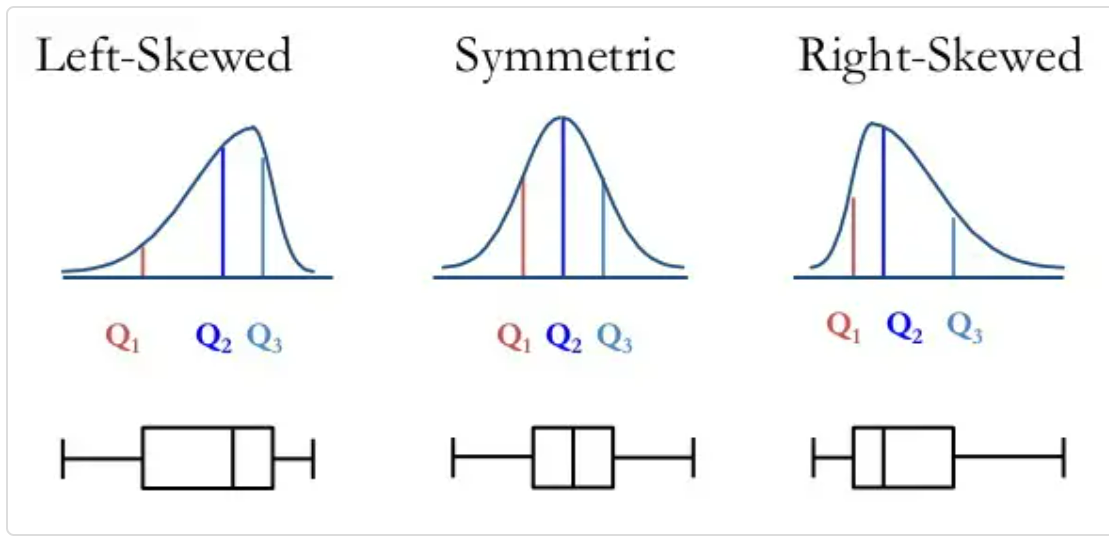

Box plots visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages.

1. When the median is closer to the bottom of the box, and if the whisker is shorter on the lower end of the box, then the distribution is positively skewed (skewed right).

2. When the median is closer to the top of the box, and if the whisker is shorter on the upper end of the box, then the distribution is negatively skewed (skewed left).

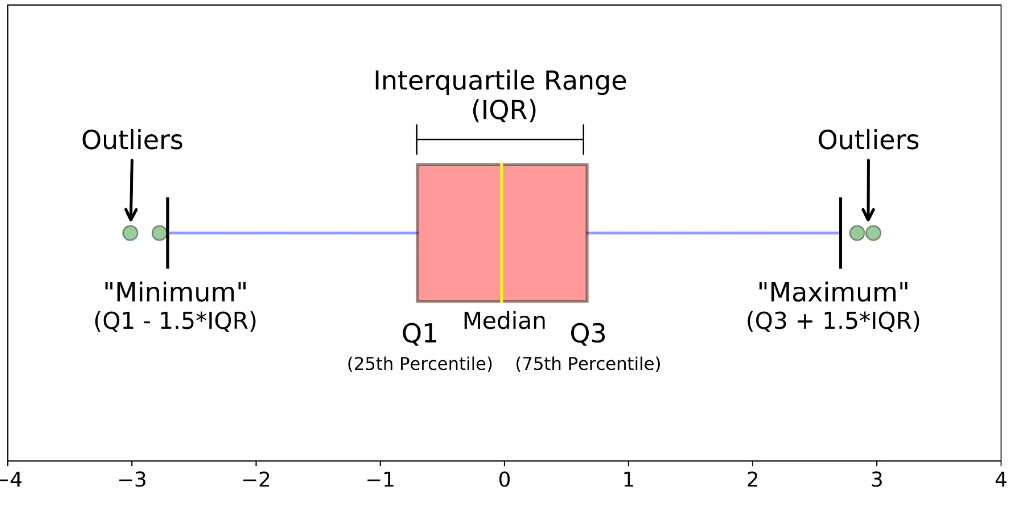

1. If the skewness is between -0.5 and 0.5, the data is fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

2. When the value of the skewness is negative, the tail of the distribution is longer towards the left hand side of the curve. and vice-versa

### Univariate / Bivariate distributions

In [342]:
def plot_comparison(data, col, title):
    fig, ax = plt.subplots(3, 1, sharex=True, figsize=[18,18])
    sns.histplot(data=train_df, x=col, kde=True, ax=ax[0], color = 'cornflowerblue')
    ax[0].set_title('Histogram + KDE')
    sns.boxenplot(x=col, ax=ax[1], color = 'cornflowerblue')
    ax[1].set_title('Boxplot')
    sns.violinplot(x=col, saturation=1, ax=ax[2], color = 'cornflowerblue', bw=.15, cut=0)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    plt.show()

age
Skew : -0.24
no.of zeros : 0
% of zeros : 0.0
no.of nulls : 0
% of nulls : 0.0


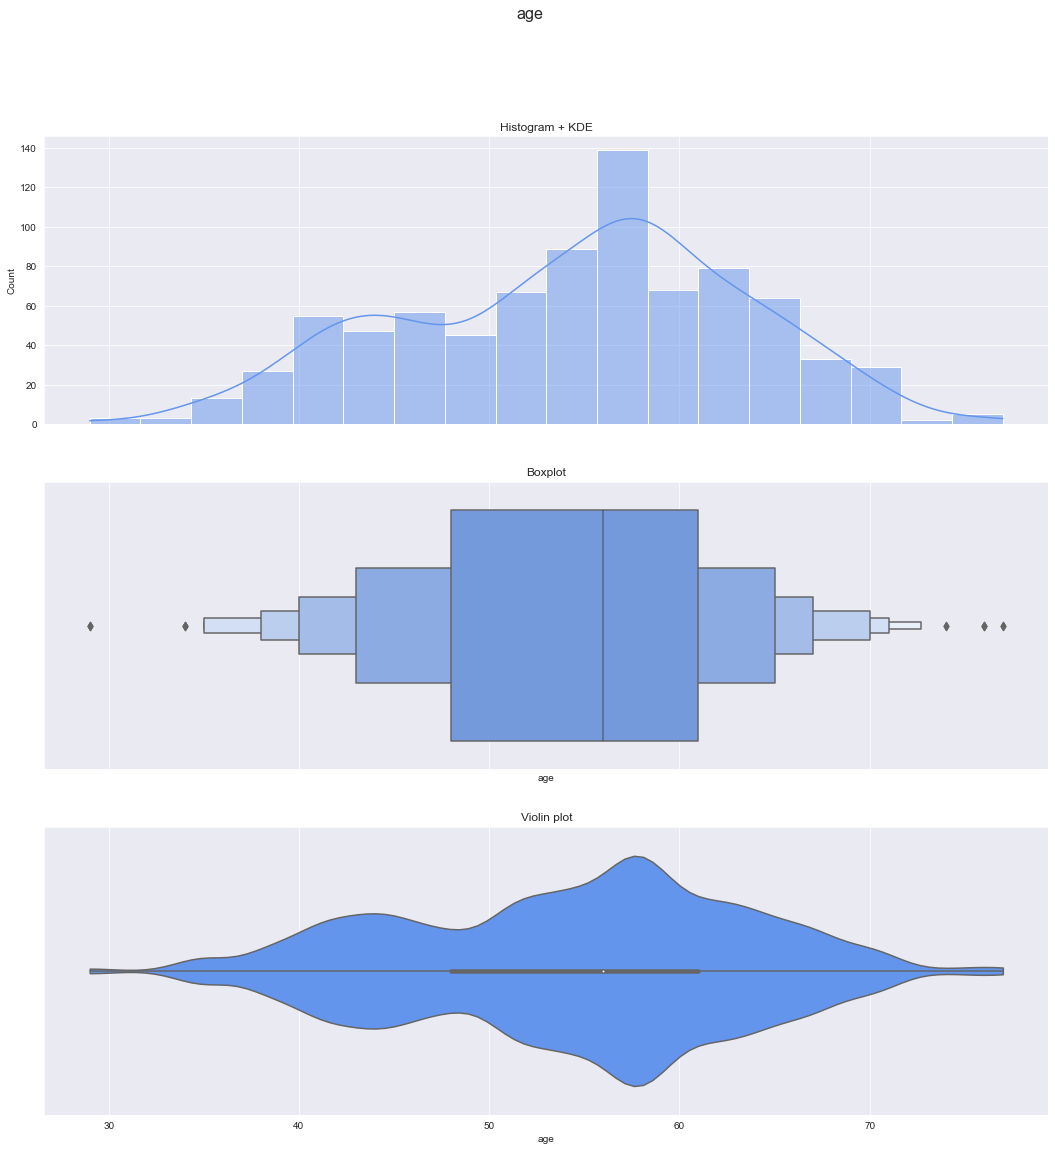

trestbps
Skew : 0.77
no.of zeros : 0
% of zeros : 0.0
no.of nulls : 0
% of nulls : 0.0


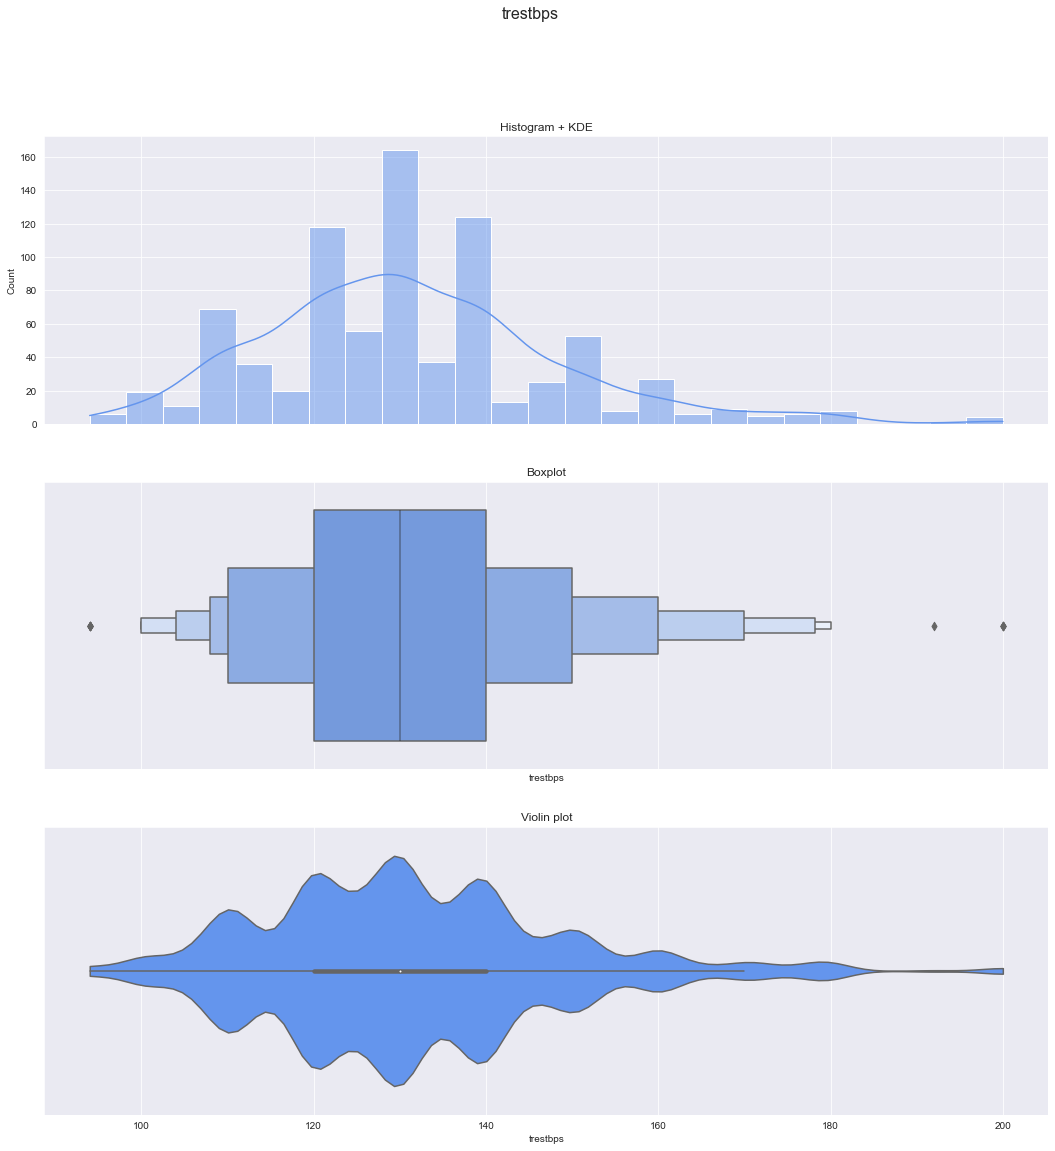

chol
Skew : 0.98
no.of zeros : 0
% of zeros : 0.0
no.of nulls : 0
% of nulls : 0.0


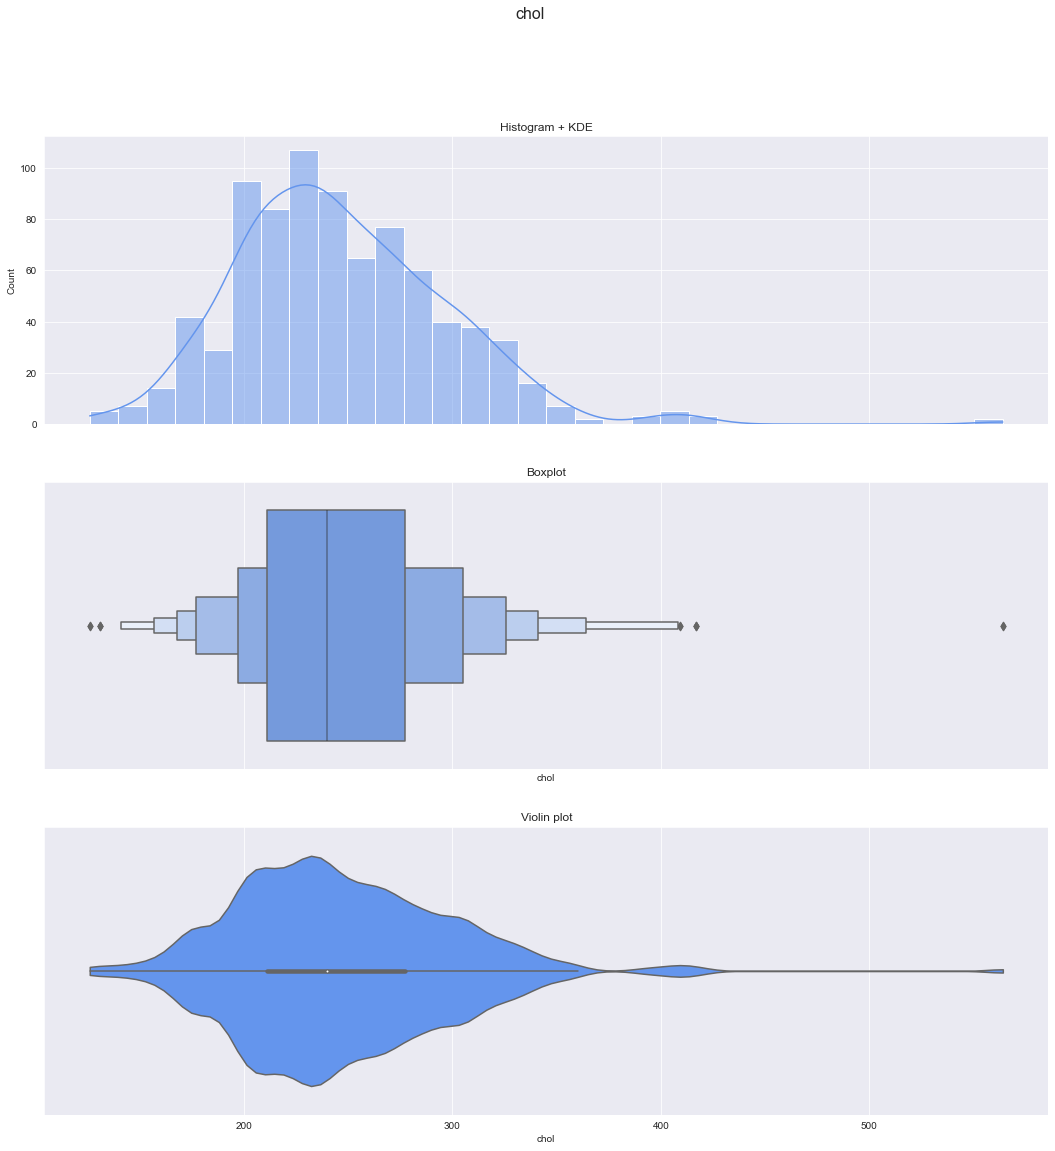

thalach
Skew : -0.49
no.of zeros : 0
% of zeros : 0.0
no.of nulls : 0
% of nulls : 0.0


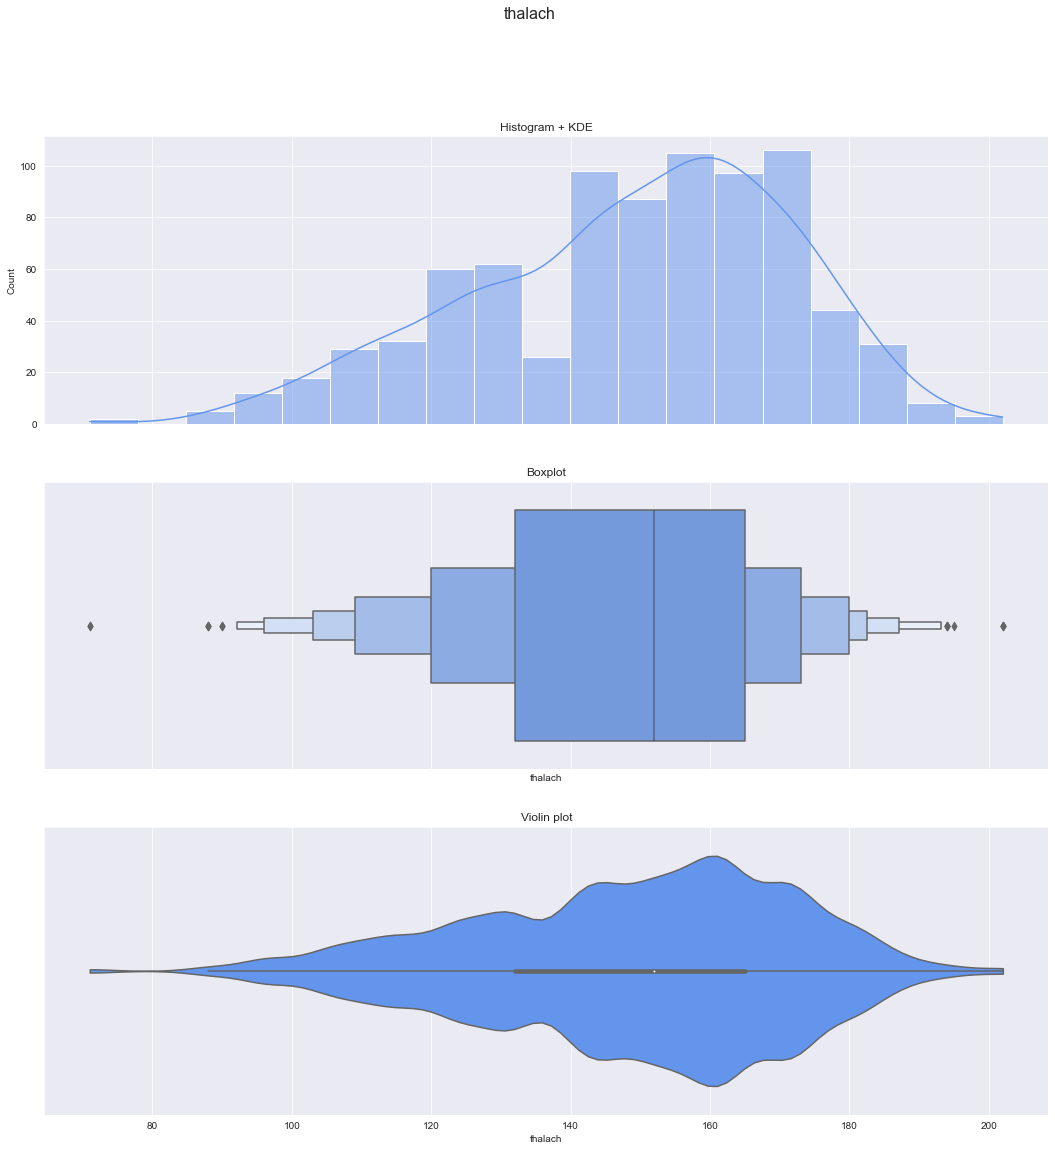

oldpeak
Skew : 1.23
no.of zeros : 267
% of zeros : 32.36
no.of nulls : 0
% of nulls : 0.0


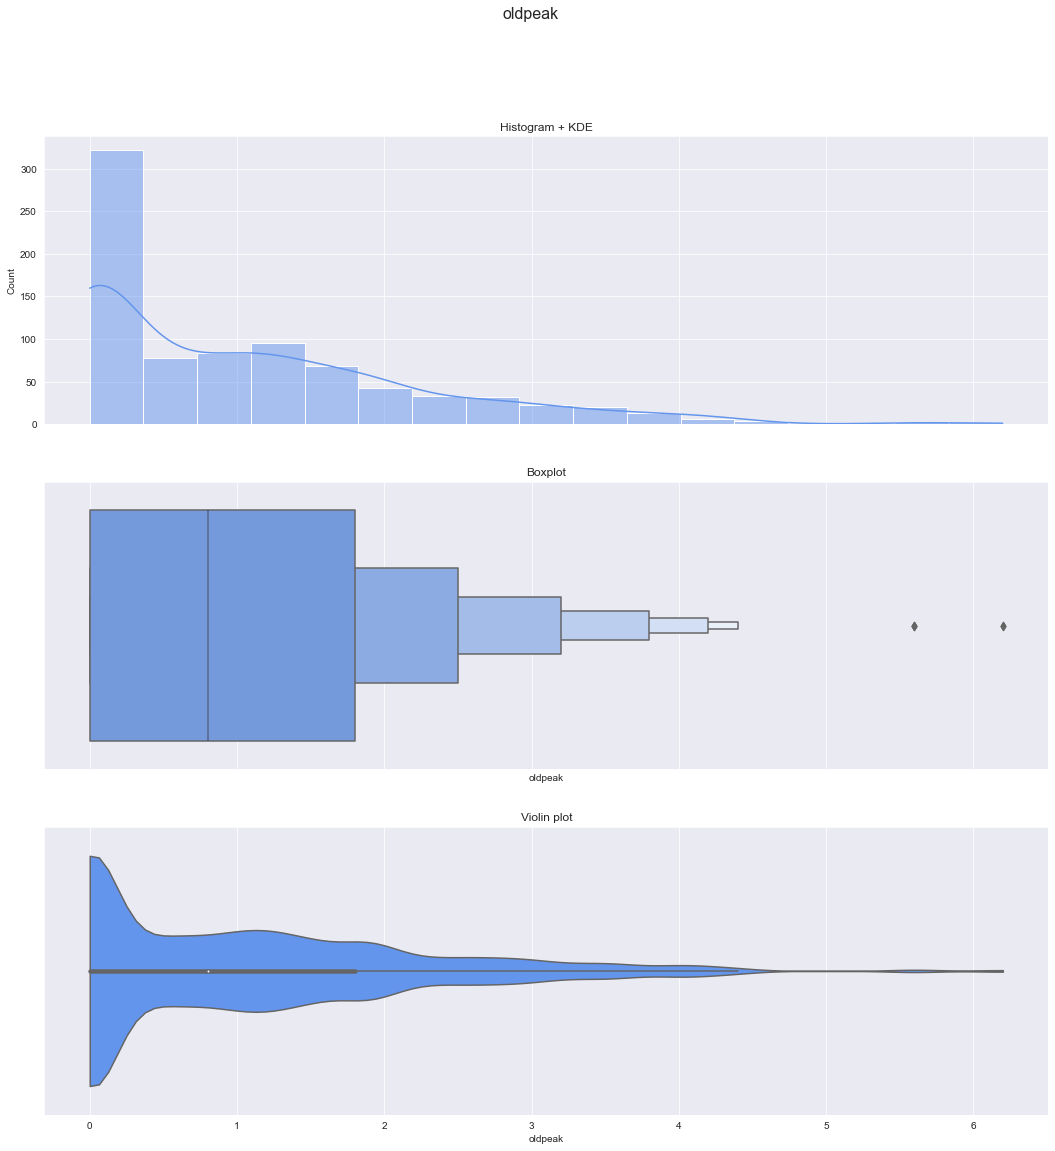

In [343]:
for col in continuous_features:
    print(col)
    print('Skew :', round(train_df[col].skew(), 2))
    print('no.of zeros :',(train_df[col]==0).sum())
    print('% of zeros :',np.round_((train_df[col]==0).sum()/len(train_df)*100,decimals=2))
    print('no.of nulls :',train_df[col].isna().sum())
    print('% of nulls :',np.round_(train_df[col].isna().sum()/len(train_df)*100,decimals=2))
    plot_comparison(train_df, train_df[col], col)

age
no.of nulls : 0
% of nulls : 0.0
Skew : -0.24


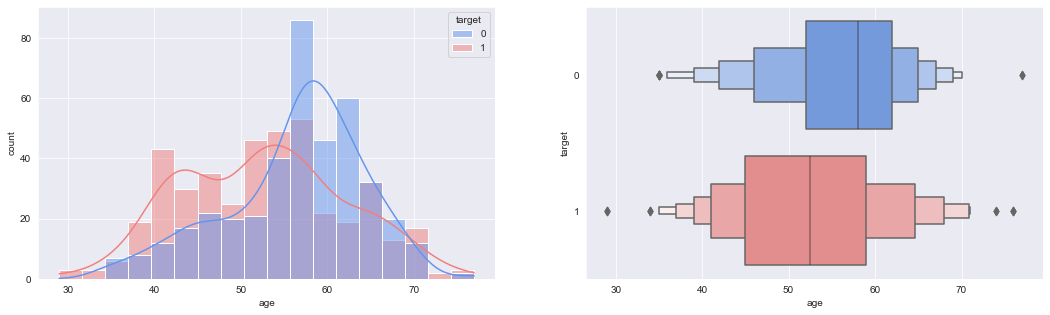

trestbps
no.of nulls : 0
% of nulls : 0.0
Skew : 0.77


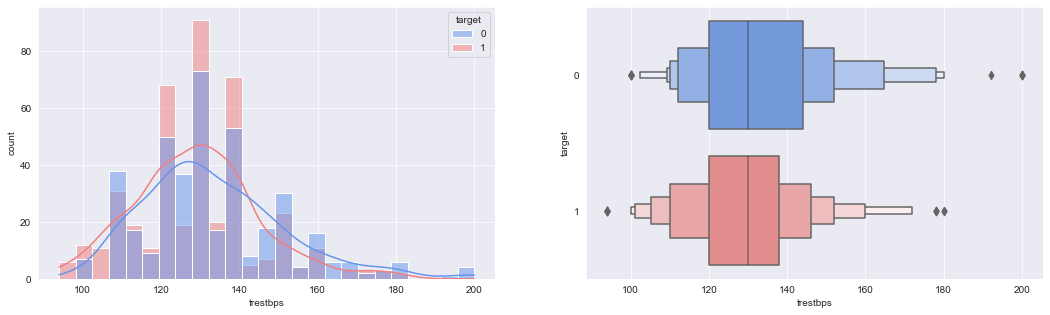

chol
no.of nulls : 0
% of nulls : 0.0
Skew : 0.98


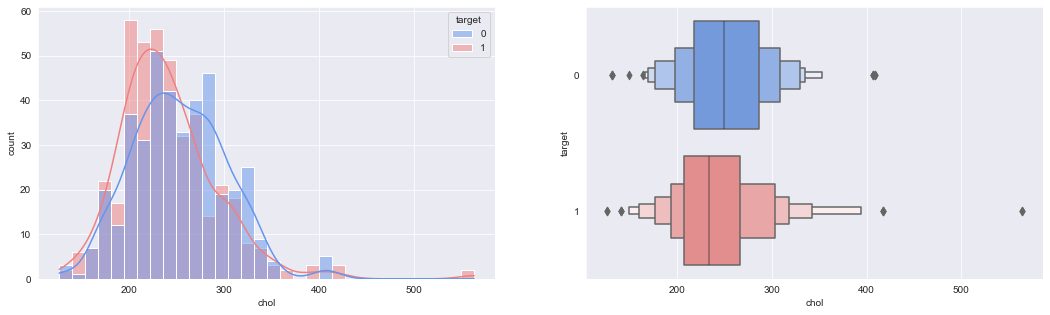

thalach
no.of nulls : 0
% of nulls : 0.0
Skew : -0.49


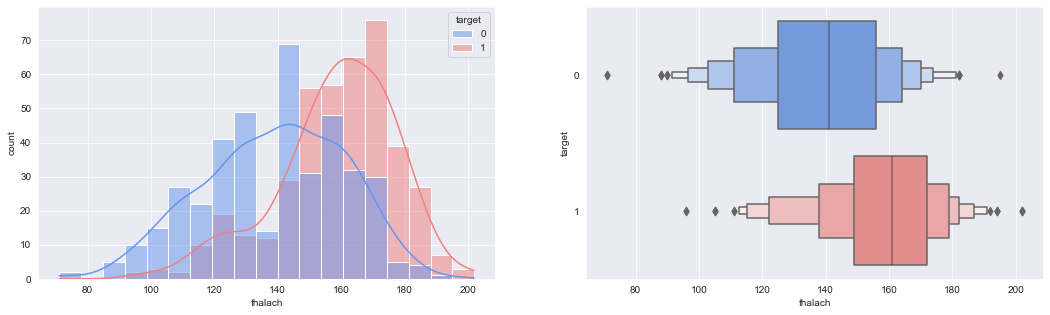

oldpeak
no.of nulls : 0
% of nulls : 0.0
Skew : 1.23


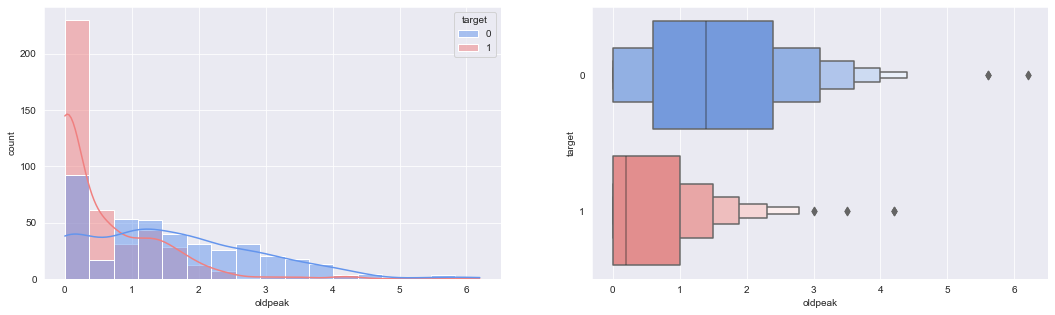

In [344]:
for col in continuous_features:
    print(col)
    print('no.of nulls :',train_df[col].isna().sum())
    print('% of nulls :',np.round_(train_df[col].isna().sum()/len(train_df)*100,decimals=2))
    print('Skew :', round(train_df[col].skew(), 2))
    plt.figure(figsize = (18,5))
    plt.subplot(1, 2, 1)
    sns.histplot(data=train_df, x=col, kde=True,hue='target',palette=['cornflowerblue','lightcoral'])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxenplot(data=train_df, x=col, y='target', order=[0,1],orient='h',palette=['cornflowerblue','lightcoral'])
    plt.show()

age
Skew : -0.24


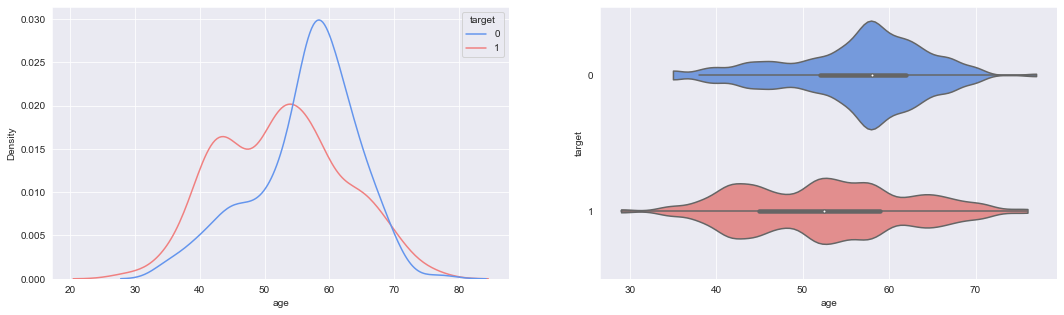

trestbps
Skew : 0.77


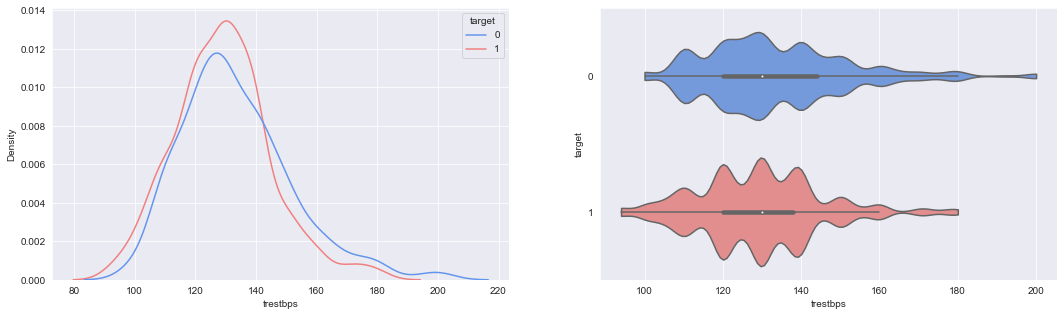

chol
Skew : 0.98


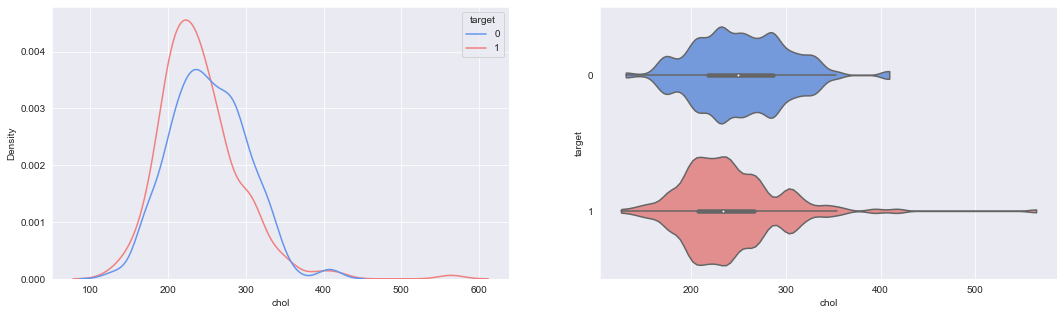

thalach
Skew : -0.49


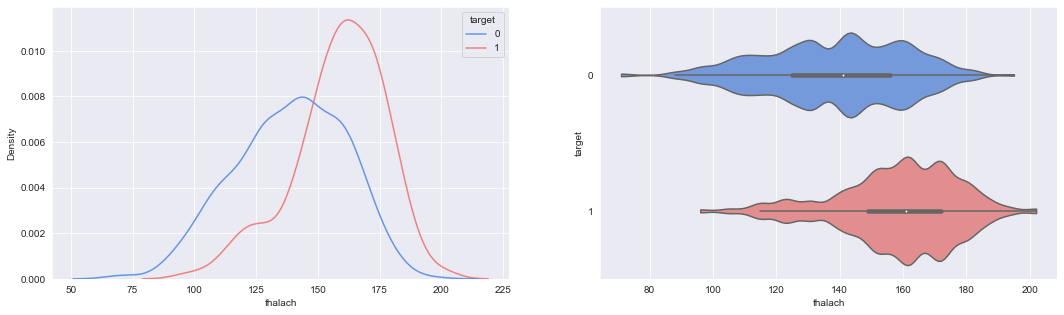

oldpeak
Skew : 1.23


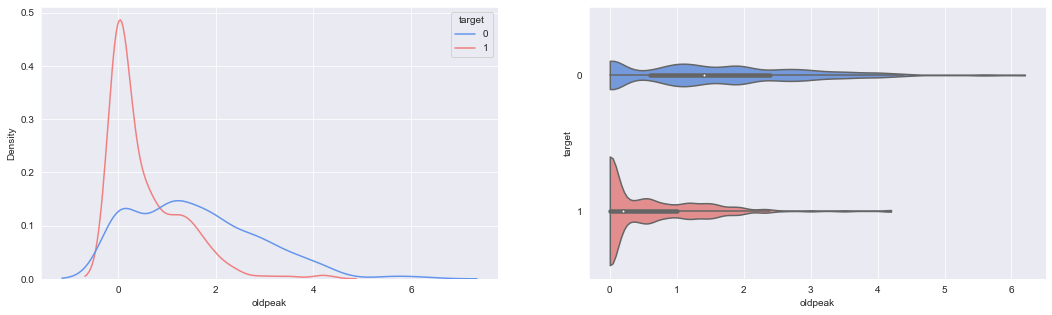

In [345]:
for col in continuous_features:
    print(col)
    print('Skew :', round(train_df[col].skew(), 2))
    plt.figure(figsize = (18,5))
    plt.subplot(1, 2, 1)
    sns.kdeplot(data=train_df, x=col,hue='target',palette=['cornflowerblue','lightcoral'])
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.subplot(1, 2, 2)
    #sns.violinplot(x=train_df[col],saturation=1)
    sns.violinplot(data=train_df, x=col, y='target', order=[0,1],orient='h',palette=['cornflowerblue','lightcoral'], bw=.15,cut=0)
    plt.show()

#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot

In [346]:
import scipy.stats as stat
import pylab 

age
Skew : -0.24
7.1553082079327905e-06


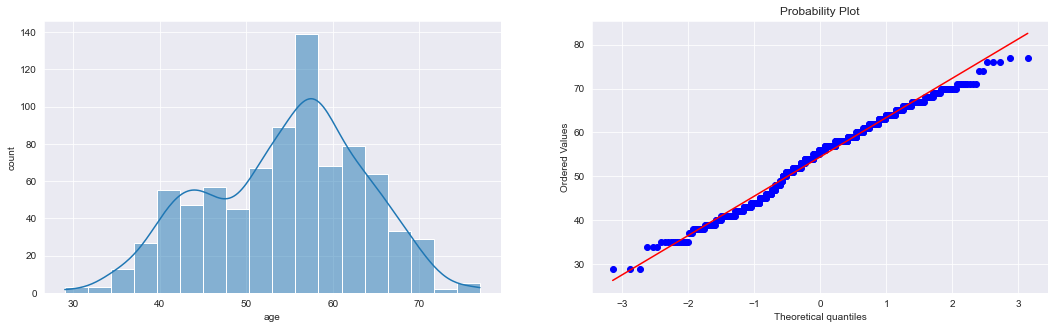

trestbps
Skew : 0.77
8.765299980217867e-20


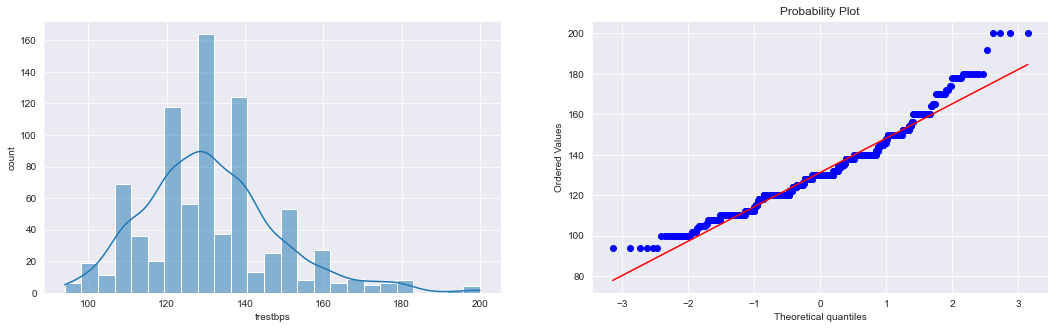

chol
Skew : 0.98
8.81664656680438e-37


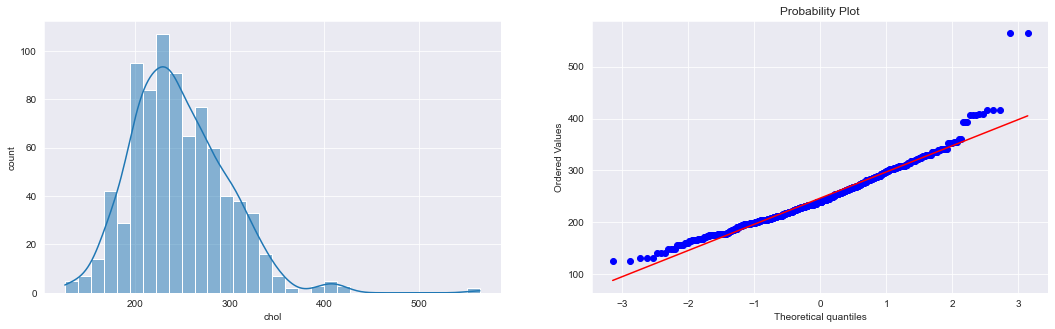

thalach
Skew : -0.49
1.2242565868821897e-07


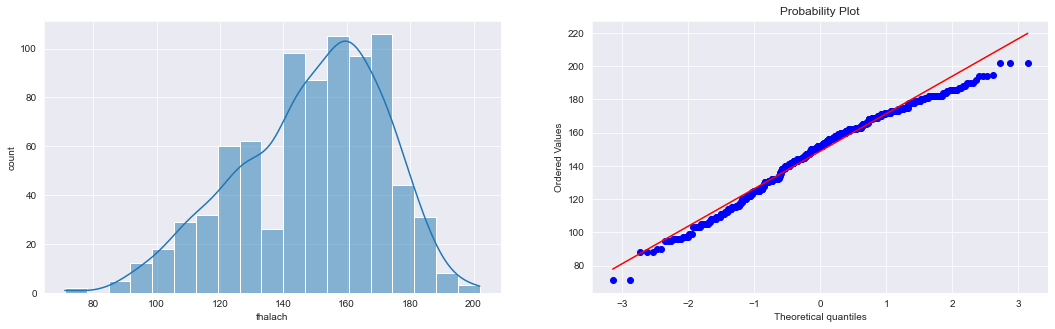

oldpeak
Skew : 1.23
1.645249279876652e-35


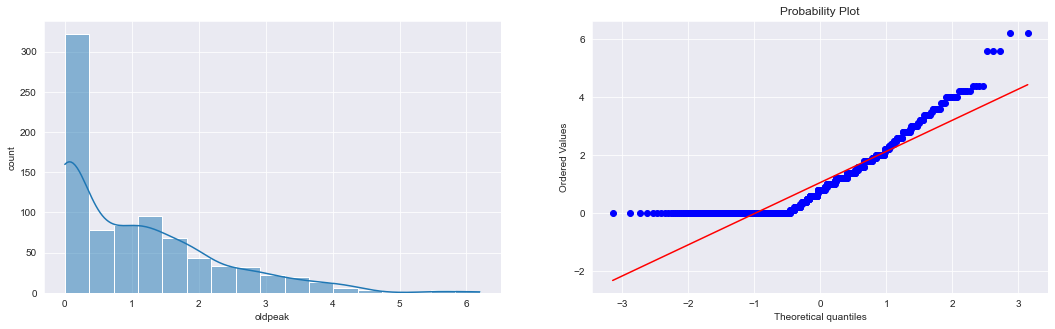

In [347]:
for col in continuous_features:
    print(col)
    print('Skew :', round(train_df[col].skew(), 2))
    _, p = stat.normaltest(train_df[col].to_numpy())
    print(p)
    plt.figure(figsize = (18,5))
    plt.subplot(1, 2, 1)
    sns.histplot(data=train_df, x=col, kde=True)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    stat.probplot(train_df[col],dist='norm',plot=pylab)
    plt.show()

1. A normal fasting blood glucose level is lower than 95 mg/dL (5.3 mmol/L). One hour after drinking the glucose solution, a normal blood glucose level is lower than 180 mg/dL (10 mmol/L). Two hours after drinking the glucose solution, a normal blood glucose level is lower than 155 mg/dL (8.6 mmol/L).
2. Insulin allows the cells in the muscles, fat and liver to absorb glucose that is in the blood. The glucose serves as energy to these cells, or it can be converted into fat when needed

### Observations :

1. From above we can observe the data distribution of individual features 
2. you can also observe the Age,thalach data dist. with respect to target variable

In [348]:
train_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Visualizing bivariate / multivariate distributions

Text(0, 0.5, 'No.of heart disease people')

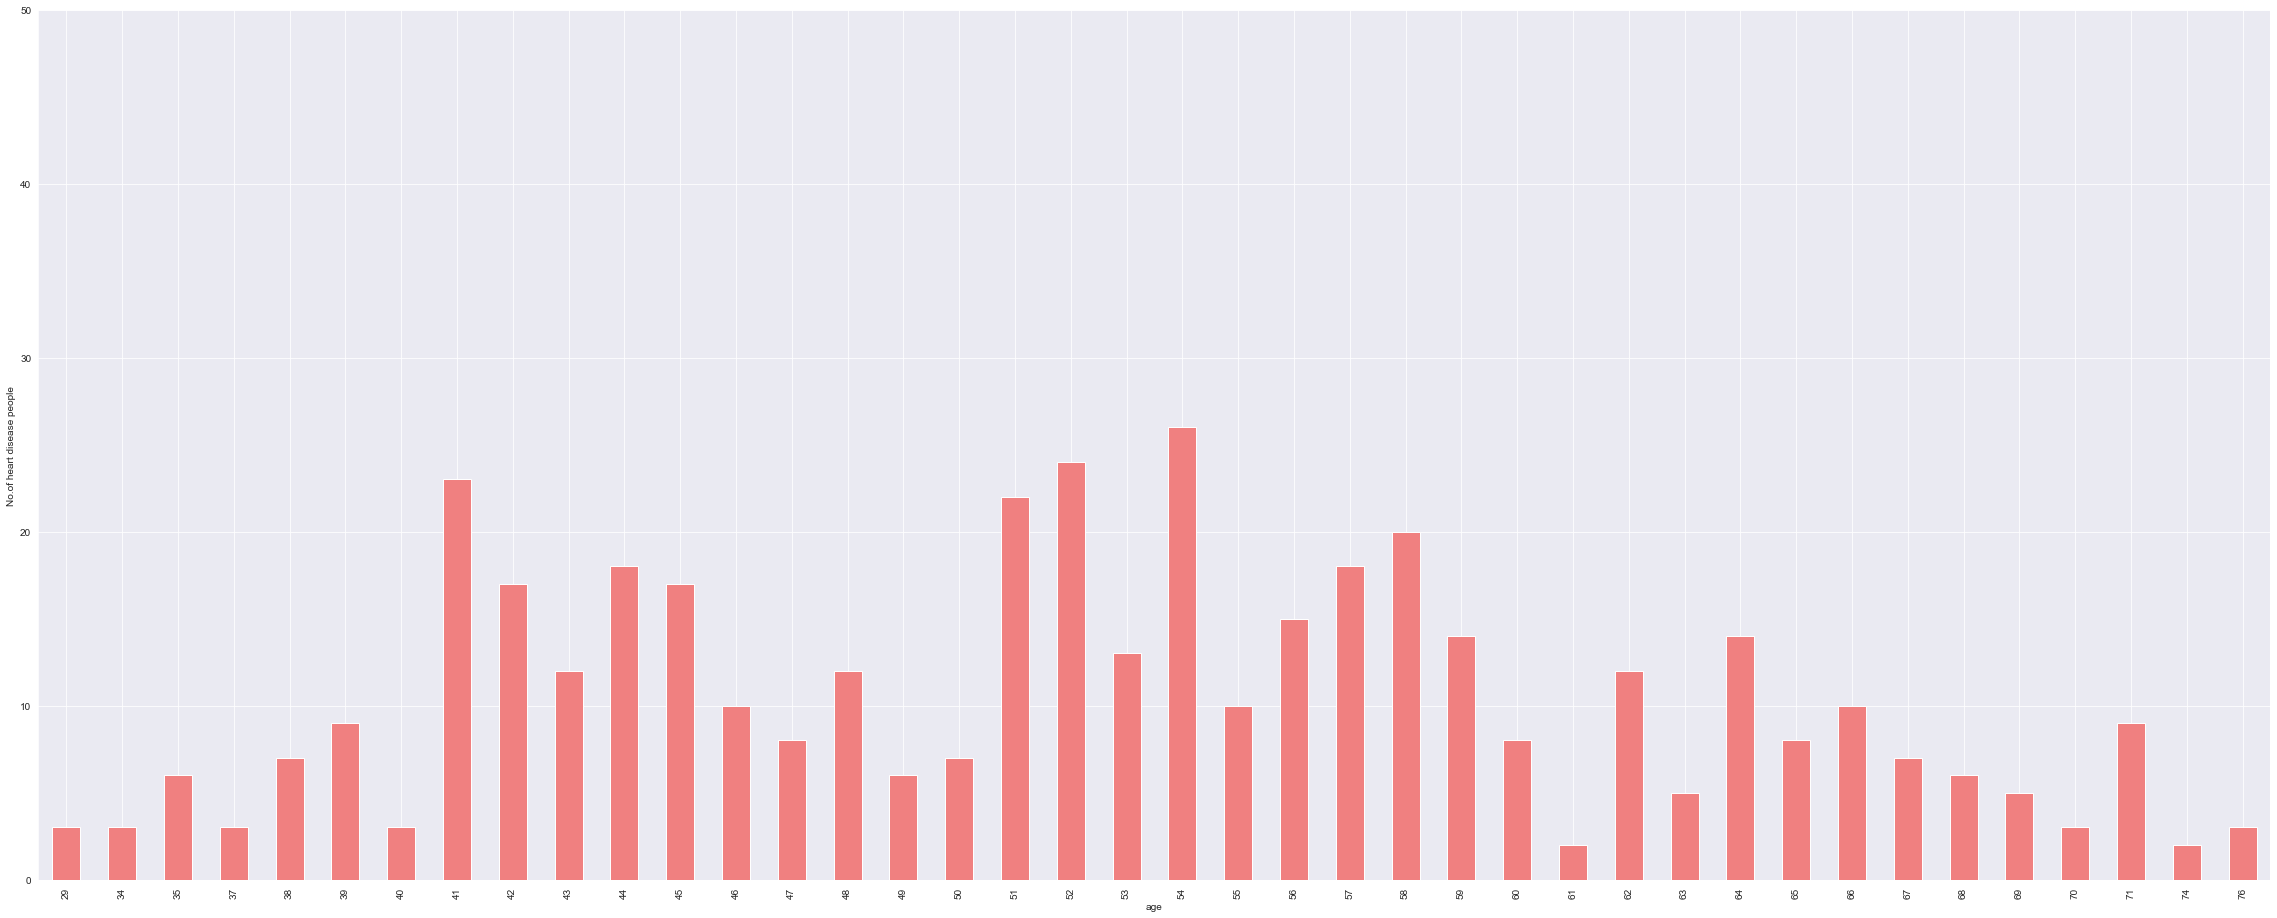

In [349]:
plt.figure(figsize = (40,16))
train_df.loc[train_df['target']==1]['age'].value_counts().sort_index().plot.bar(color = 'lightcoral')

plt.ylim(0, 50)

plt.xlabel('age')
plt.ylabel('No.of heart disease people')

# Double click on the plot/graph to zoom in/zoom out

Text(0, 0.5, 'No.of Healthy people')

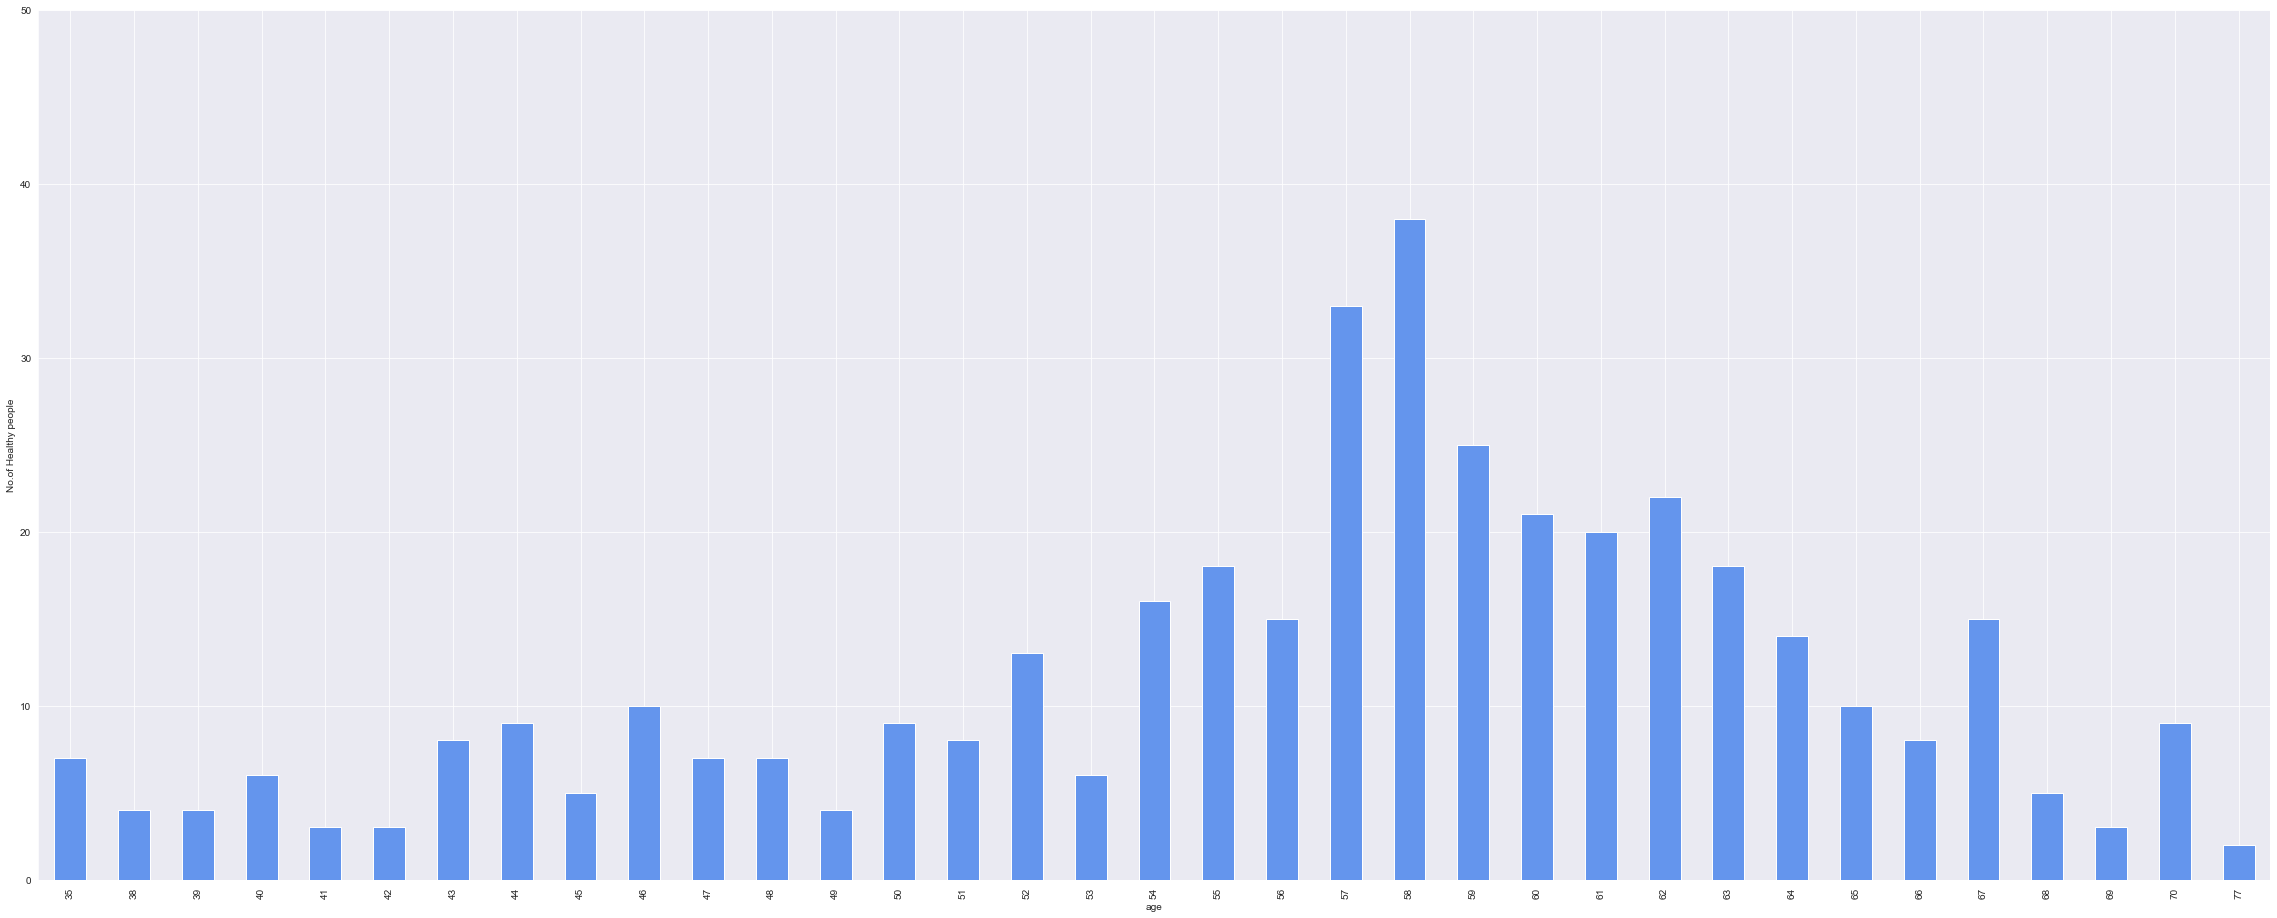

In [350]:
plt.figure(figsize = (40,16))
train_df.loc[train_df['target']==0]['age'].value_counts().sort_index().plot.bar(color = 'cornflowerblue')

plt.ylim(0, 50)

plt.xlabel('age')
plt.ylabel('No.of Healthy people')

# Double click on the plot/graph to zoom in

In [351]:
# From above we cannot clearly find any patterns with Age vs target 
# but one thing is clear that there are less old (above age 50) Heart disease people compared to young (below age 50) heart disease people
# And people between 40-60 are less prone to Diabetic

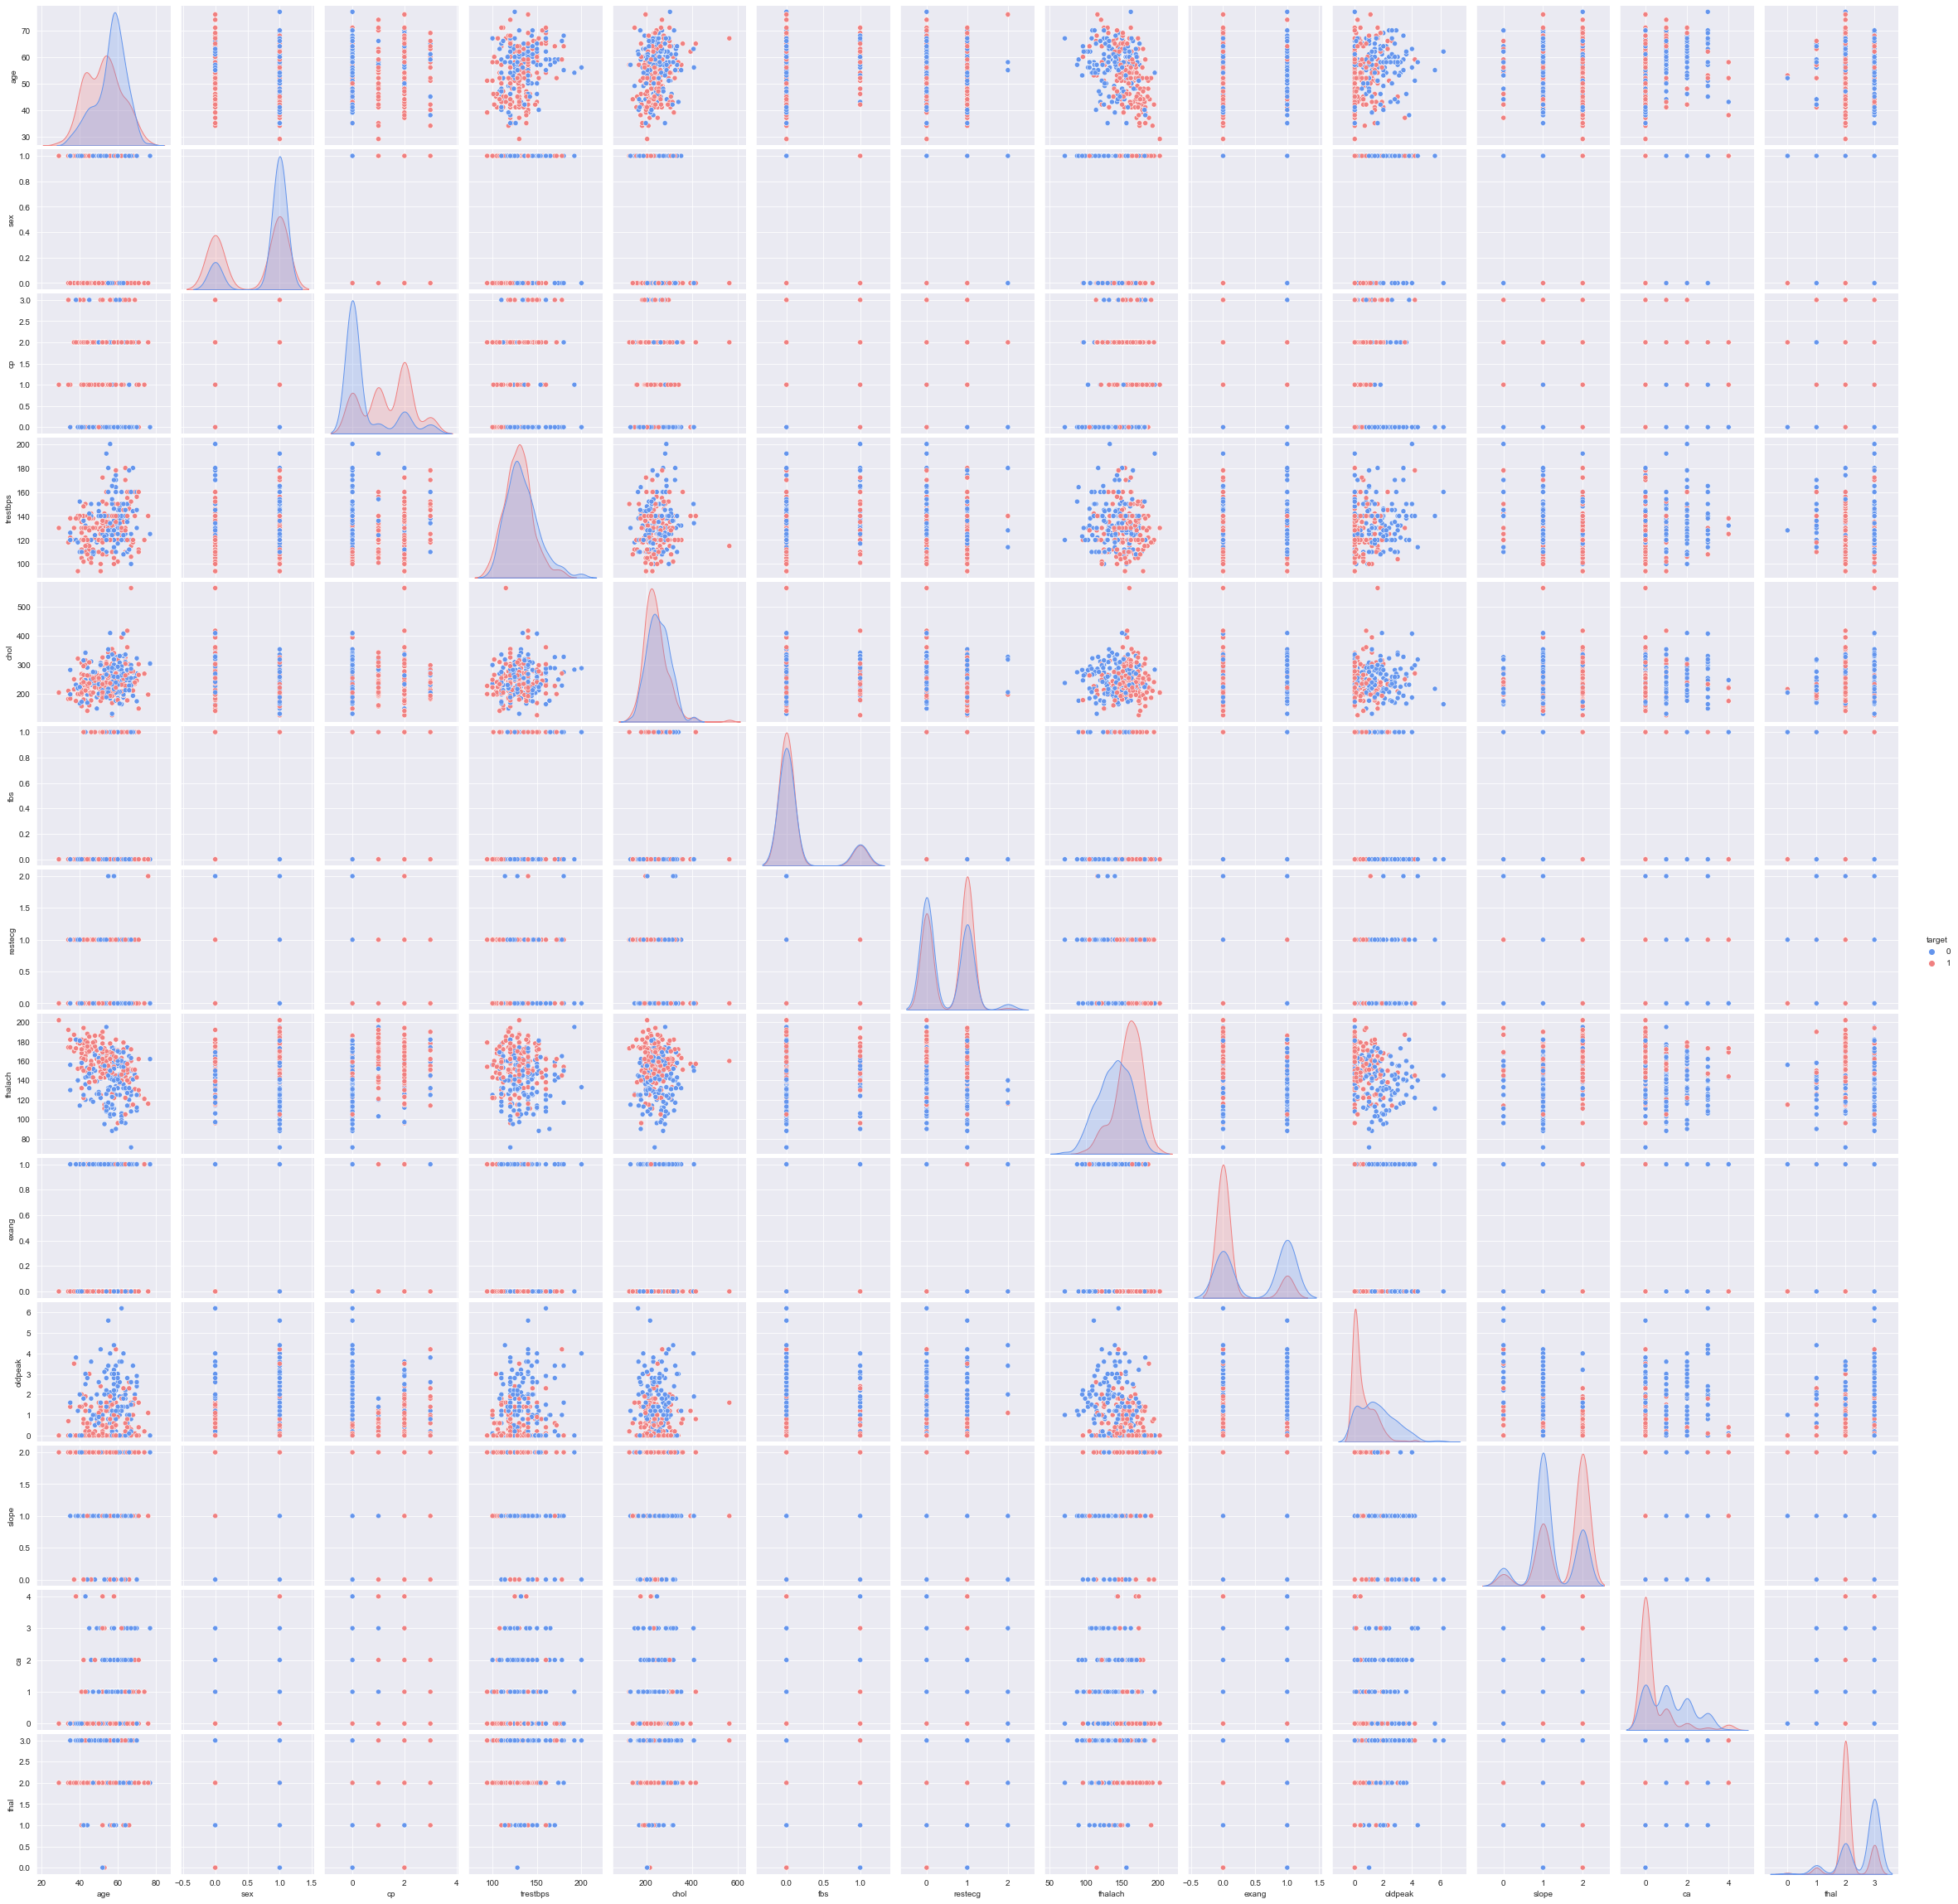

In [352]:
sns.pairplot(train_df, hue='target',palette=['cornflowerblue','lightcoral'])

# Its not clear to observe graphs closely we will plot indvidual plots for some features

In [353]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

age


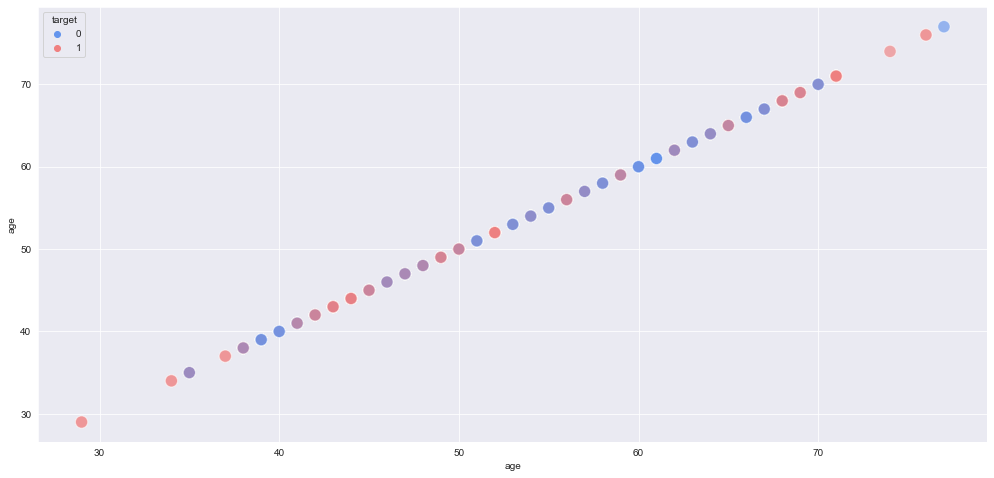

trestbps


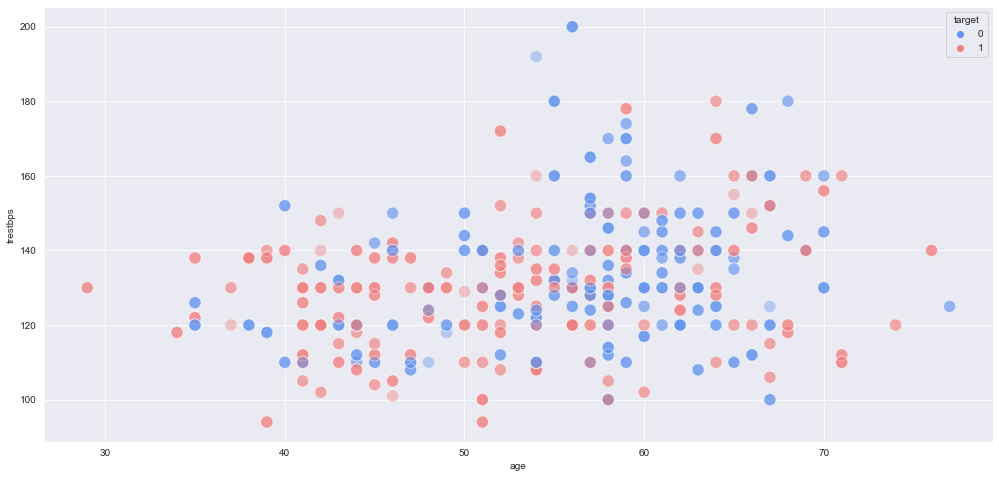

chol


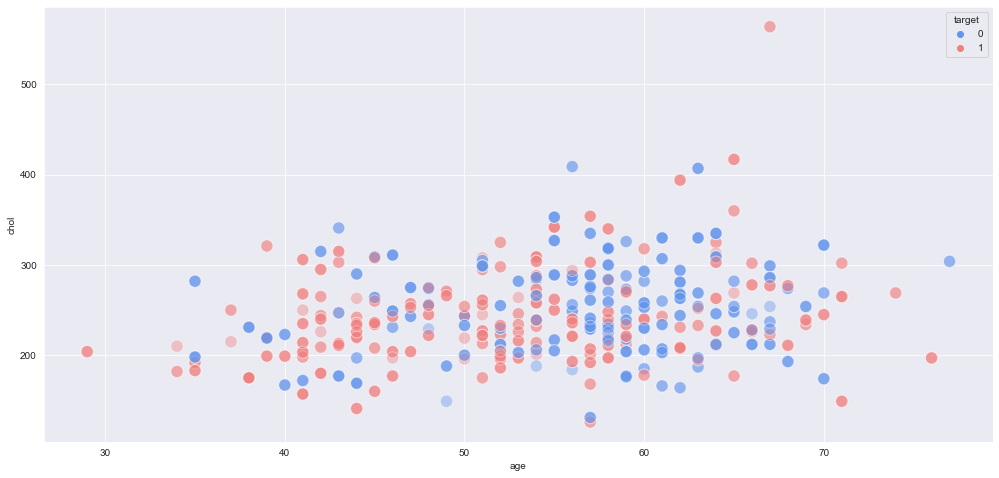

thalach


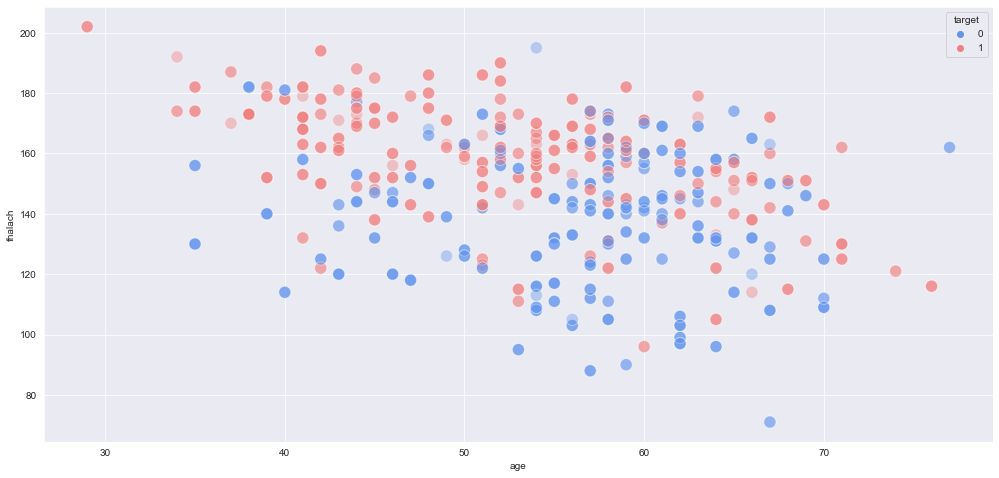

oldpeak


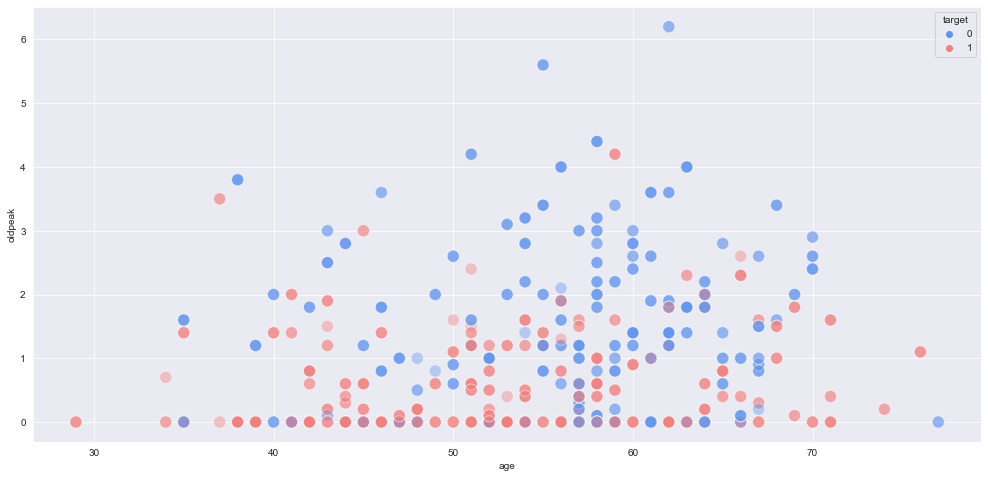

In [354]:
for col in continuous_features:
    print(col)
    plt.figure(figsize = (17,8))
    sns.scatterplot(data=train_df, x='age',y=col,hue='target',palette=['cornflowerblue','lightcoral'],alpha=0.4,s=150)
    plt.xlabel('age')
    plt.ylabel(col)
    plt.show()

age


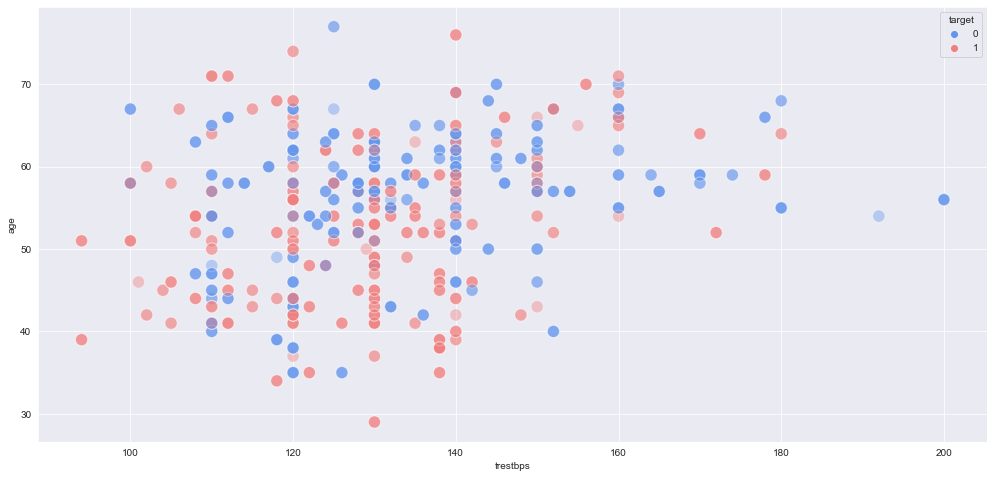

trestbps


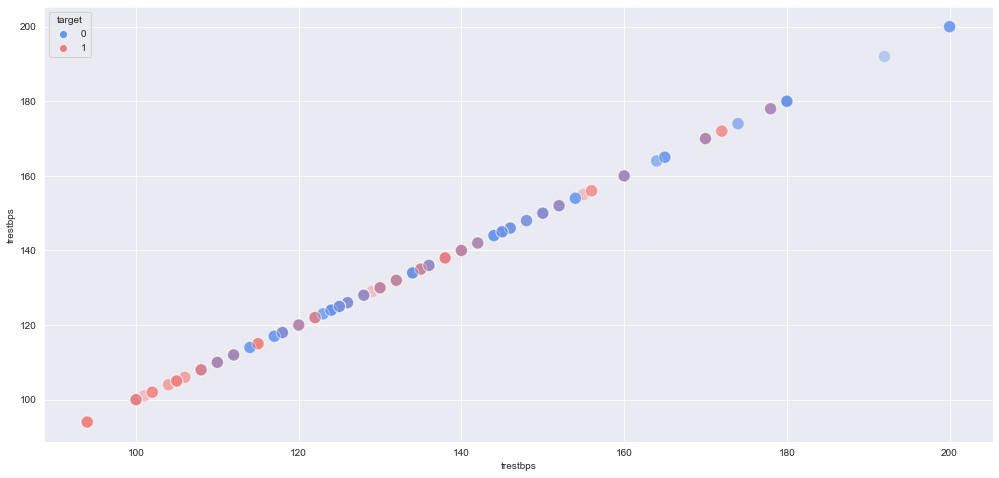

chol


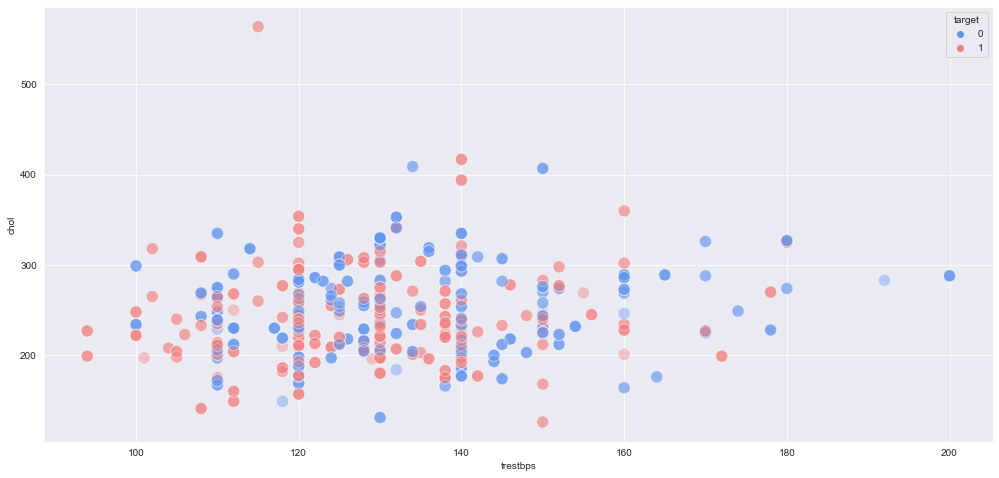

thalach


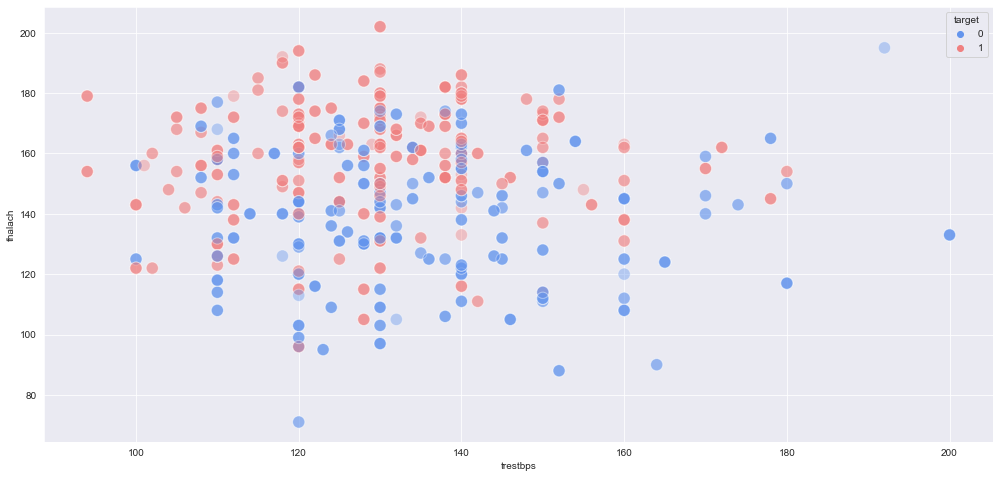

oldpeak


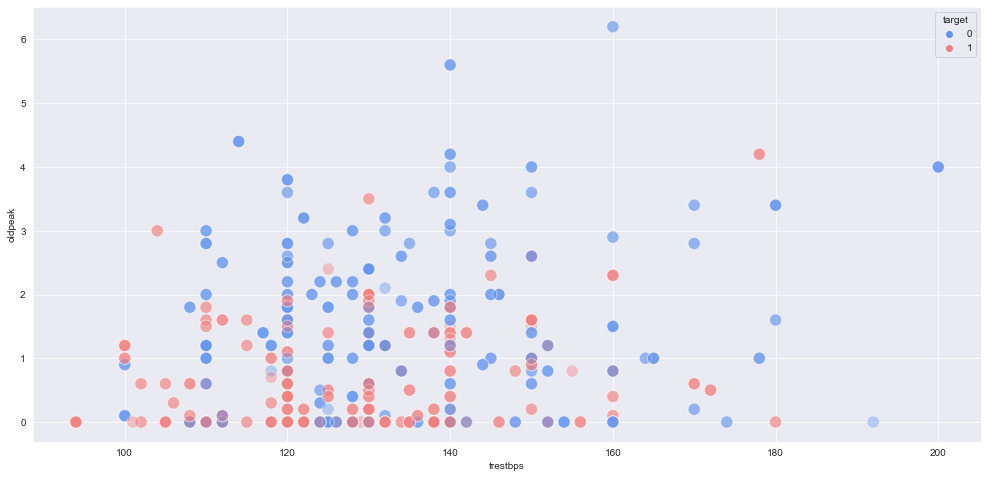

In [355]:
for col in continuous_features:
    print(col)
    plt.figure(figsize = (17,8))
    sns.scatterplot(data=train_df, x='trestbps',y=col,hue='target',palette=['cornflowerblue','lightcoral'],alpha=0.4,s=150)
    plt.xlabel('trestbps')
    plt.ylabel(col)
    plt.show()

age


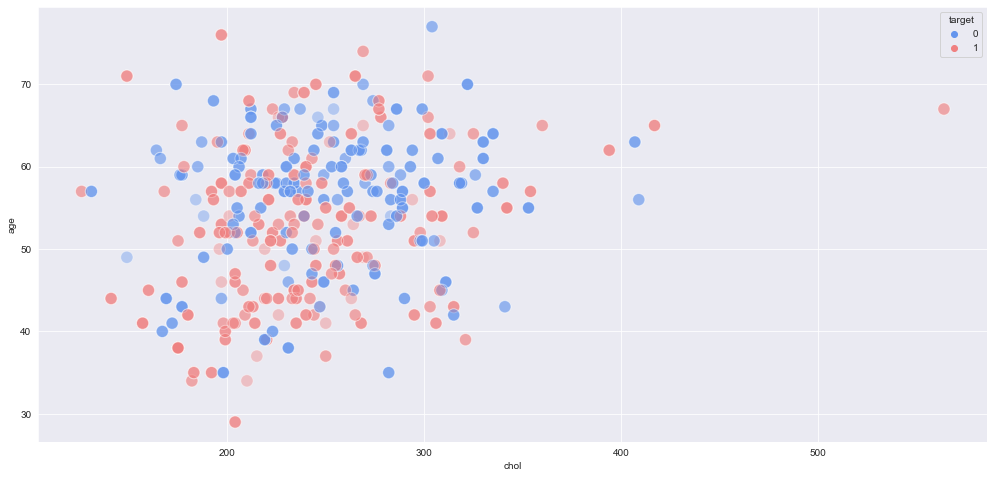

trestbps


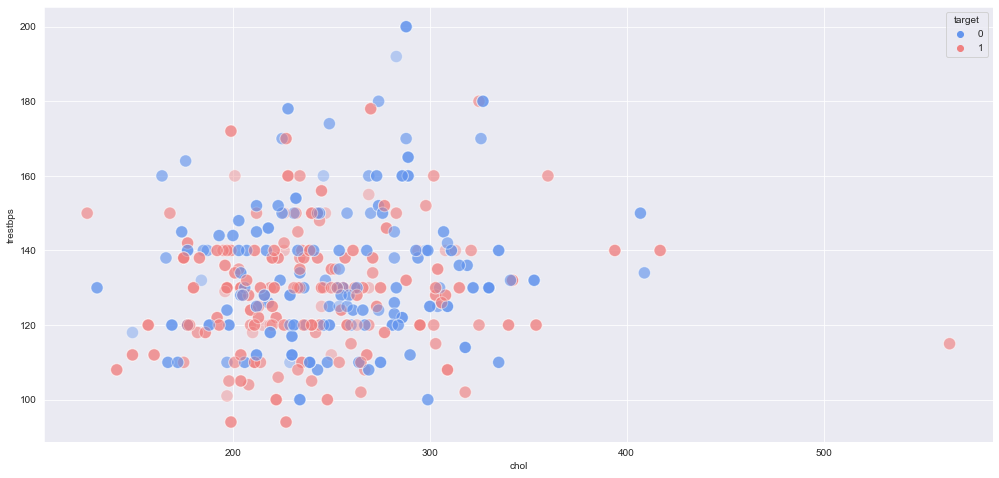

chol


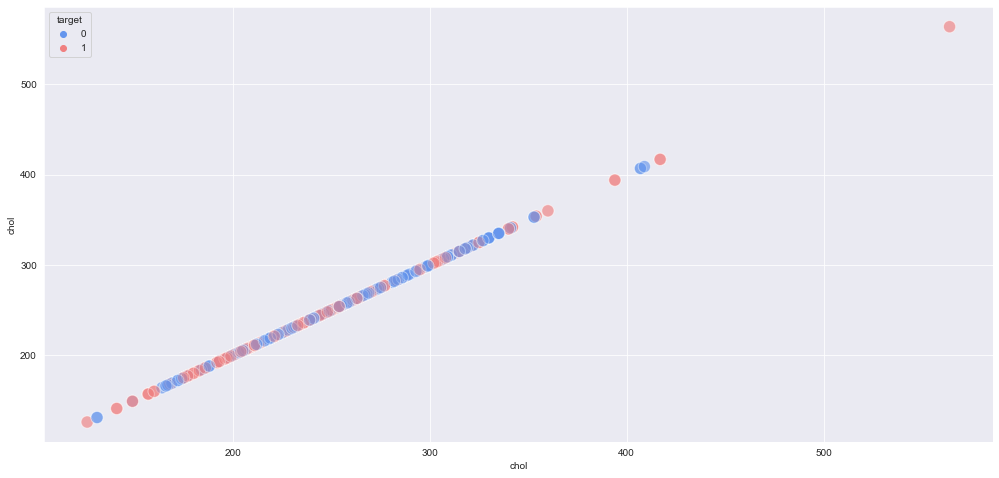

thalach


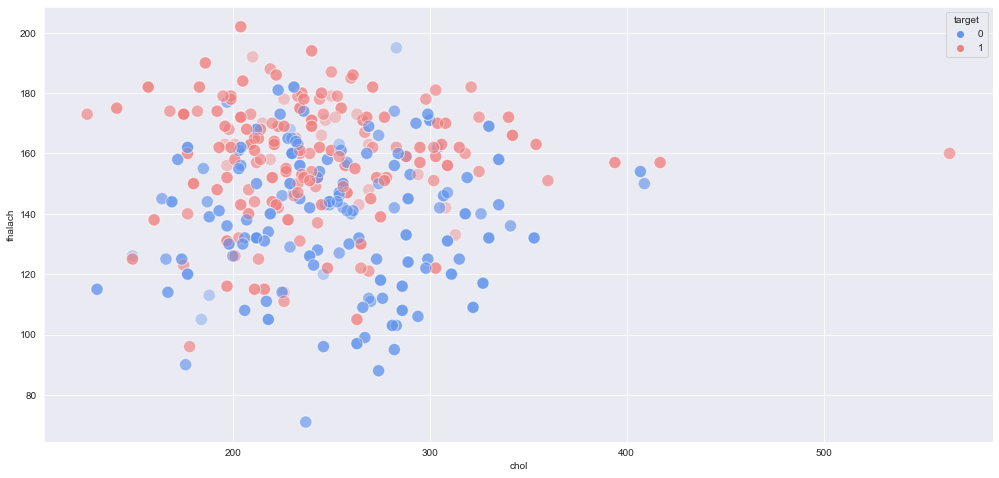

oldpeak


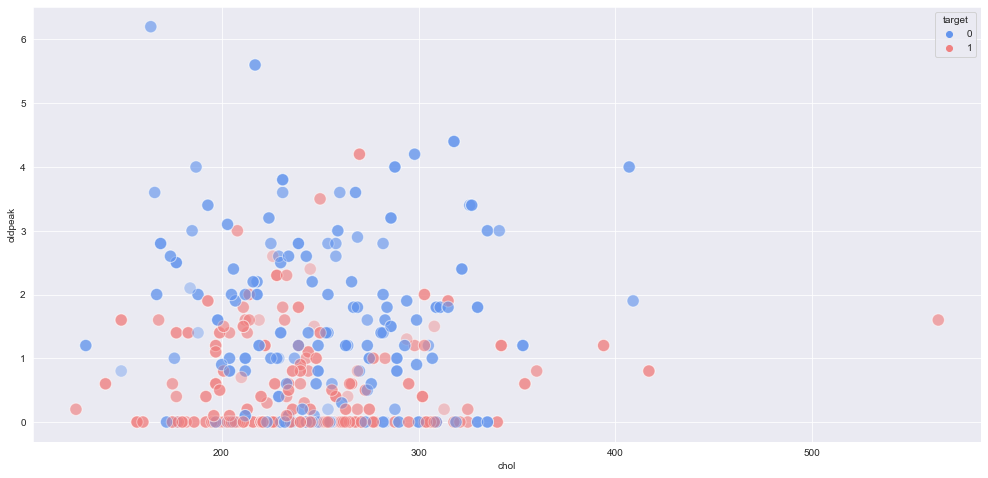

In [356]:
for col in continuous_features:
    print(col)
    plt.figure(figsize = (17,8))
    sns.scatterplot(data=train_df, x='chol',y=col,hue='target',palette=['cornflowerblue','lightcoral'],alpha=0.4,s=150)
    plt.xlabel('chol')
    plt.ylabel(col)
    plt.show()

1. There is positive relationship between 'BMI' and 'SkinThickness'

age


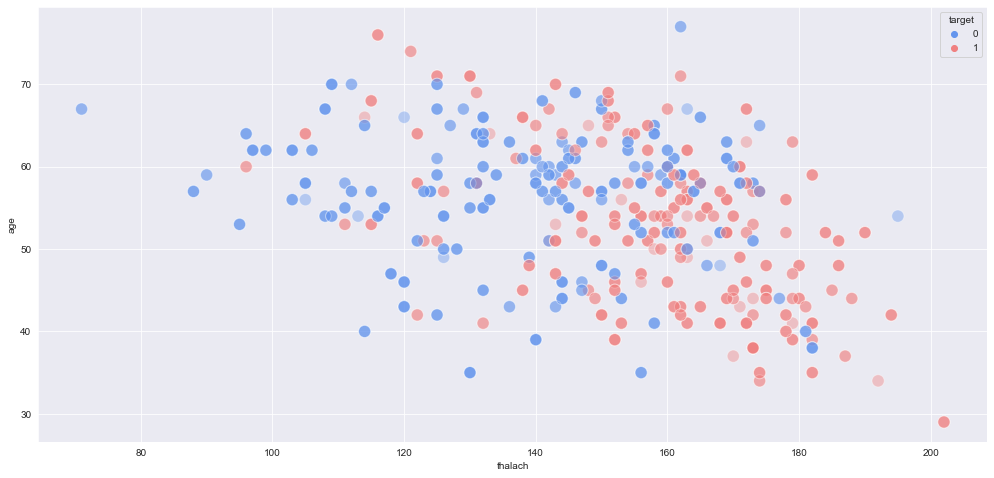

trestbps


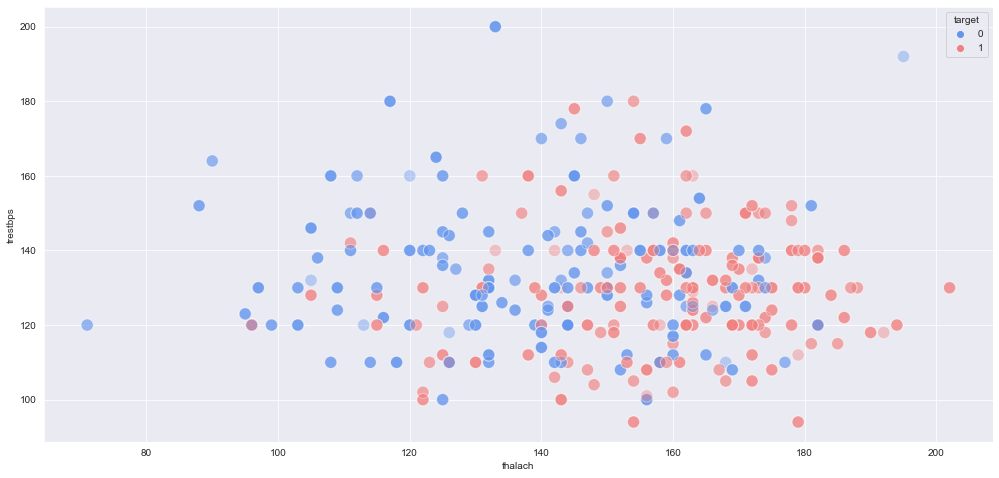

chol


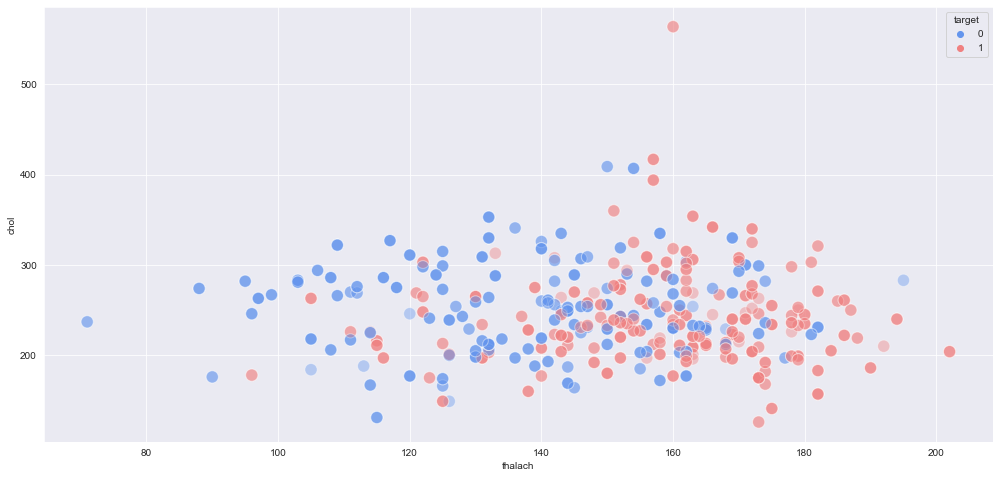

thalach


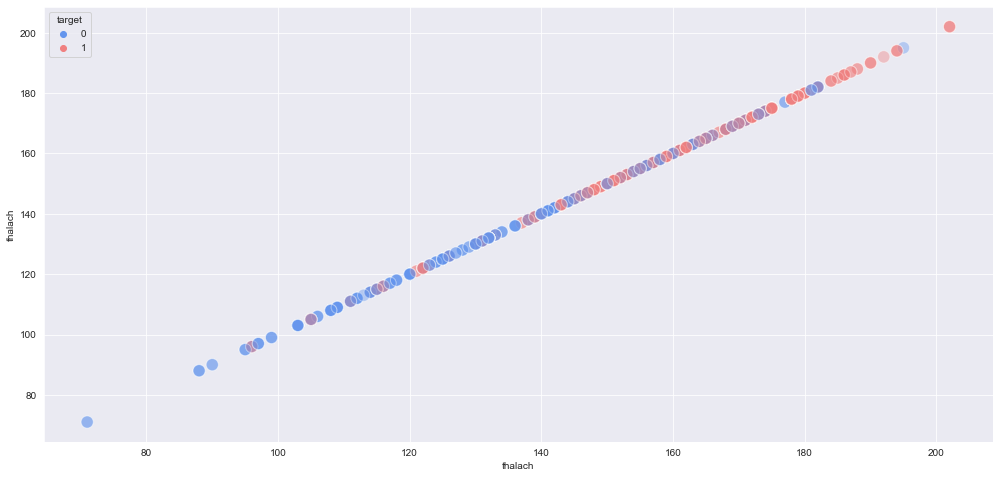

oldpeak


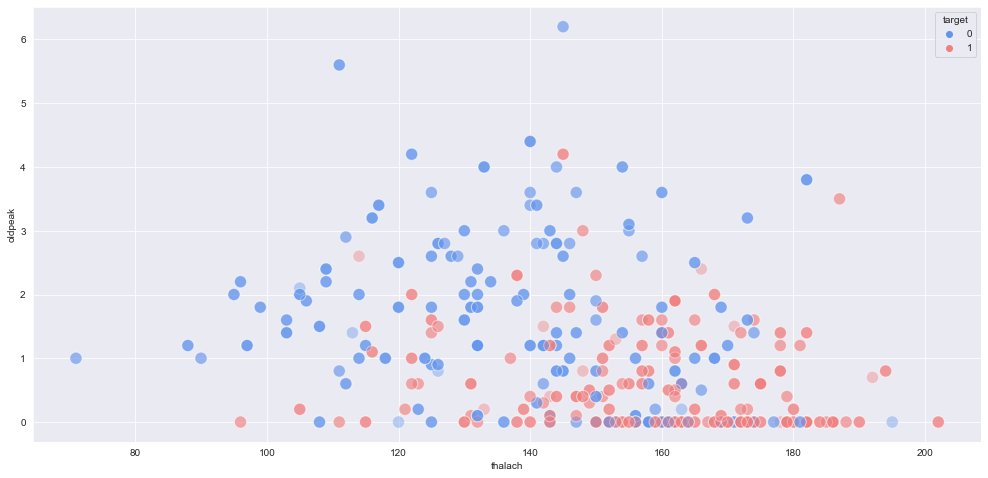

In [357]:
for col in continuous_features:
    print(col)
    plt.figure(figsize = (17,8))
    sns.scatterplot(data=train_df, x='thalach',y=col,hue='target',palette=['cornflowerblue','lightcoral'],alpha=0.4,s=150)
    plt.xlabel('thalach')
    plt.ylabel(col)
    plt.show()

age


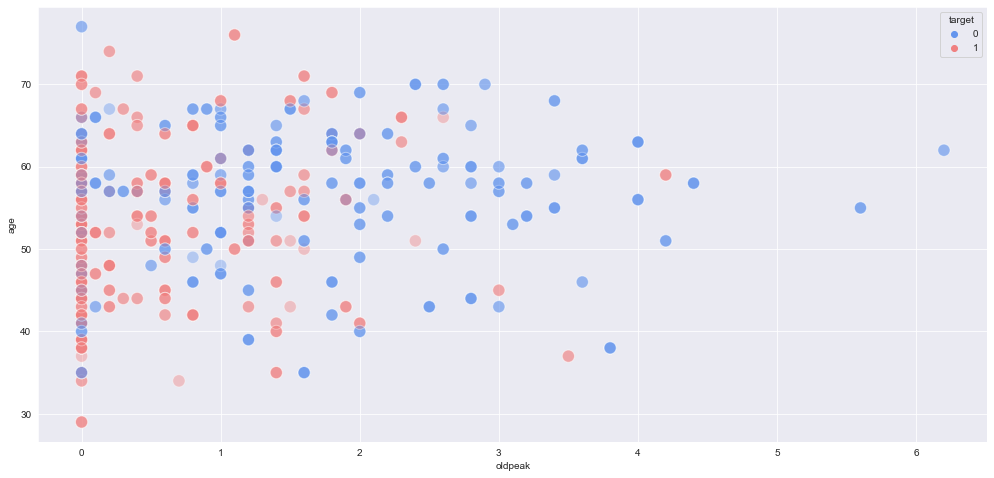

trestbps


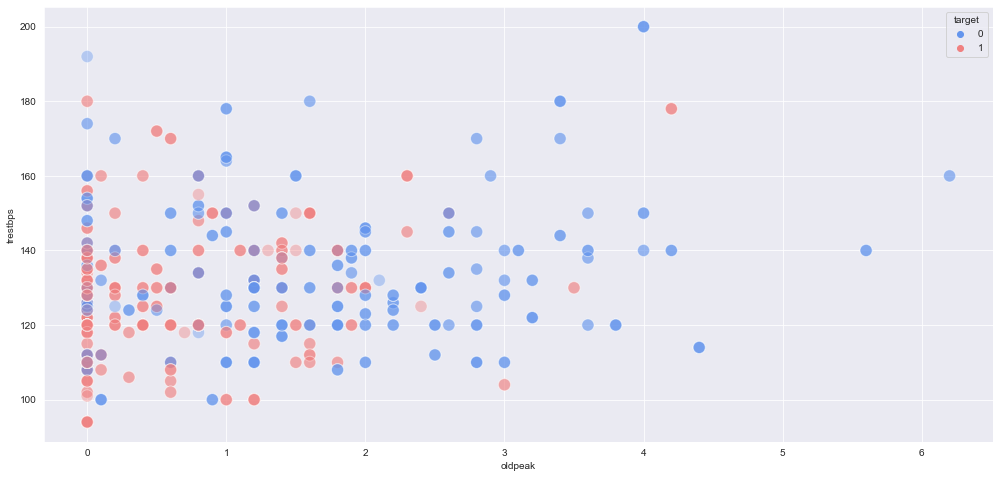

chol


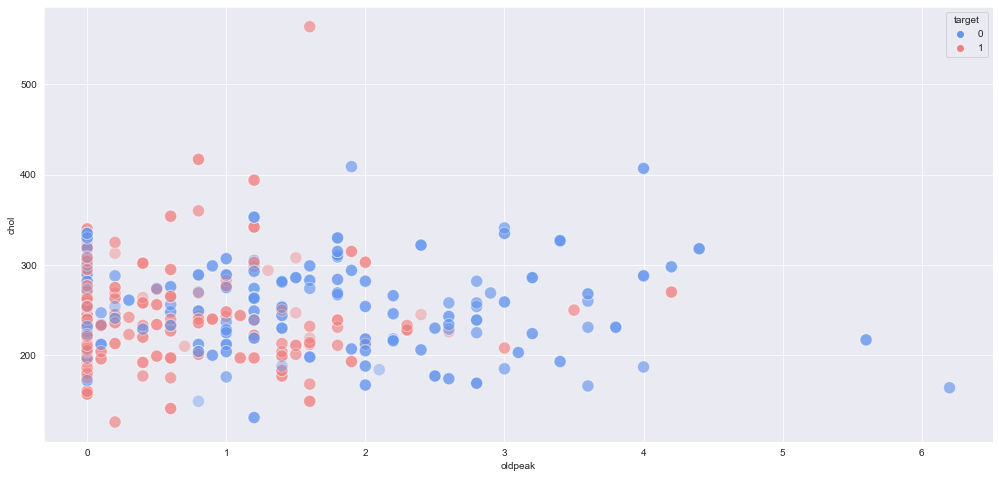

thalach


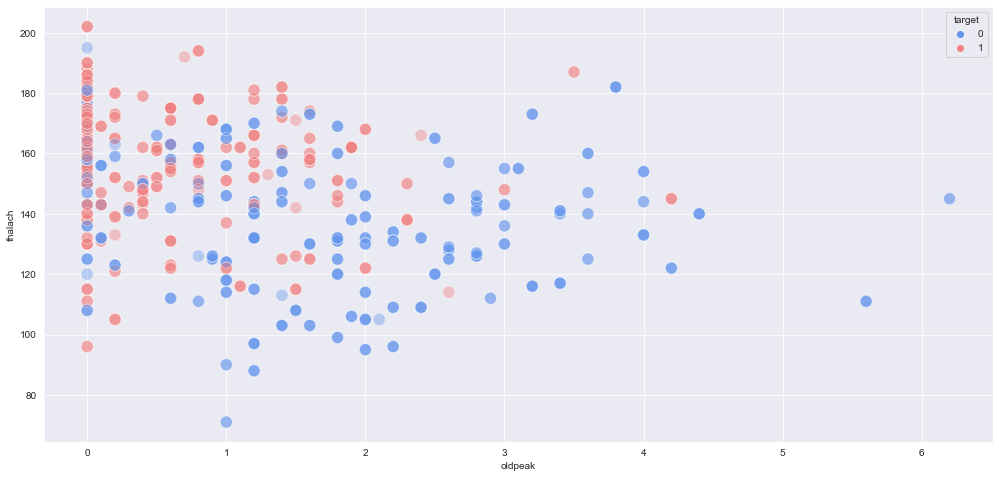

oldpeak


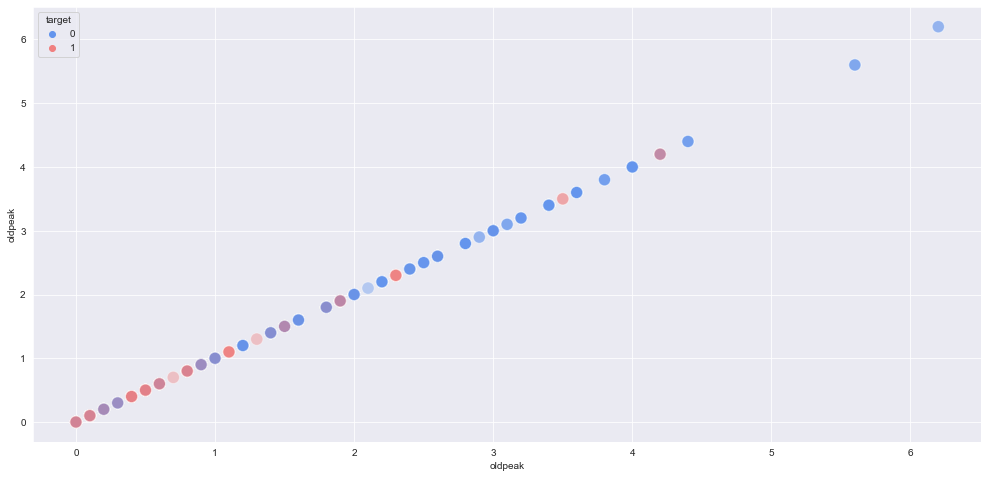

In [358]:
for col in continuous_features:
    print(col)
    plt.figure(figsize = (17,8))
    sns.scatterplot(data=train_df, x='oldpeak',y=col,hue='target',palette=['cornflowerblue','lightcoral'],alpha=0.4,s=150)
    plt.xlabel('oldpeak')
    plt.ylabel(col)
    plt.show()

### Observations:

1. From above we can observe the relationship among the continuous features

In [359]:
train_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [360]:
fig = px.scatter_3d(train_df, x="age", y="thalach", z="oldpeak", color="target")
fig.show()

### Discrete_features

### Univariate/Bivariate analysis

In [361]:
train_df[discrete_features].nunique().sort_values(ascending=False)

ca         5
cp         4
thal       4
restecg    3
slope      3
sex        2
fbs        2
exang      2
target     2
dtype: int64

In [362]:
discrete_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [363]:
discrete_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

discrete_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

sex


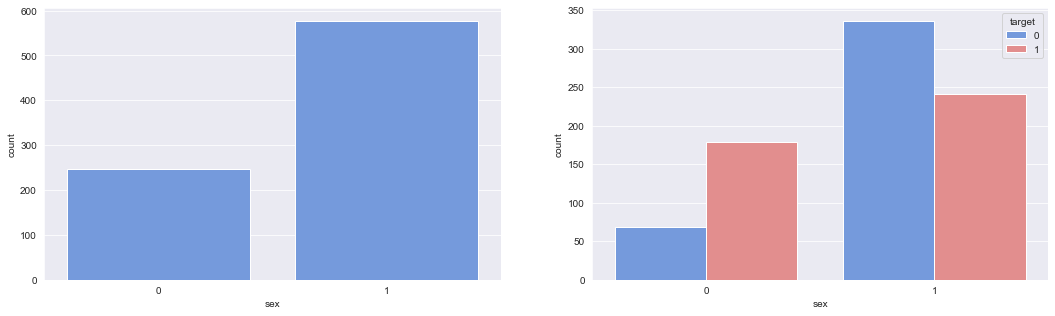

cp


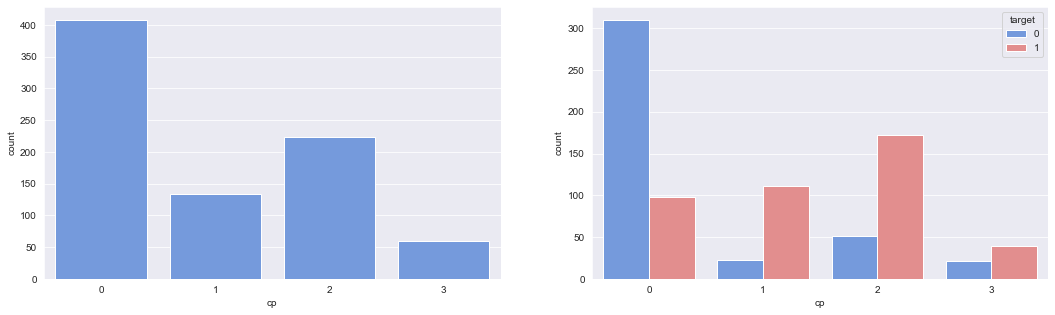

fbs


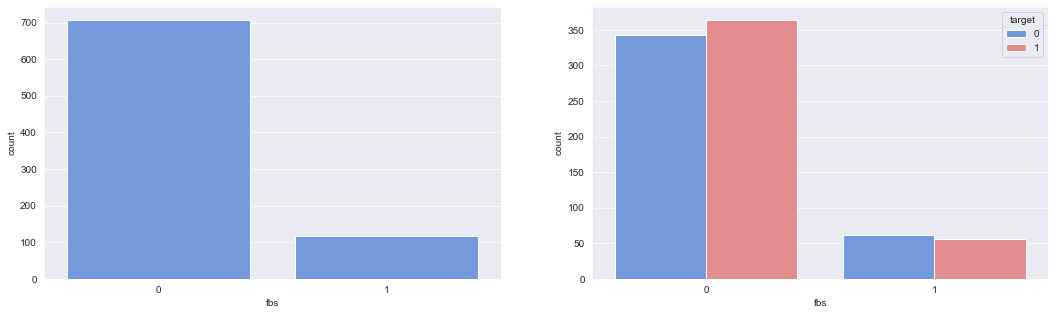

restecg


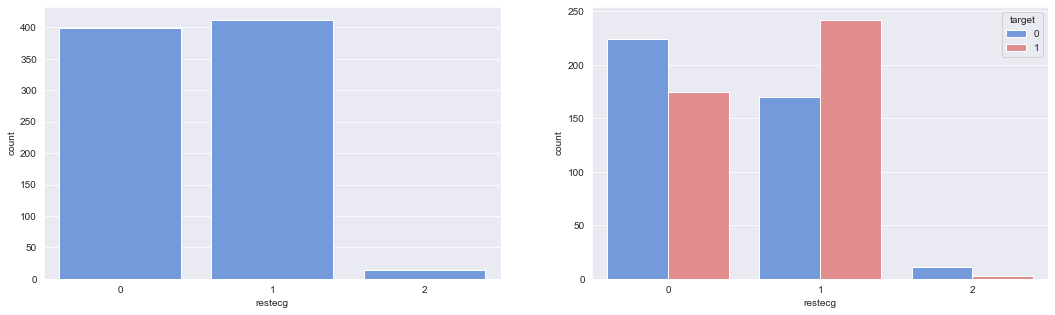

exang


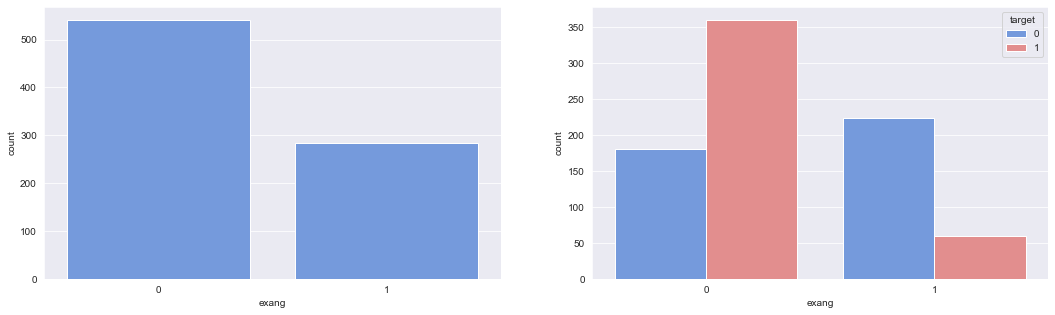

slope


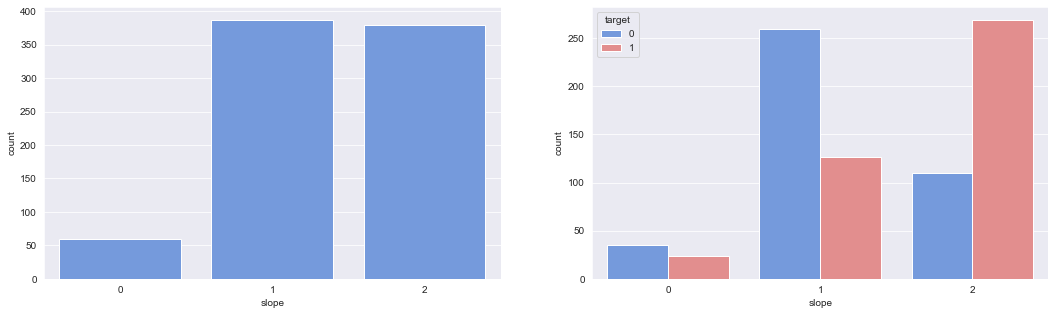

ca


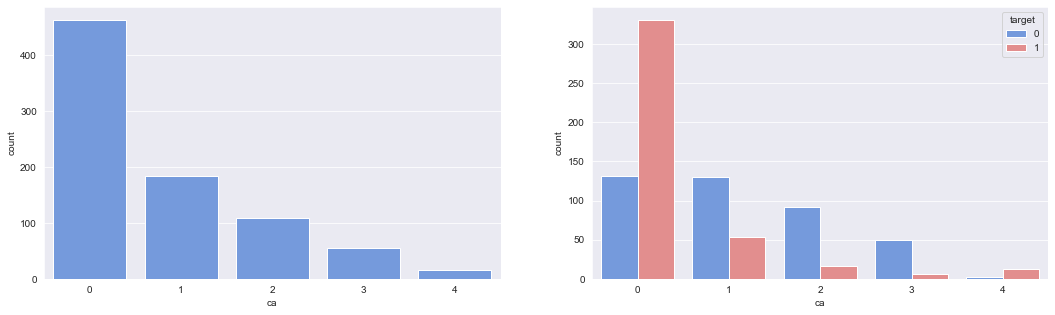

thal


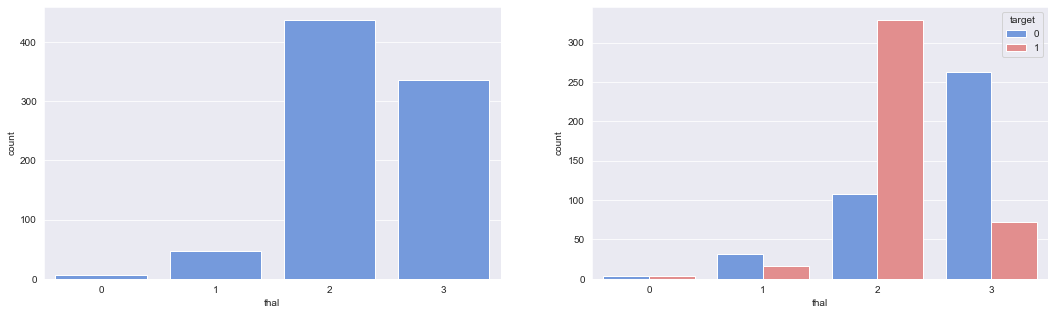

In [364]:
for col in discrete_features:
    print(col)
    plt.figure(figsize = (18,5))
    plt.subplot(1, 2, 1)
    sns.countplot(data=train_df, x=col,color='cornflowerblue',order=train_df[col].value_counts().sort_index().index)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.countplot(data=train_df, x=col, hue="target",palette=['cornflowerblue','lightcoral'],order=train_df[col].value_counts().sort_index().index)
    plt.show()

sex


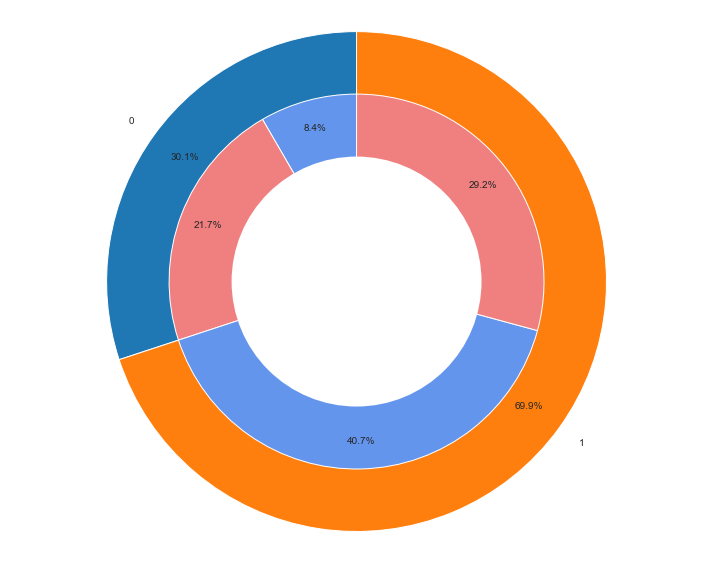

In [365]:
print('sex')
labels = train_df['sex'].value_counts().sort_index().index
sizes = train_df['sex'].value_counts().sort_index().values
labels_gender = [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]
sizes_gender = train_df.groupby(['sex','target'])['target'].count().values
#colors = ['slategrey', '#ffcc99']
colors_gender = ['cornflowerblue','lightcoral','cornflowerblue','lightcoral']
 
# Plot
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, startangle=90,frame=True,autopct='%1.1f%%', pctdistance=0.85)
plt.pie(sizes_gender,colors=colors_gender,radius=0.75,startangle=90,autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

cp


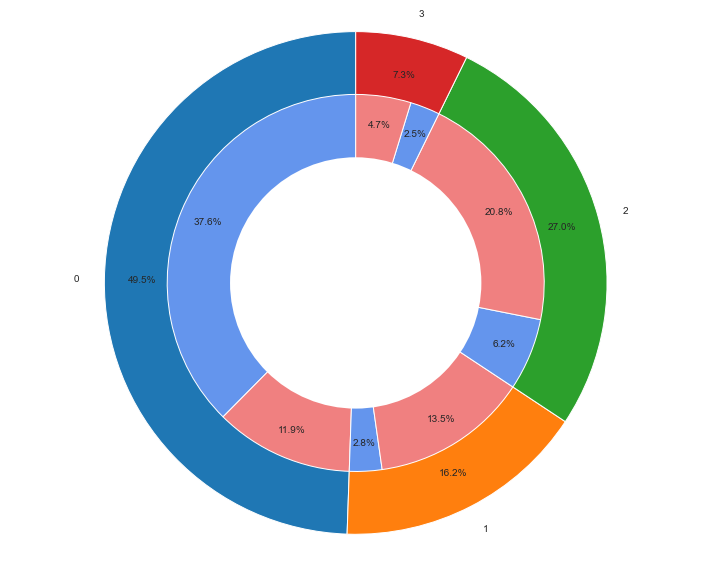

In [366]:
print('cp')
labels = train_df['cp'].value_counts().sort_index().index
sizes = train_df['cp'].value_counts().sort_index().values
labels_gender = [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]
sizes_gender = train_df.groupby(['cp','target'])['target'].count().values
#colors = ['slategrey', '#ffcc99']
colors_gender = ['cornflowerblue','lightcoral','cornflowerblue','lightcoral','cornflowerblue','lightcoral','cornflowerblue','lightcoral']
 
# Plot
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, startangle=90,frame=True,autopct='%1.1f%%', pctdistance=0.85)
plt.pie(sizes_gender,colors=colors_gender,radius=0.75,startangle=90,autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

fbs


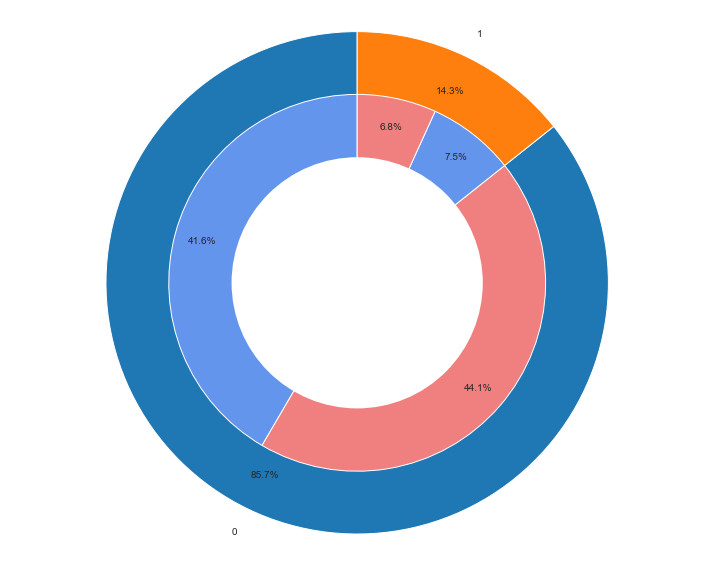

In [367]:
print('fbs')
labels = train_df['fbs'].value_counts().sort_index().index
sizes = train_df['fbs'].value_counts().sort_index().values
labels_gender = [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]
sizes_gender = train_df.groupby(['fbs','target'])['target'].count().values
#colors = ['slategrey', '#ffcc99']
colors_gender = ['cornflowerblue','lightcoral','cornflowerblue','lightcoral','cornflowerblue','lightcoral']
 
# Plot
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, startangle=90,frame=True,autopct='%1.1f%%', pctdistance=0.85)
plt.pie(sizes_gender,colors=colors_gender,radius=0.75,startangle=90,autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

restecg


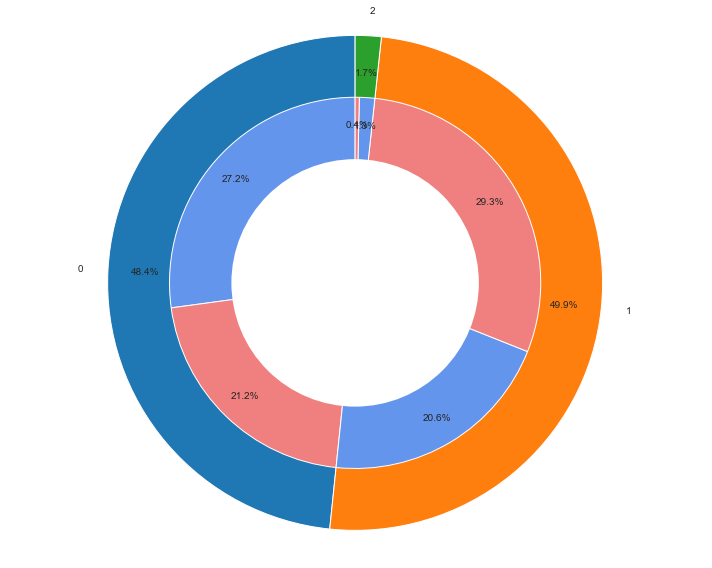

In [368]:
print('restecg')
labels = train_df['restecg'].value_counts().sort_index().index
sizes = train_df['restecg'].value_counts().sort_index().values
labels_gender = [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]
sizes_gender = train_df.groupby(['restecg','target'])['target'].count().values
#colors = ['slategrey', '#ffcc99']
colors_gender = ['cornflowerblue','lightcoral','cornflowerblue','lightcoral']
 
# Plot
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, startangle=90,frame=True,autopct='%1.1f%%', pctdistance=0.85)
plt.pie(sizes_gender,colors=colors_gender,radius=0.75,startangle=90,autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

exang


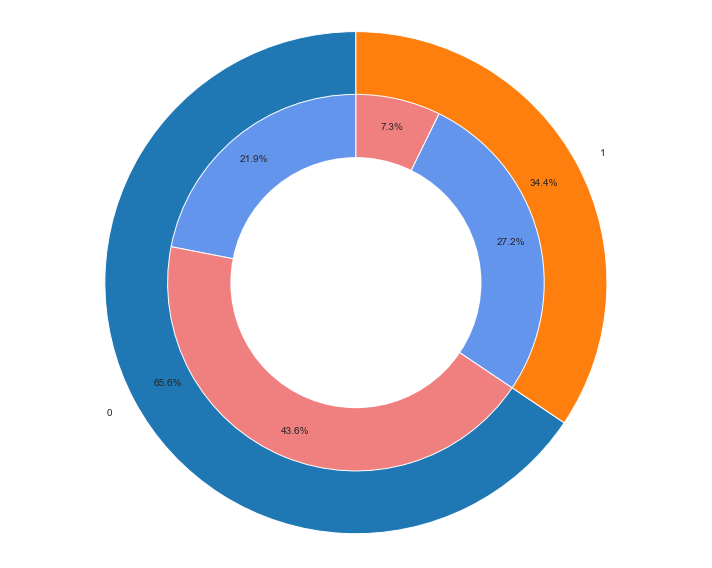

In [369]:
print('exang')
labels = train_df['exang'].value_counts().sort_index().index
sizes = train_df['exang'].value_counts().sort_index().values
labels_gender = [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]
sizes_gender = train_df.groupby(['exang','target'])['target'].count().values
#colors = ['slategrey', '#ffcc99']
colors_gender = ['cornflowerblue','lightcoral','cornflowerblue','lightcoral']
 
# Plot
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, startangle=90,frame=True,autopct='%1.1f%%', pctdistance=0.85)
plt.pie(sizes_gender,colors=colors_gender,radius=0.75,startangle=90,autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

slope


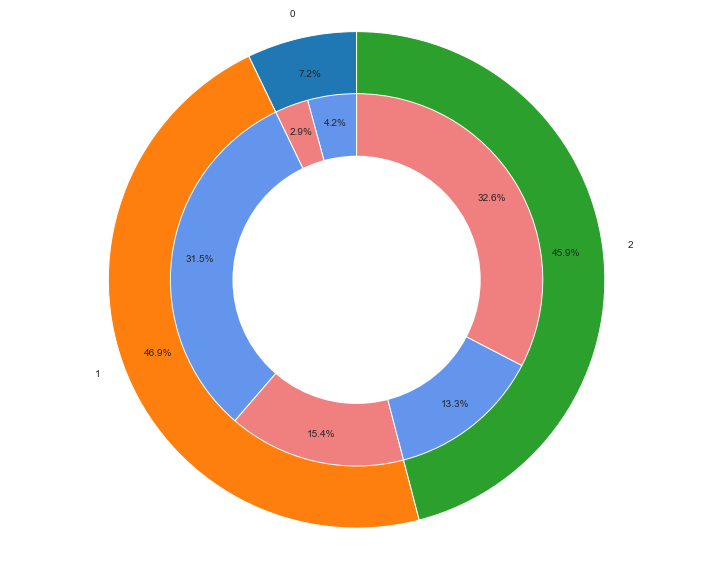

In [370]:
print('slope')
labels = train_df['slope'].value_counts().sort_index().index
sizes = train_df['slope'].value_counts().sort_index().values
labels_gender = [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]
sizes_gender = train_df.groupby(['slope','target'])['target'].count().values
#colors = ['slategrey', '#ffcc99']
colors_gender = ['cornflowerblue','lightcoral','cornflowerblue','lightcoral','cornflowerblue','lightcoral']
 
# Plot
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, startangle=90,frame=True,autopct='%1.1f%%', pctdistance=0.85)
plt.pie(sizes_gender,colors=colors_gender,radius=0.75,startangle=90,autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

ca


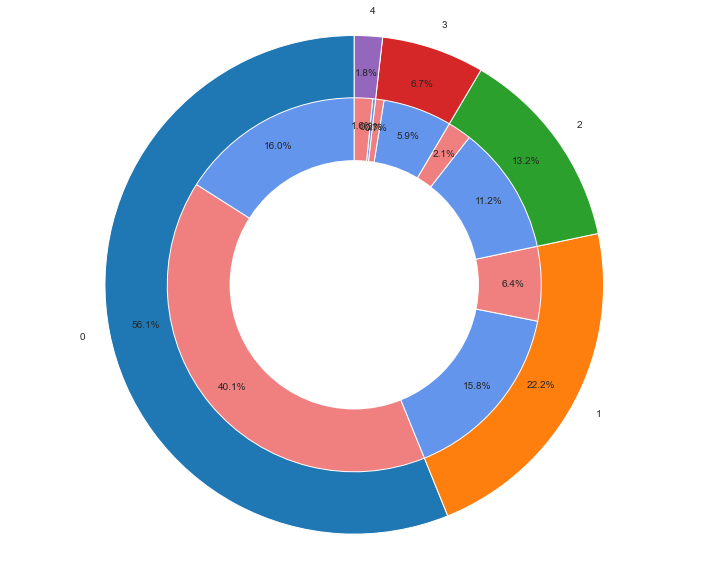

In [371]:
print('ca')
labels = train_df['ca'].value_counts().sort_index().index
sizes = train_df['ca'].value_counts().sort_index().values
labels_gender = [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]
sizes_gender = train_df.groupby(['ca','target'])['target'].count().values
#colors = ['slategrey', '#ffcc99']
colors_gender = ['cornflowerblue','lightcoral','cornflowerblue','lightcoral','cornflowerblue','lightcoral','cornflowerblue','lightcoral'
                ,'cornflowerblue','lightcoral']
 
# Plot
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, startangle=90,frame=True,autopct='%1.1f%%', pctdistance=0.85)
plt.pie(sizes_gender,colors=colors_gender,radius=0.75,startangle=90,autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

thal


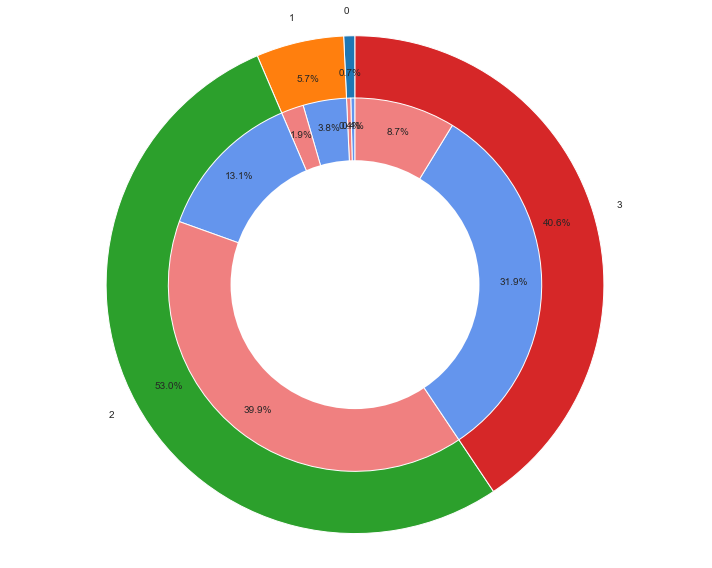

In [372]:
print('thal')
labels = train_df['thal'].value_counts().sort_index().index
sizes = train_df['thal'].value_counts().sort_index().values
labels_gender = [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]
sizes_gender = train_df.groupby(['thal','target'])['target'].count().values
#colors = ['slategrey', '#ffcc99']
colors_gender = ['cornflowerblue','lightcoral','cornflowerblue','lightcoral','cornflowerblue','lightcoral','cornflowerblue','lightcoral']
 
# Plot
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, startangle=90,frame=True,autopct='%1.1f%%', pctdistance=0.85)
plt.pie(sizes_gender,colors=colors_gender,radius=0.75,startangle=90,autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

### Observation :

1. From above we can clearly observe that females are more prone to heart diseases compared to males
2. If the cp>0 then there is high change of heart disease
3. fbs feature is unable ti distinguish the target variable
4. if restecg is 2 then there is high change of heart disease
5. exang = 0 then there is high change of heart disease
6. slope =2 then there is high change of heart disease
7. ca = 0  then there is high change of heart disease
8. thal = 2 then there is high change of heart disease

In [373]:
discrete_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [374]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [375]:
from num2words import num2words

In [376]:
data = train_df.copy()

In [377]:
data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     62    0   0       138   294    1        1      106      0      1.9   
4     58    0   0       100   248    0        0      122      0      1.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
820   59    1   1       140   221    0        1      164      1      0.0   
821   60    1   0       125   258    0        0      141      1      2.8   
822   47    1   0       110   275    0        0      118      1      1.0   
823   50    0   0       110   254    0        0      159      0      0.0   
824   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   2     3       0  
1        0   0     3       0  
2        0   0     3       0  
3        1   3     2       0  
4        1   0     2       1  
..     ...  ..   ...     ...  
820      2   0     2       1  
821      1   1     3       0  
822      1   1     2       0  
823      2   0     2       1  
824      1   1     3       0  

[825 rows x 14 columns]

In [378]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       825 non-null    int64  
 1   sex       825 non-null    int64  
 2   cp        825 non-null    int64  
 3   trestbps  825 non-null    int64  
 4   chol      825 non-null    int64  
 5   fbs       825 non-null    int64  
 6   restecg   825 non-null    int64  
 7   thalach   825 non-null    int64  
 8   exang     825 non-null    int64  
 9   oldpeak   825 non-null    float64
 10  slope     825 non-null    int64  
 11  ca        825 non-null    int64  
 12  thal      825 non-null    int64  
 13  target    825 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 90.4 KB


In [379]:
for col in discrete_features:
    data[col] = data[col].apply(lambda x: num2words(x))

In [380]:
data

age   sex    cp  trestbps  chol   fbs restecg  thalach exang  oldpeak  \
0     52   one  zero       125   212  zero     one      168  zero      1.0   
1     53   one  zero       140   203   one    zero      155   one      3.1   
2     70   one  zero       145   174  zero     one      125   one      2.6   
3     62  zero  zero       138   294   one     one      106  zero      1.9   
4     58  zero  zero       100   248  zero    zero      122  zero      1.0   
..   ...   ...   ...       ...   ...   ...     ...      ...   ...      ...   
820   59   one   one       140   221  zero     one      164   one      0.0   
821   60   one  zero       125   258  zero    zero      141   one      2.8   
822   47   one  zero       110   275  zero    zero      118   one      1.0   
823   50  zero  zero       110   254  zero    zero      159  zero      0.0   
824   54   one  zero       120   188  zero     one      113  zero      1.4   

    slope     ca   thal  target  
0     two    two  three       0  
1    zero   zero  three       0  
2    zero   zero  three       0  
3     one  three    two       0  
4     one   zero    two       1  
..    ...    ...    ...     ...  
820   two   zero    two       1  
821   one    one  three       0  
822   one    one    two       0  
823   two   zero    two       1  
824   one    one  three       0  

[825 rows x 14 columns]

In [381]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       825 non-null    int64  
 1   sex       825 non-null    object 
 2   cp        825 non-null    object 
 3   trestbps  825 non-null    int64  
 4   chol      825 non-null    int64  
 5   fbs       825 non-null    object 
 6   restecg   825 non-null    object 
 7   thalach   825 non-null    int64  
 8   exang     825 non-null    object 
 9   oldpeak   825 non-null    float64
 10  slope     825 non-null    object 
 11  ca        825 non-null    object 
 12  thal      825 non-null    object 
 13  target    825 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 90.4+ KB


In [382]:
discrete_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [383]:
train_df[discrete_features].nunique()

sex        2
cp         4
fbs        2
restecg    3
exang      2
slope      3
ca         5
thal       4
dtype: int64

In [384]:
data['cp'].unique()

array(['zero', 'two', 'one', 'three'], dtype=object)

age


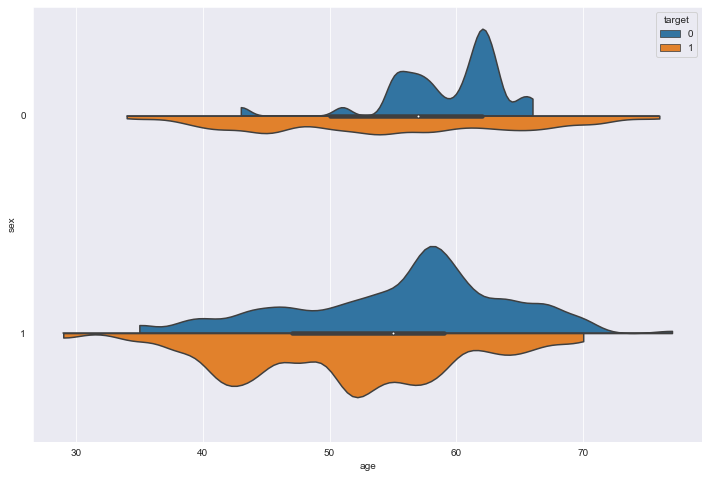

trestbps


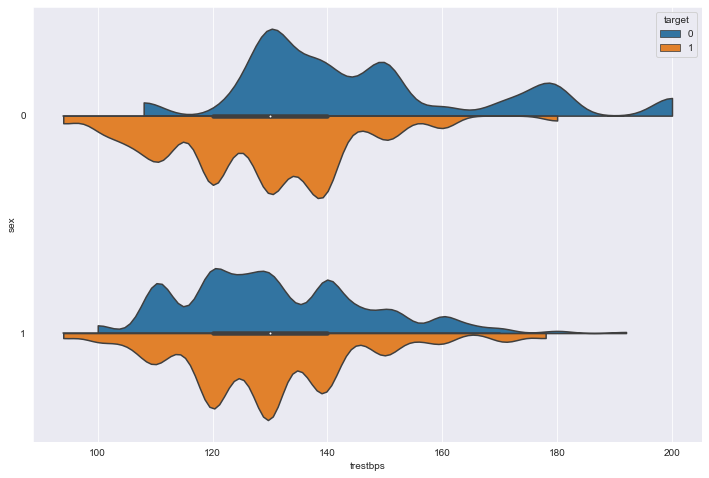

chol


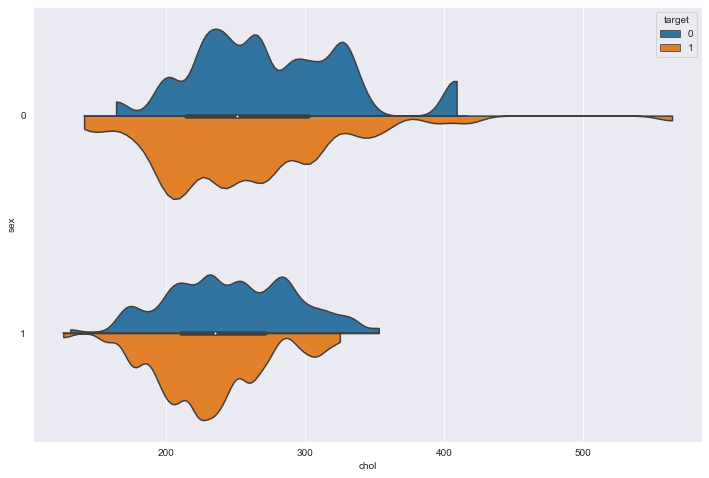

thalach


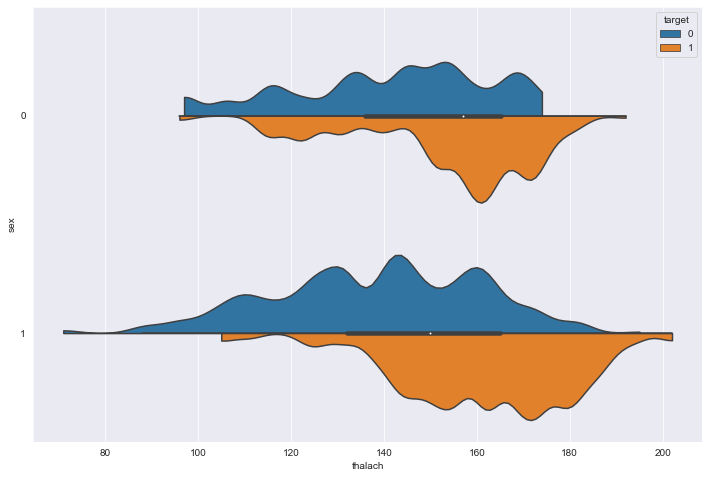

oldpeak


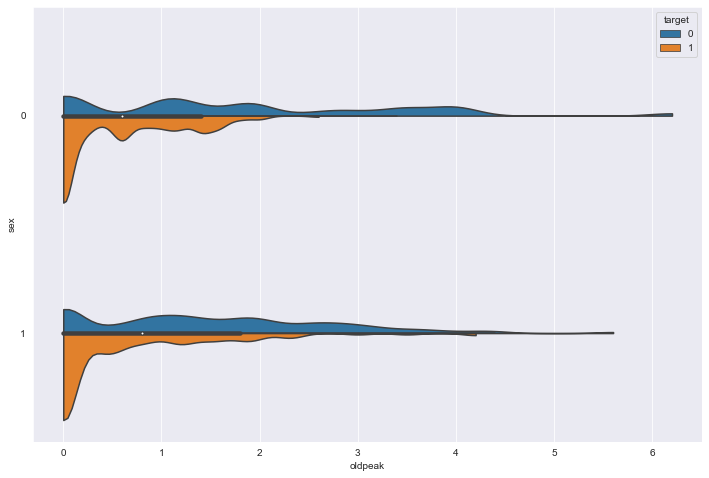

In [385]:
for col in continuous_features:
    print(col)
    plt.figure(figsize = (12,8))
    sns.violinplot(data=train_df, x=col, y="sex", hue="target", split=True,orient='h', bw=.15,cut=0)
    plt.xlabel(col)
    plt.ylabel('sex')
    plt.show()

age


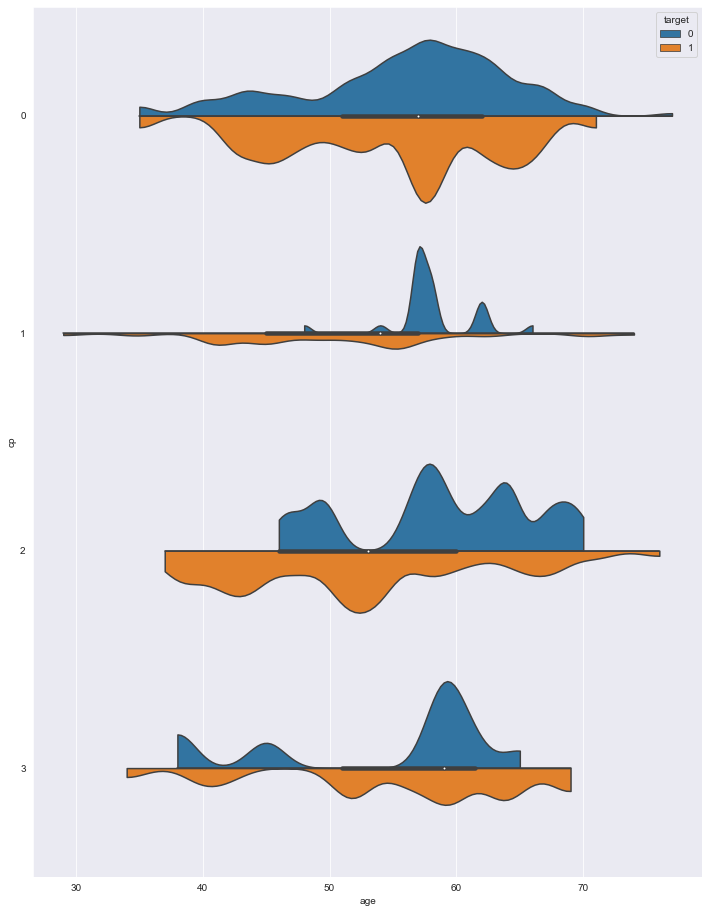

trestbps


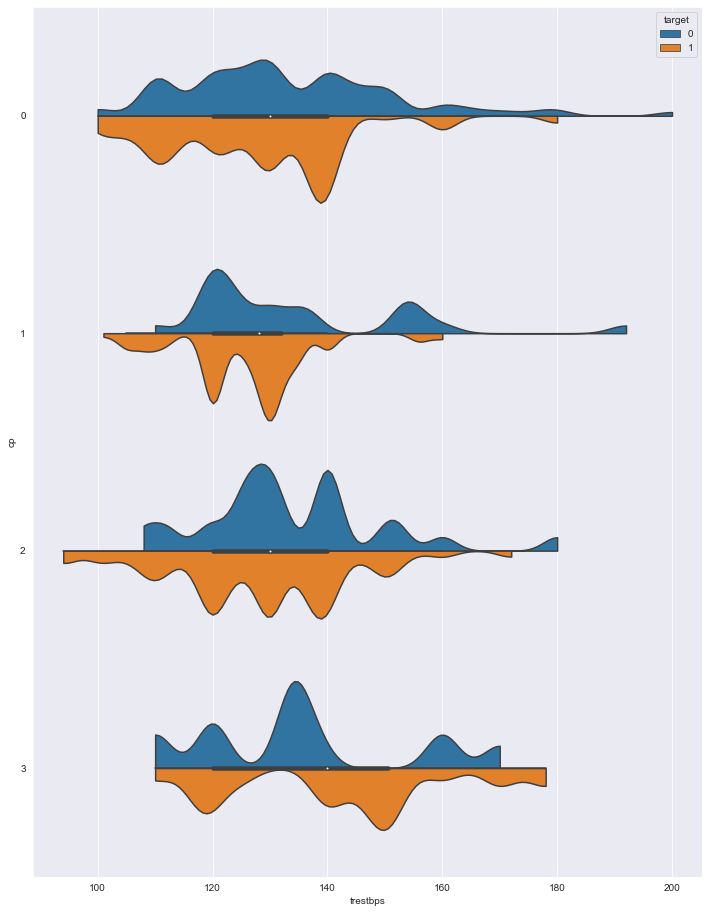

chol


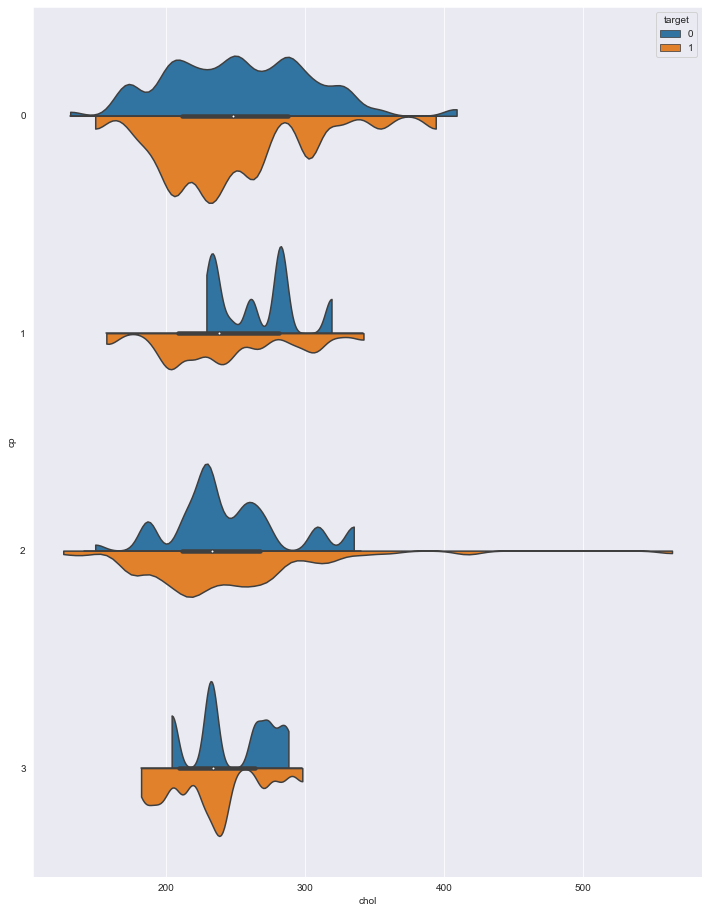

thalach


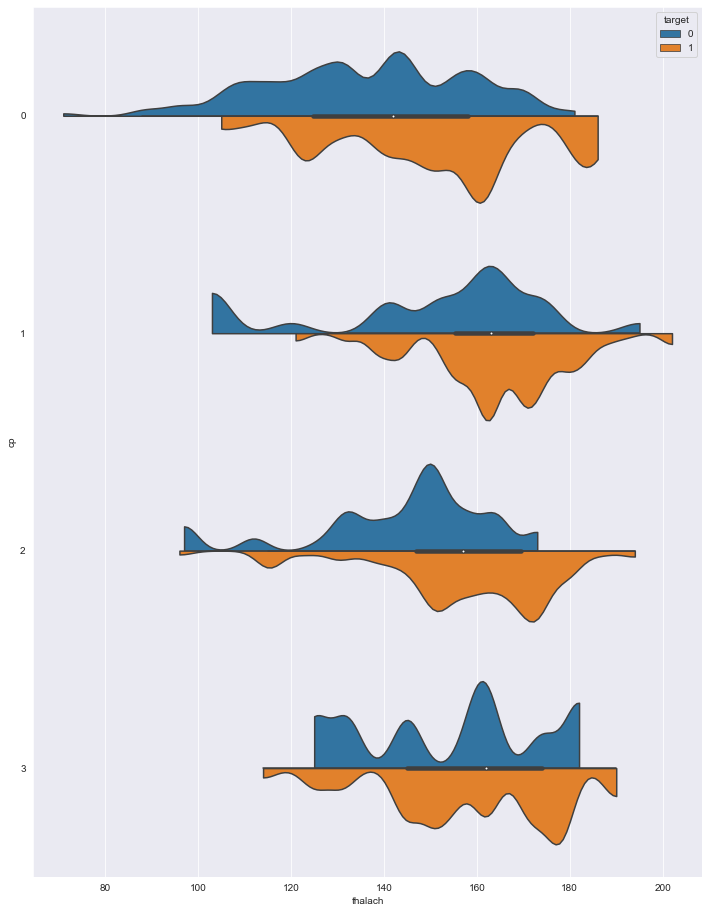

oldpeak


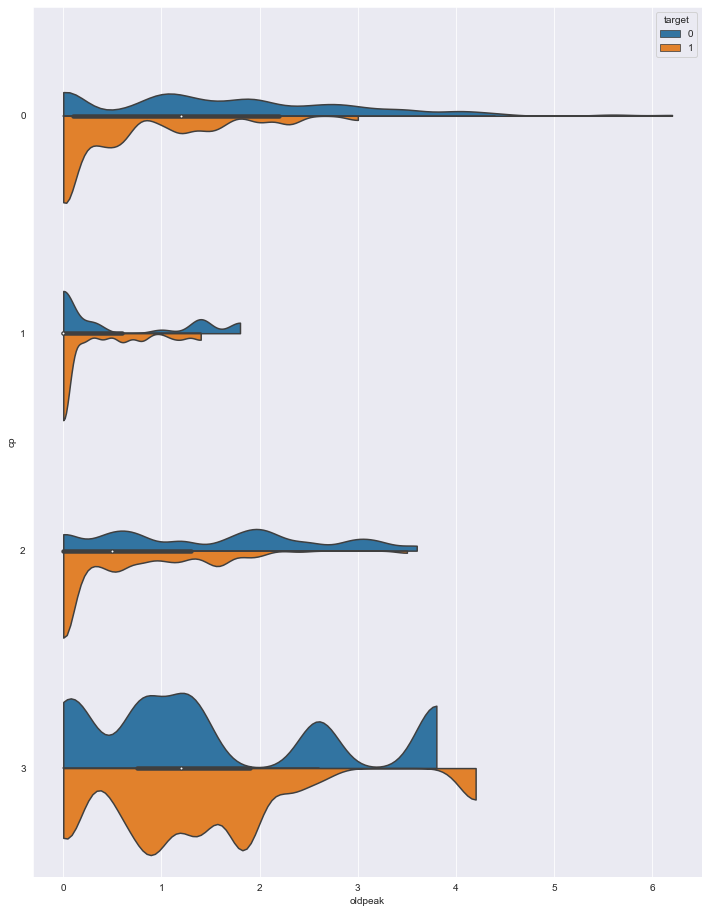

In [386]:
for col in continuous_features:
    print(col)
    plt.figure(figsize = (12,16))
    sns.violinplot(data=train_df, x=col, y="cp", hue="target", split=True,orient='h', bw=.15,cut=0)
    plt.xlabel(col)
    plt.ylabel('cp')
    plt.show()

age


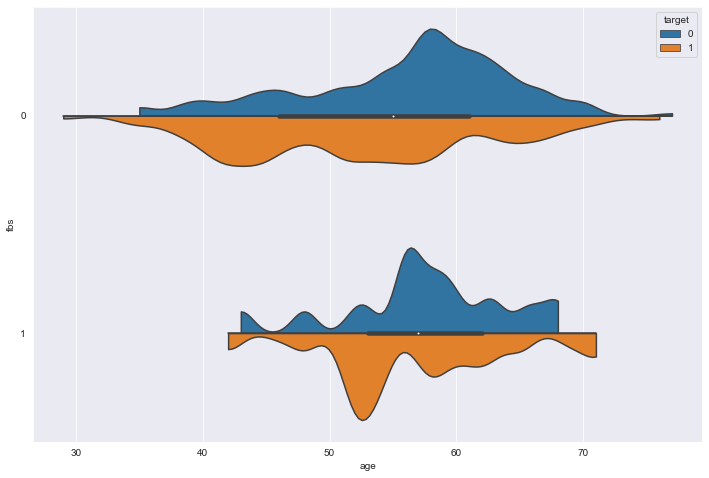

trestbps


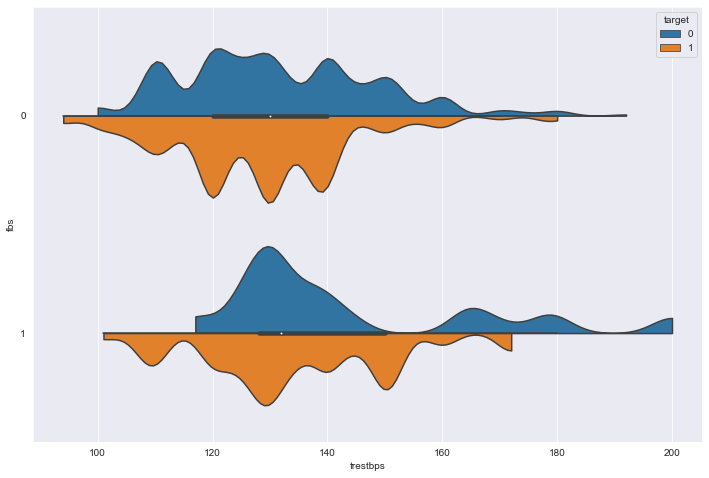

chol


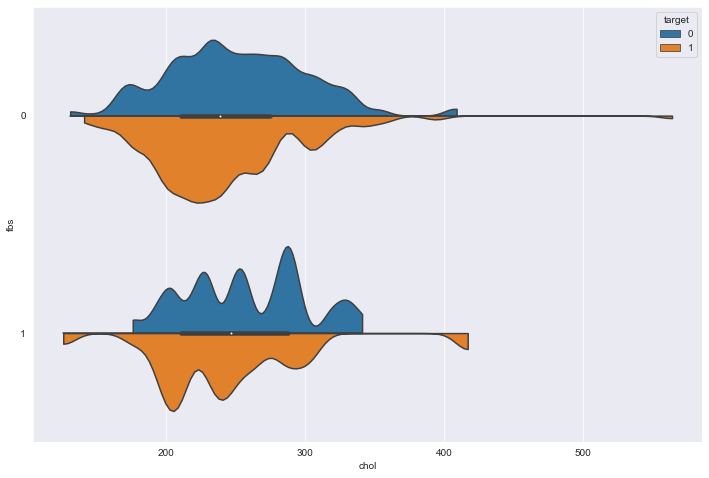

thalach


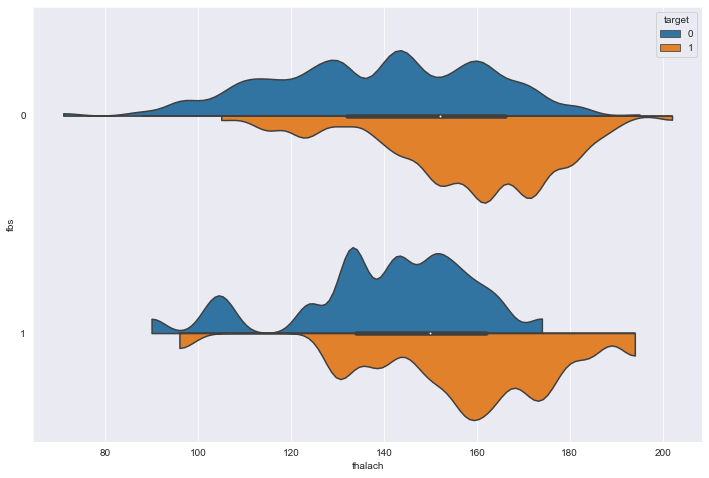

oldpeak


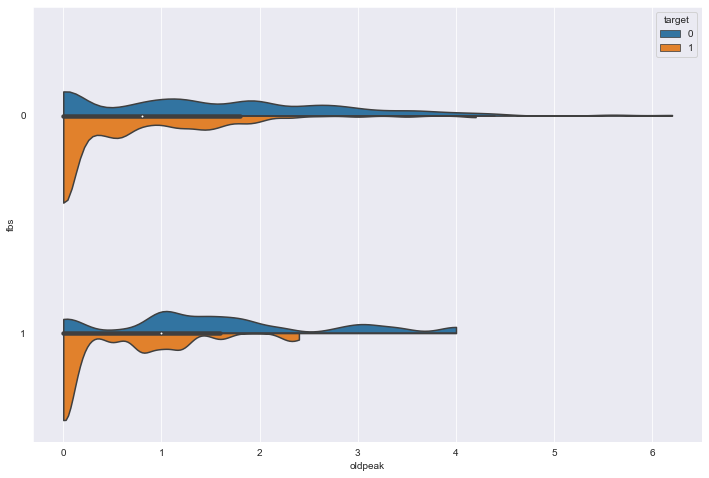

In [387]:
for col in continuous_features:
    print(col)
    plt.figure(figsize = (12,8))
    sns.violinplot(data=train_df, x=col, y="fbs", hue="target", split=True,orient='h', bw=.15,cut=0)
    plt.xlabel(col)
    plt.ylabel('fbs')
    plt.show()

age


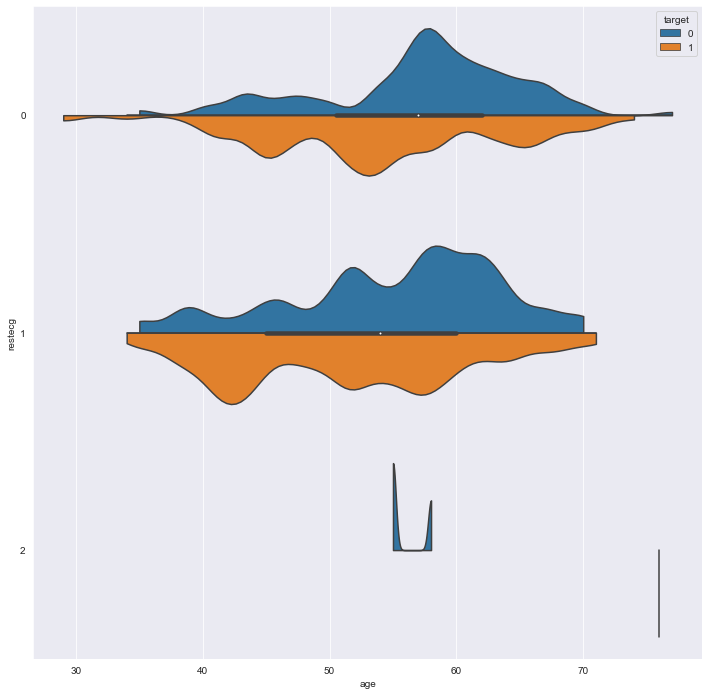

trestbps


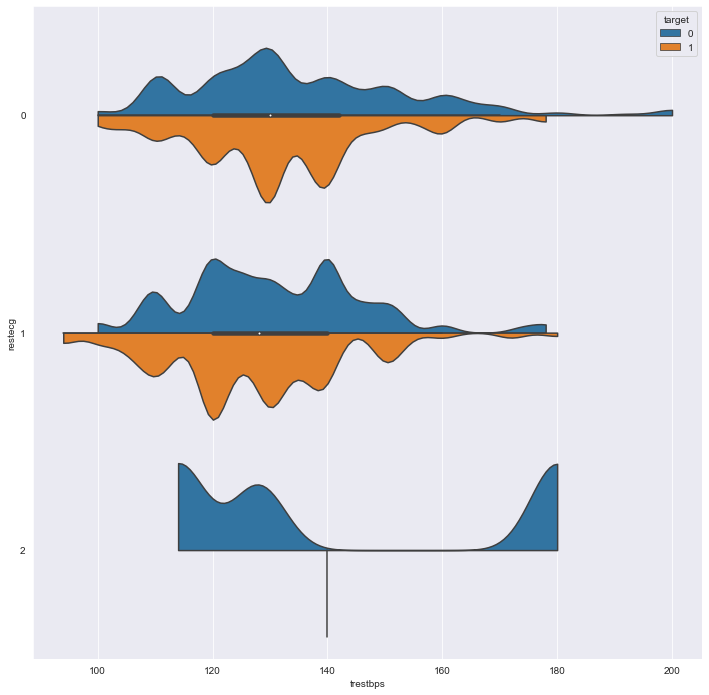

chol


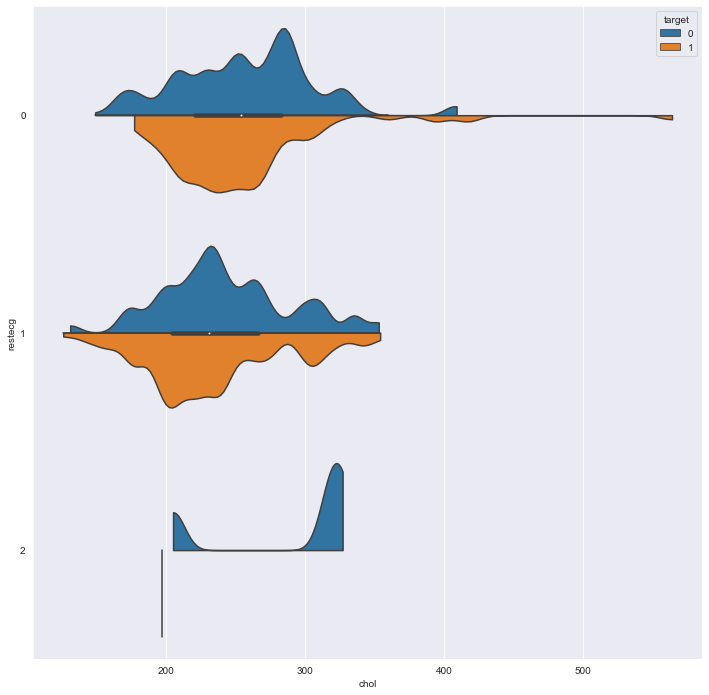

thalach


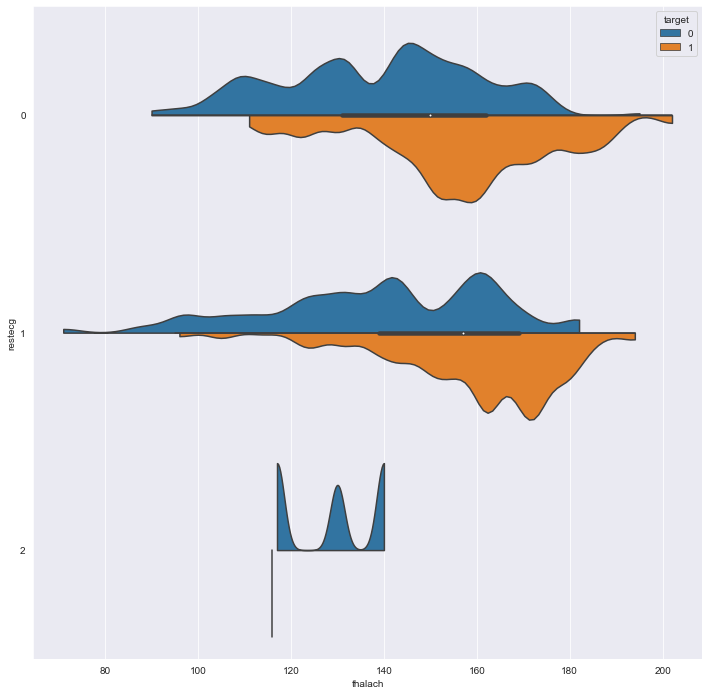

oldpeak


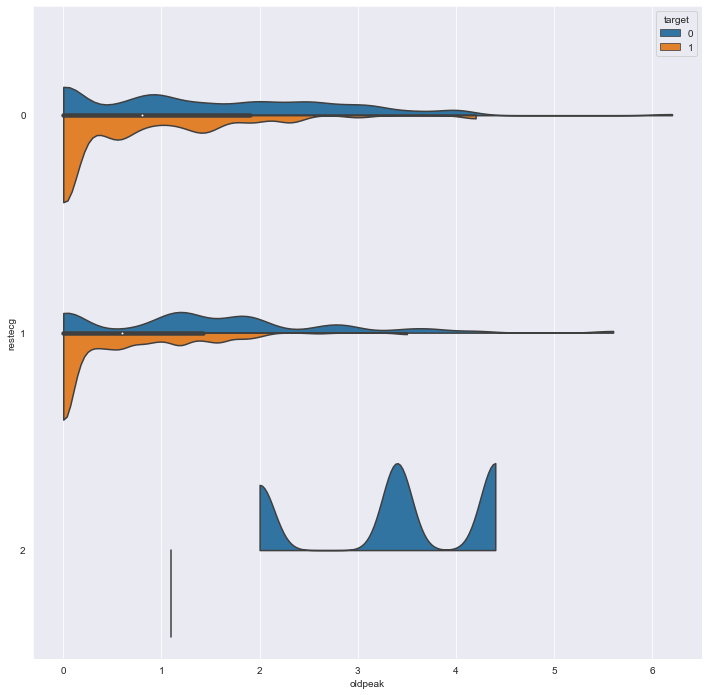

In [388]:
for col in continuous_features:
    print(col)
    plt.figure(figsize = (12,12))
    sns.violinplot(data=train_df, x=col, y="restecg", hue="target", split=True,orient='h', bw=.15,cut=0)
    plt.xlabel(col)
    plt.ylabel('restecg')
    plt.show()

age


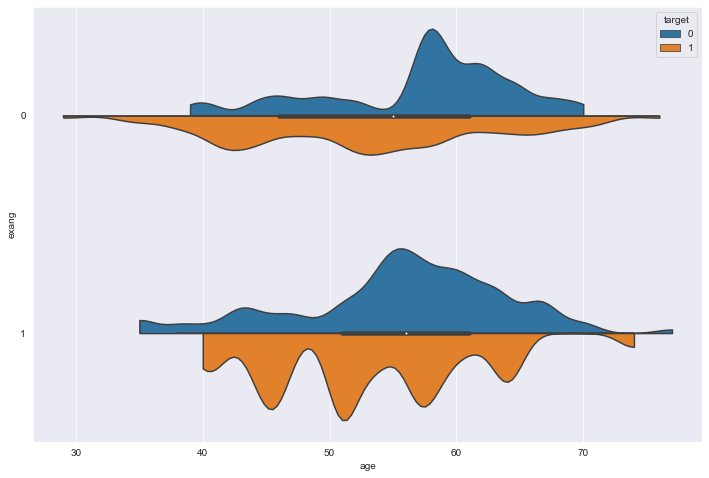

trestbps


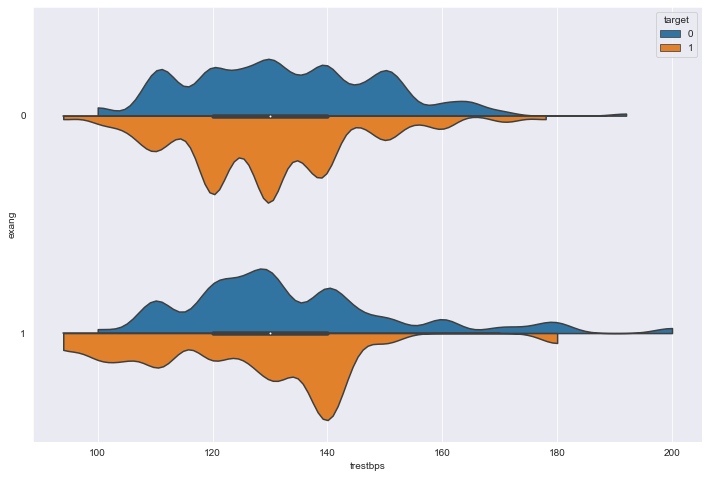

chol


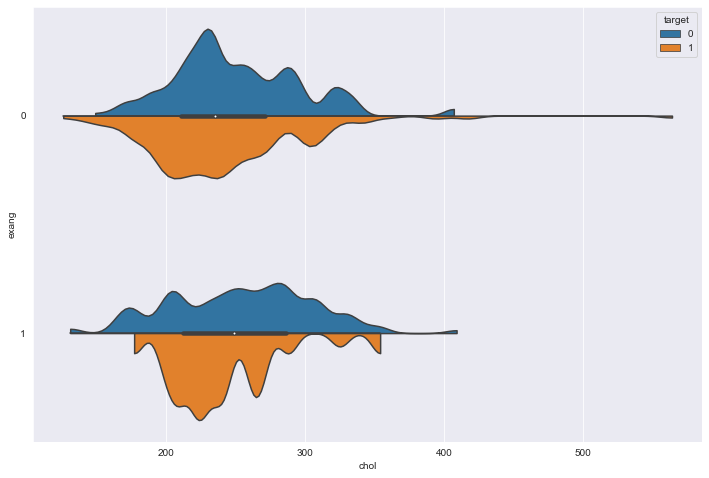

thalach


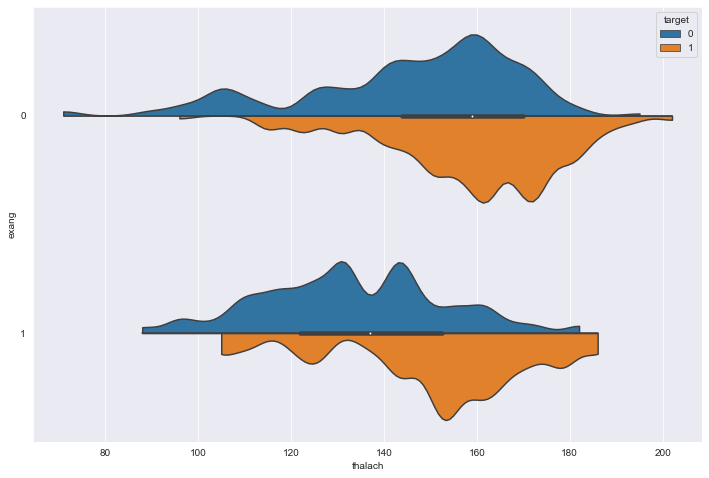

oldpeak


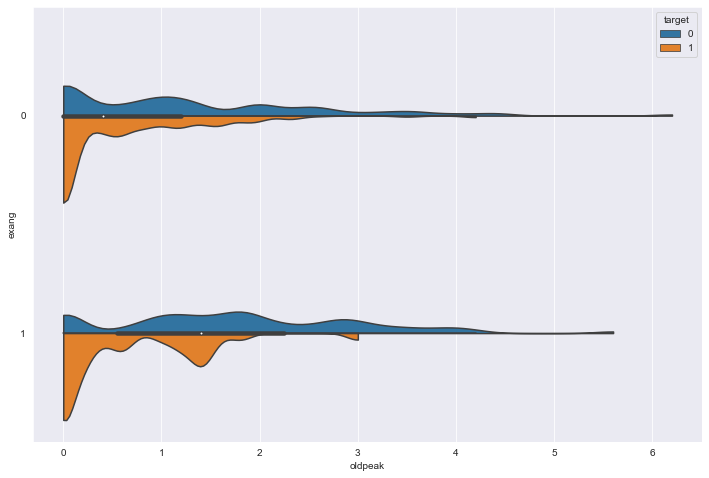

In [389]:
for col in continuous_features:
    print(col)
    plt.figure(figsize = (12,8))
    sns.violinplot(data=train_df, x=col, y="exang", hue="target", split=True,orient='h', bw=.15,cut=0)
    plt.xlabel(col)
    plt.ylabel('exang')
    plt.show()

age


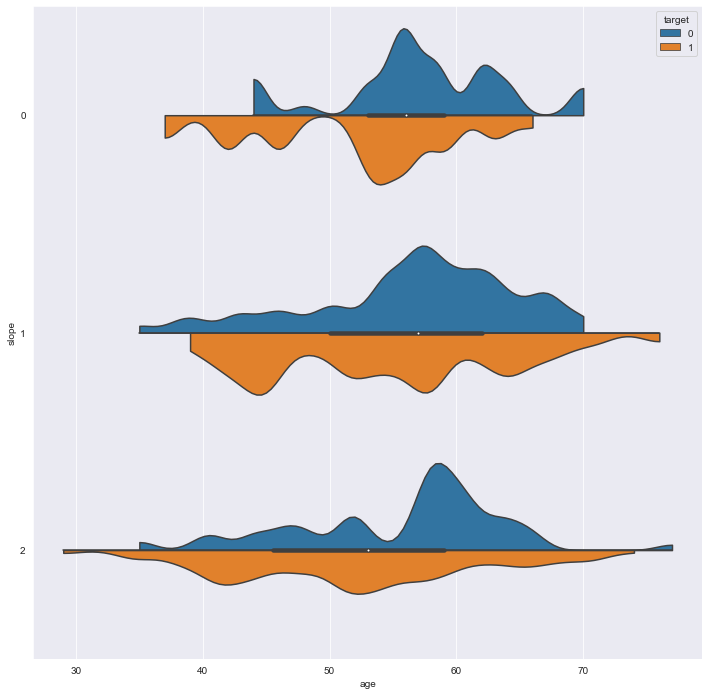

trestbps


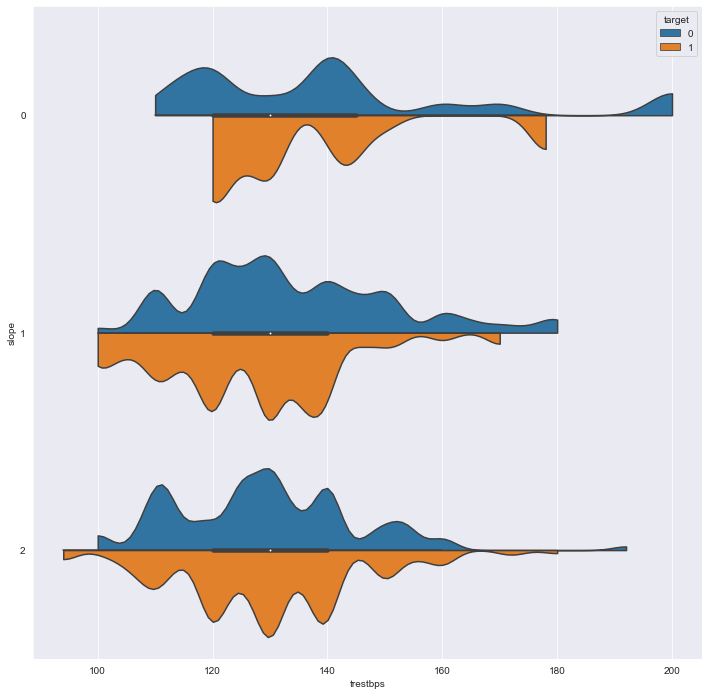

chol


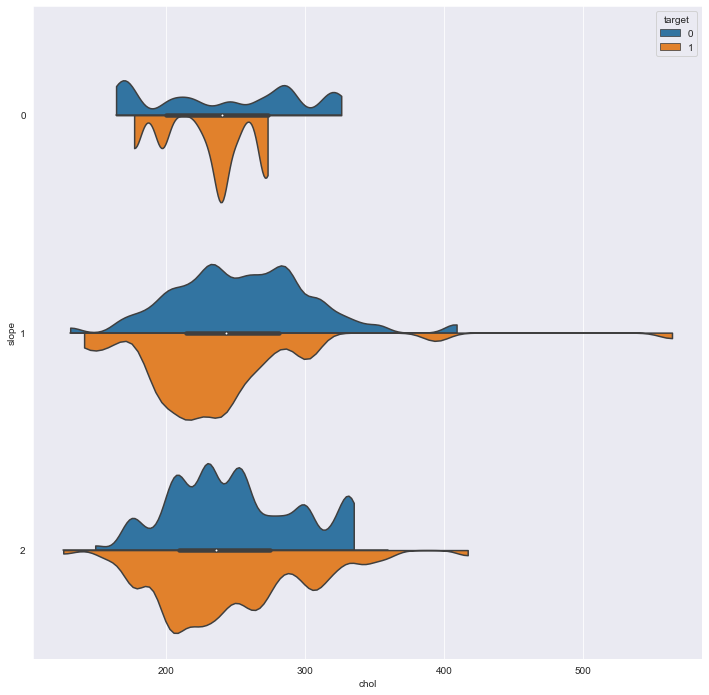

thalach


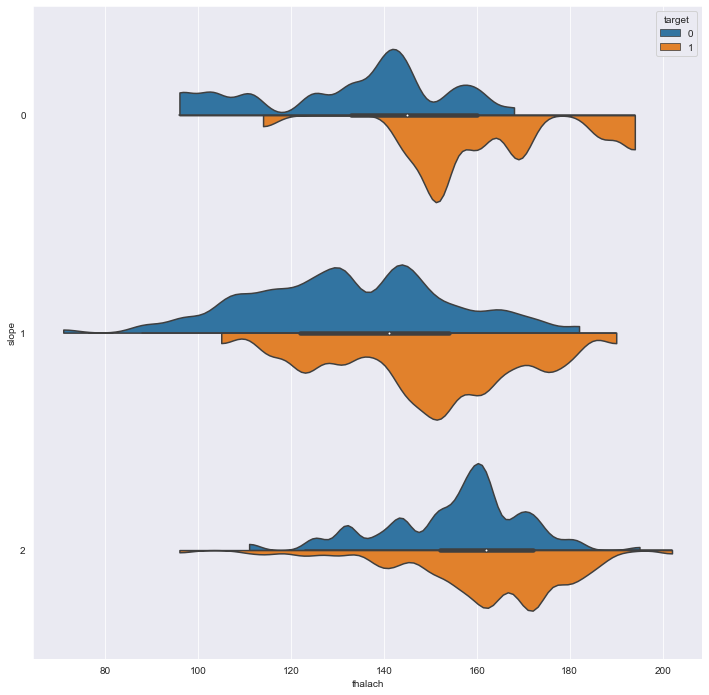

oldpeak


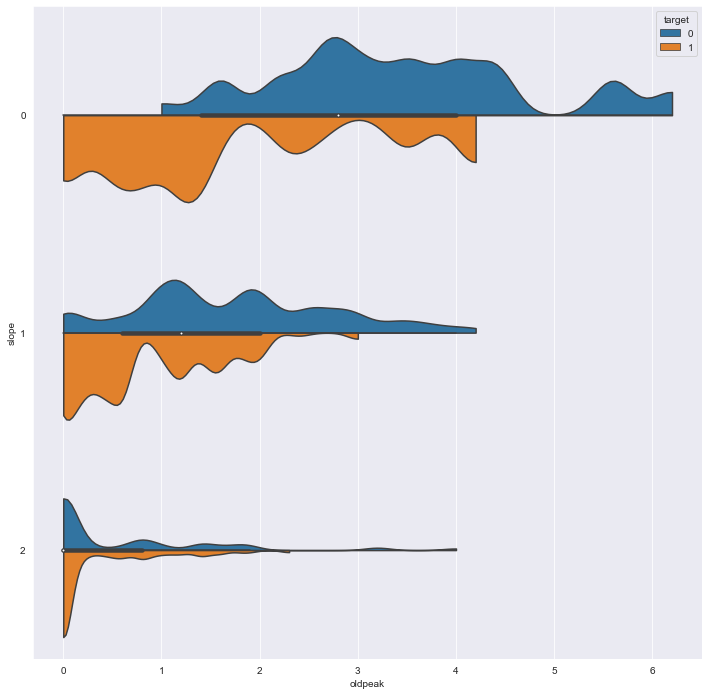

In [390]:
for col in continuous_features:
    print(col)
    plt.figure(figsize = (12,12))
    sns.violinplot(data=train_df, x=col, y="slope", hue="target", split=True,orient='h', bw=.15,cut=0)
    plt.xlabel(col)
    plt.ylabel('slope')
    plt.show()

age


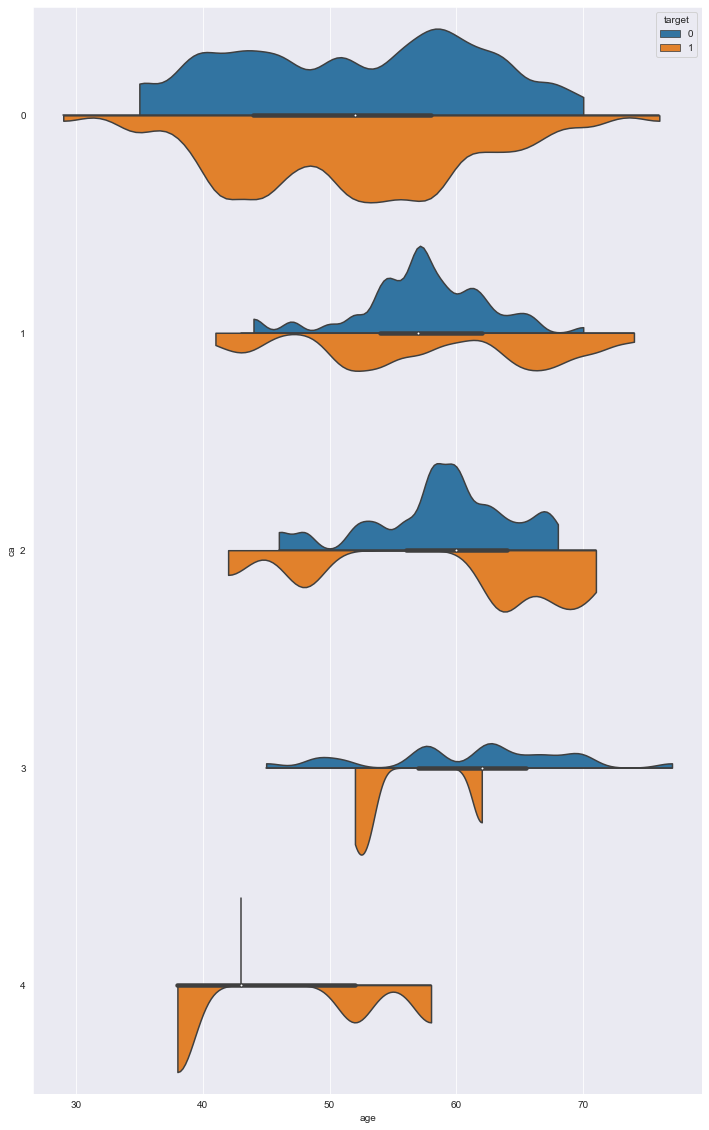

trestbps


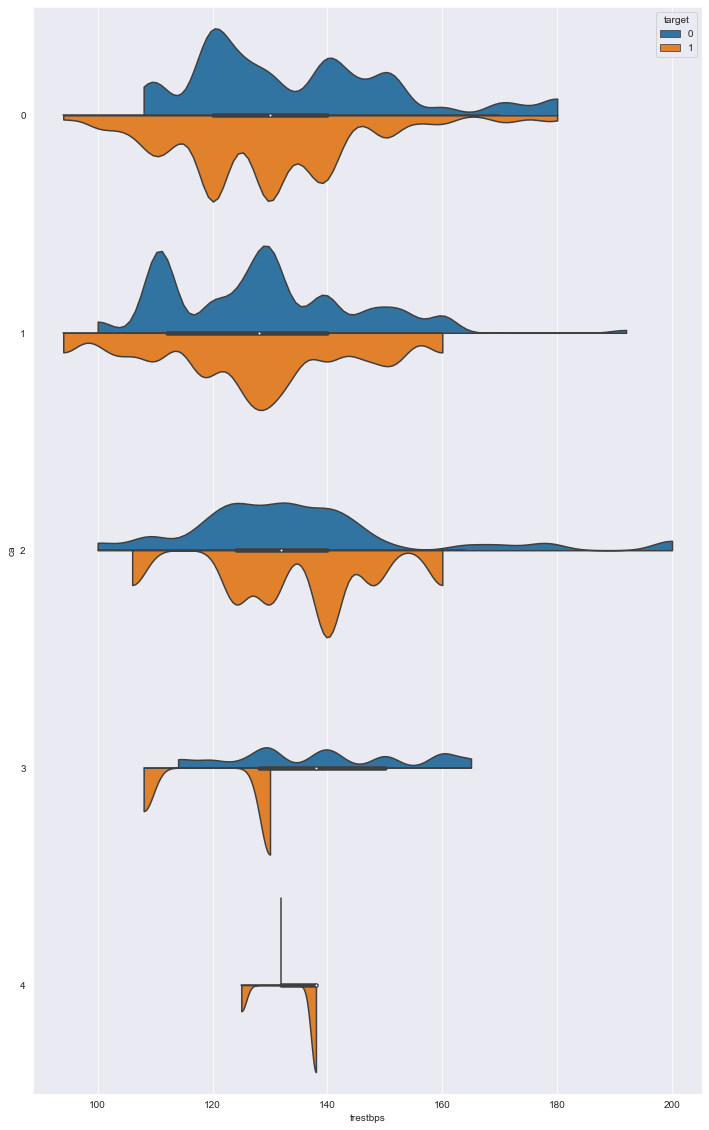

chol


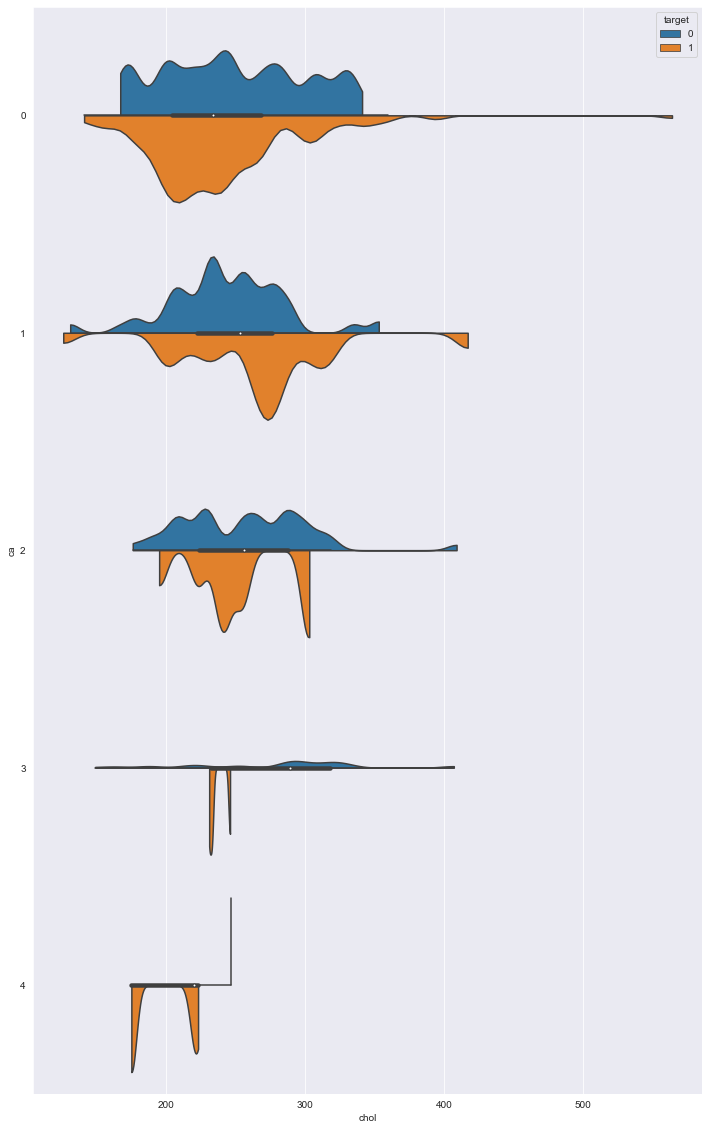

thalach


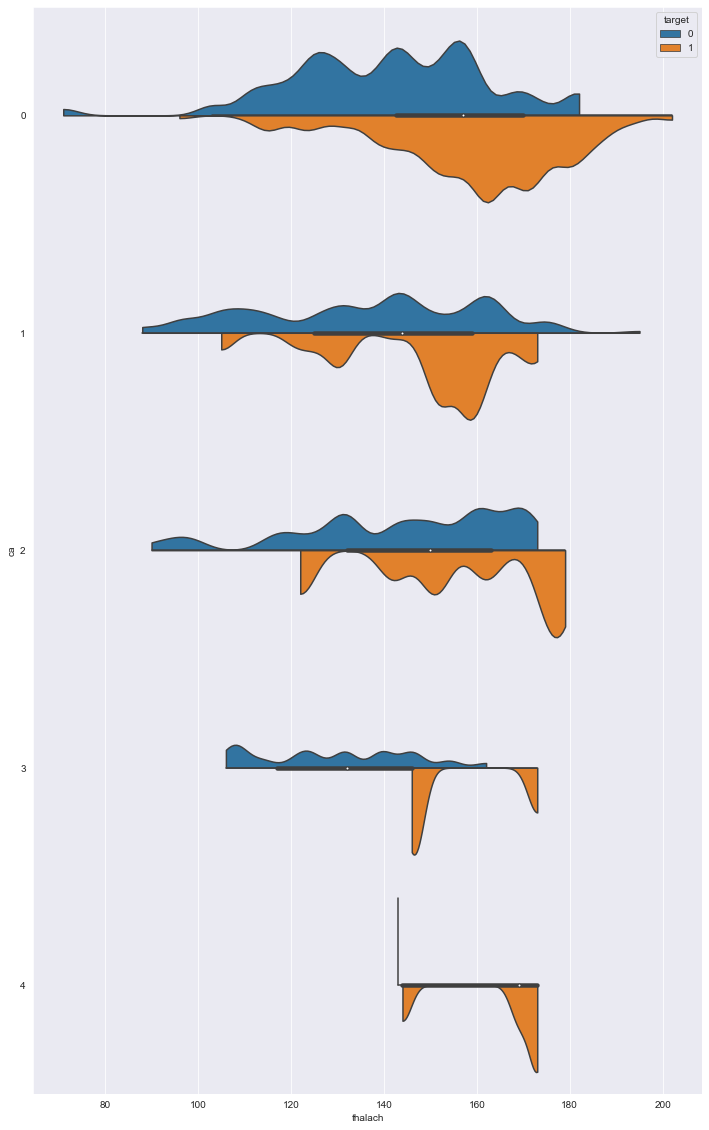

oldpeak


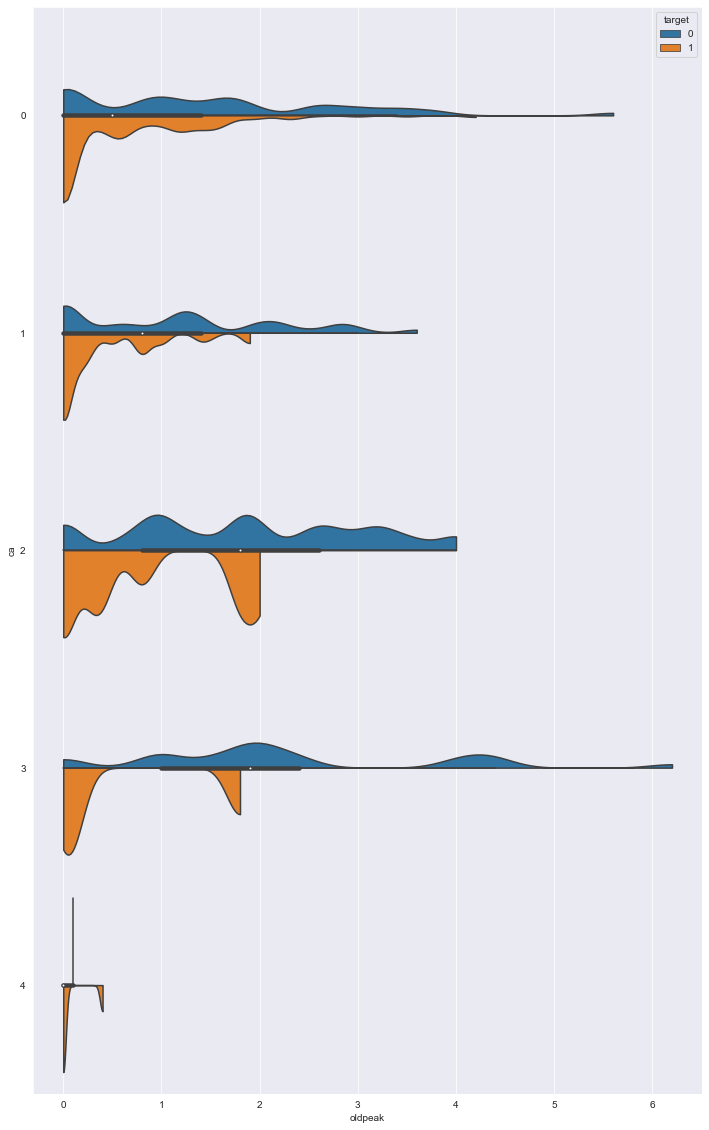

In [391]:
for col in continuous_features:
    print(col)
    plt.figure(figsize = (12,20))
    sns.violinplot(data=train_df, x=col, y="ca", hue="target", split=True,orient='h', bw=.15,cut=0)
    plt.xlabel(col)
    plt.ylabel('ca')
    plt.show()

age


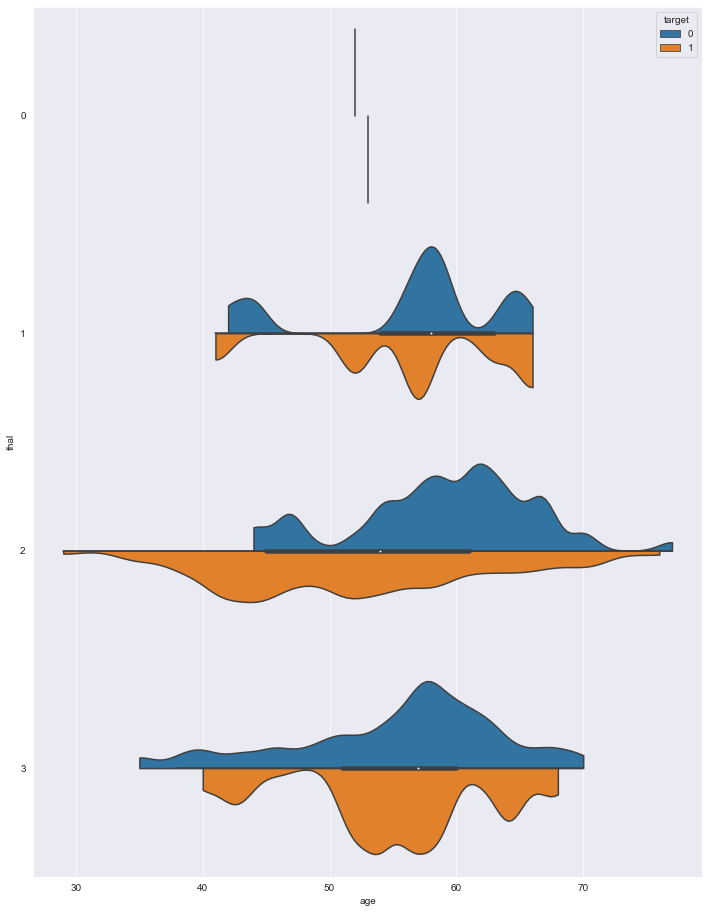

trestbps


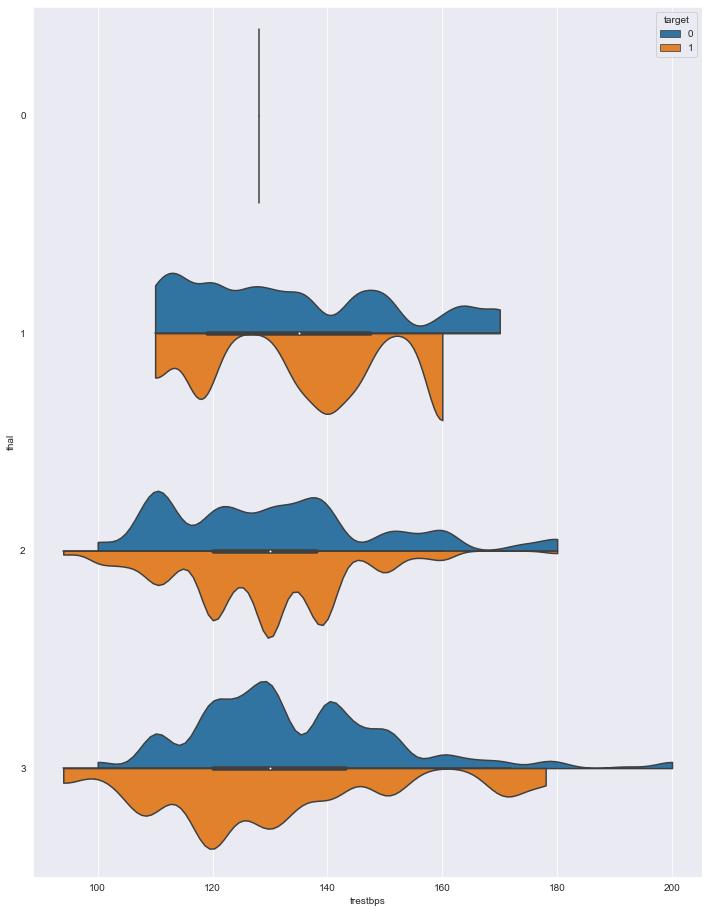

chol


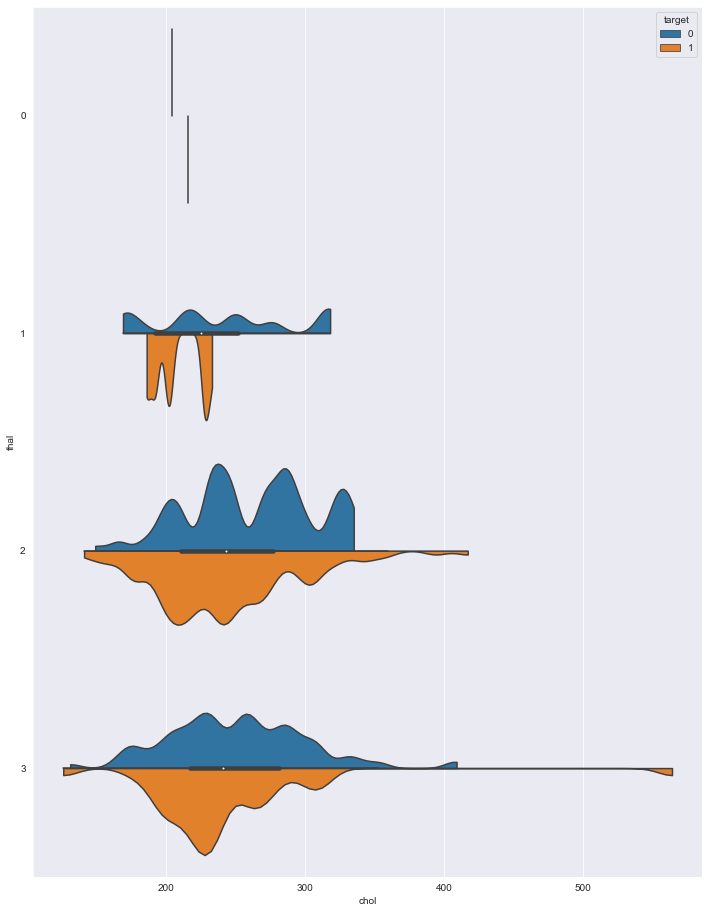

thalach


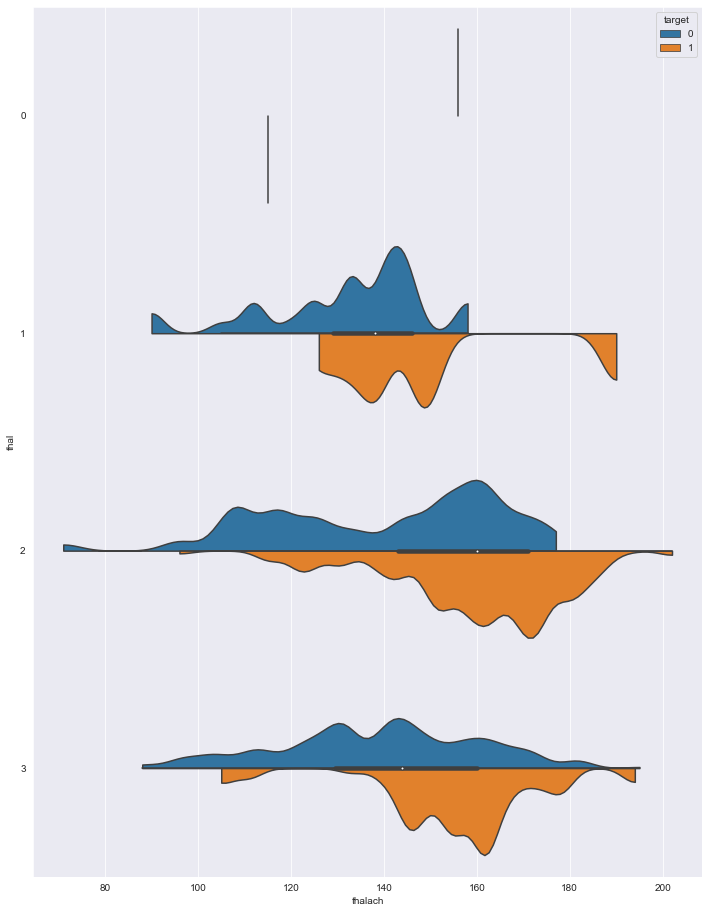

oldpeak


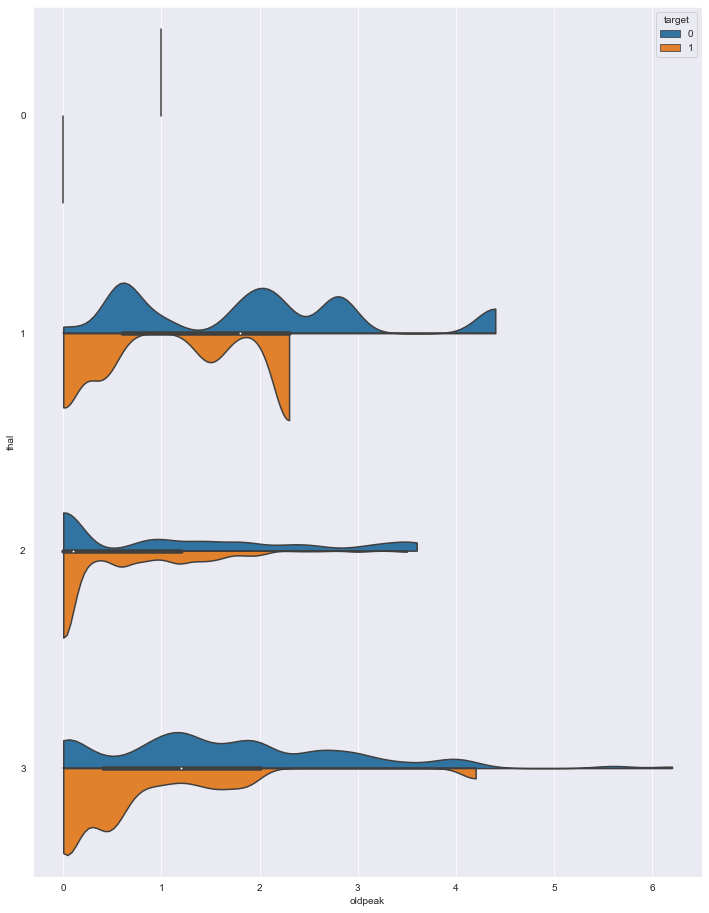

In [392]:
for col in continuous_features:
    print(col)
    plt.figure(figsize = (12,16))
    sns.violinplot(data=train_df, x=col, y="thal", hue="target", split=True,orient='h', bw=.15,cut=0)
    plt.xlabel(col)
    plt.ylabel('thal')
    plt.show()

In [393]:
numerical_features

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [394]:
categorical_features

Index([], dtype='object')

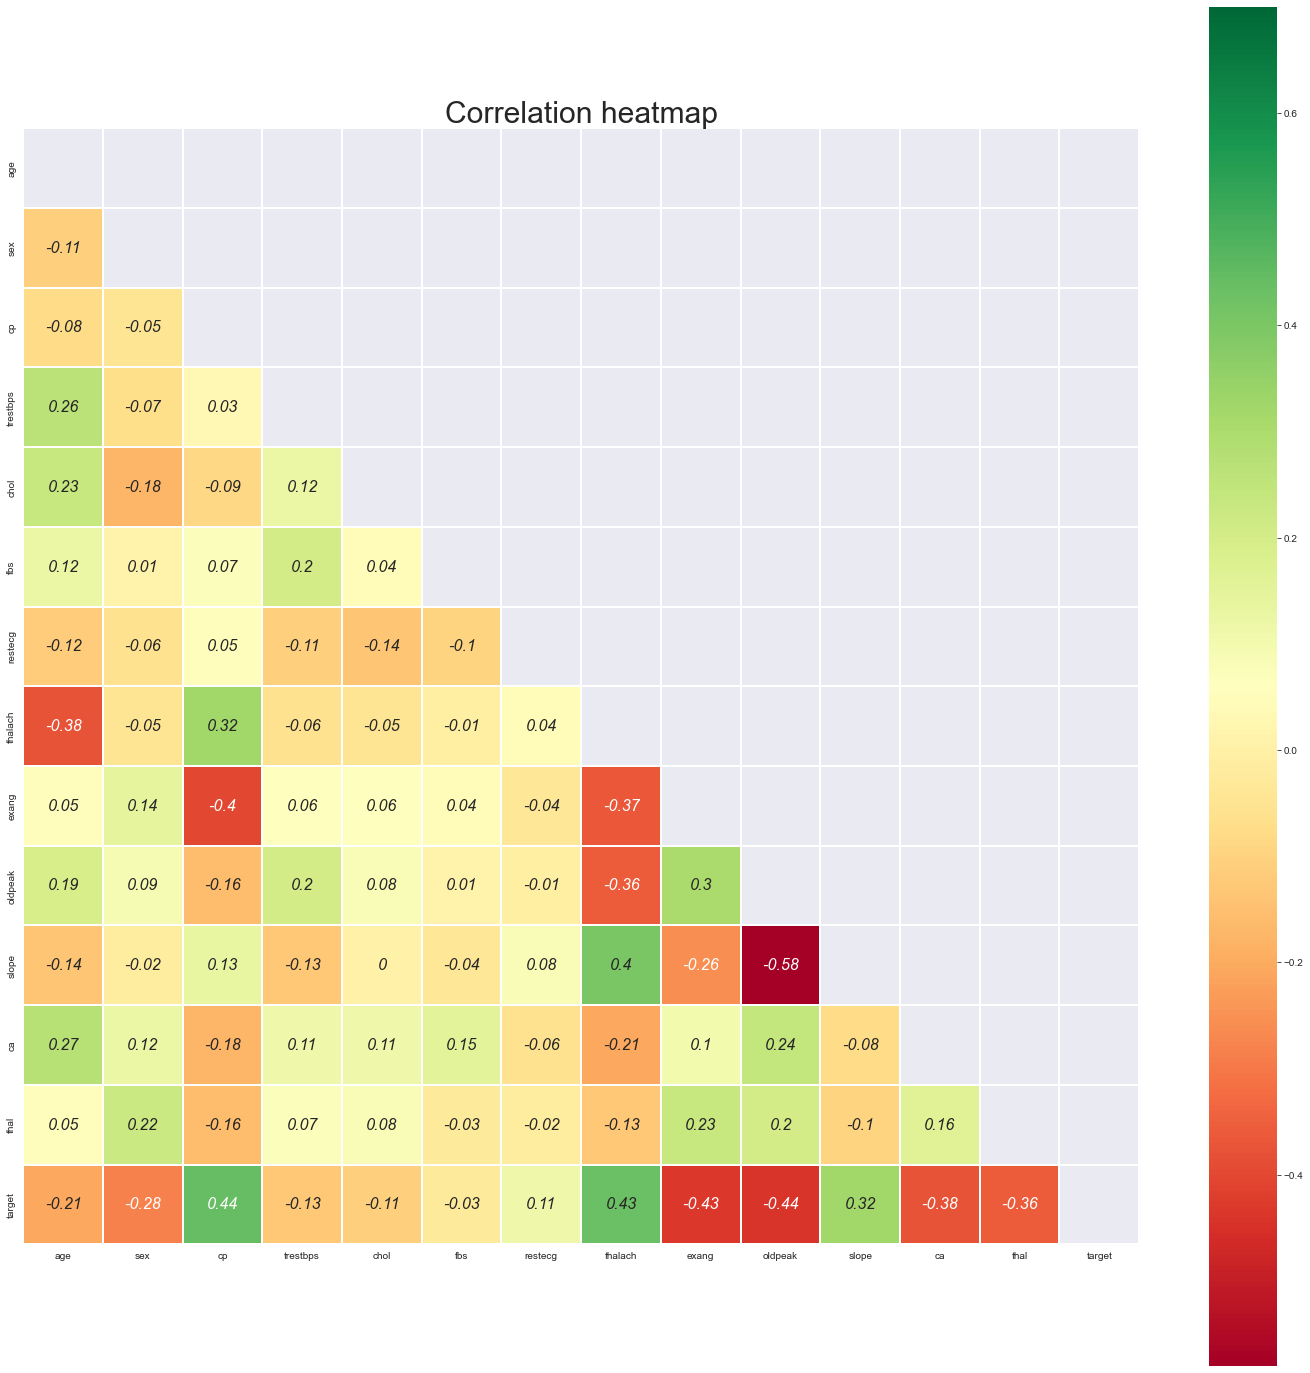

In [395]:
# Finds correlation between Independent and dependent attributes

mask = np.zeros_like(train_df[numerical_features].corr(),dtype = np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (25,25))
plt.title('Correlation heatmap', fontsize = 30)

sns.heatmap(np.round_(train_df[numerical_features].corr(),decimals=2),cmap='RdYlGn',linewidths=0.25,square=True,annot=True,
            vmax=0.7,linecolor='w',annot_kws={'size':16,'style':'oblique'},mask=mask)

plt.show()

### Observation :

1. We can see there is positive correlation between ['cp','restecg','slope'] and 'target'

### Multicollinearity

2. there is also Multicollinearity

#### We need to be very careful with this Multicollinearity when using 'Linear ML Models'

## Categorical_features

In [396]:
# No categorical features

In [397]:
train_df.niiofbid()

AttributeError: 'DataFrame' object has no attribute 'niiofbid'

In [398]:
train_df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     62    0   0       138   294    1        1      106      0      1.9   
4     58    0   0       100   248    0        0      122      0      1.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
820   59    1   1       140   221    0        1      164      1      0.0   
821   60    1   0       125   258    0        0      141      1      2.8   
822   47    1   0       110   275    0        0      118      1      1.0   
823   50    0   0       110   254    0        0      159      0      0.0   
824   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   2     3       0  
1        0   0     3       0  
2        0   0     3       0  
3        1   3     2       0  
4        1   0     2       1  
..     ...  ..   ...     ...  
820      2   0     2       1  
821      1   1     3       0  
822      1   1     2       0  
823      2   0     2       1  
824      1   1     3       0  

[825 rows x 14 columns]

In [399]:
val_df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    61    1   2       150   243    1        1      137      1      1.0   
1    64    0   0       180   325    0        1      154      1      0.0   
2    51    1   2       125   245    1        0      166      0      2.4   
3    63    1   0       140   187    0        0      144      1      4.0   
4    49    1   2       118   149    0        0      126      0      0.8   
..  ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
95   44    1   1       120   220    0        1      170      0      0.0   
96   63    0   2       135   252    0        0      172      0      0.0   
97   60    1   0       125   258    0        0      141      1      2.8   
98   66    0   2       146   278    0        0      152      0      0.0   
99   57    1   2       150   168    0        1      174      0      1.6   

    slope  ca  thal  target  
0       1   0     2       1  
1       2   0     2       1  
2       1   0     2       1  
3       2   2     3       0  
4       2   3     2       0  
..    ...  ..   ...     ...  
95      2   0     2       1  
96      2   0     2       1  
97      1   1     3       0  
98      1   1     2       1  
99      2   0     2       1  

[100 rows x 14 columns]

In [400]:
test_df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    59    1   2       150   212    1        1      157      0      1.6   
1    67    1   2       152   212    0        0      150      0      0.8   
2    57    1   0       110   201    0        1      126      1      1.5   
3    63    0   0       150   407    0        0      154      0      4.0   
4    54    1   0       140   239    0        1      160      0      1.2   
..  ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
95   51    1   2       110   175    0        1      123      0      0.6   
96   34    0   1       118   210    0        1      192      0      0.7   
97   48    1   0       124   274    0        0      166      0      0.5   
98   58    0   0       170   225    1        0      146      1      2.8   
99   56    1   0       130   283    1        0      103      1      1.6   

    slope  ca  thal  target  
0       2   0     2       1  
1       1   0     3       0  
2       1   0     1       1  
3       1   3     3       0  
4       2   0     2       1  
..    ...  ..   ...     ...  
95      2   0     2       1  
96      2   0     2       1  
97      1   0     3       0  
98      1   2     1       0  
99      0   0     3       0  

[100 rows x 14 columns]

In [401]:
# writing the final df to a file

train_df.to_csv('../Data/Heart/train_df.csv',index=False)

In [402]:
# writing the final df to a file

val_df.to_csv('../Data/Heart/val_df.csv',index=False)

In [403]:
# writing the final df to a file

test_df.to_csv('../Data/Heart/test_df.csv',index=False)

# Feature Engineering

In [404]:
# Preprocessing imports
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer,QuantileTransformer,PowerTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler

# Models
from sklearn.linear_model import LogisticRegression,SGDClassifier,RidgeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB,CategoricalNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,IsolationForest,ExtraTreesClassifier,AdaBoostClassifier
from xgboost import XGBClassifier,XGBRFClassifier

# Cross-validation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Pipeline
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer,TransformedTargetRegressor

# Metrics
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,precision_recall_curve

from imblearn.over_sampling import SMOTE

# Visualize Pipeline
from sklearn import set_config

In [405]:
train_df = pd.read_csv('../Data/Heart/train_df.csv')
X_train = train_df.drop('target',axis=1)
y_train = train_df['target']

In [406]:
val_df = pd.read_csv('../Data/Heart/val_df.csv')
X_val = val_df.drop('target',axis=1)
y_val = val_df['target']

In [407]:
test_df = pd.read_csv('../Data/Heart/test_df.csv')
X_test = test_df.drop('target',axis=1)
y_test = test_df['target']

In [408]:
train_df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     62    0   0       138   294    1        1      106      0      1.9   
4     58    0   0       100   248    0        0      122      0      1.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
820   59    1   1       140   221    0        1      164      1      0.0   
821   60    1   0       125   258    0        0      141      1      2.8   
822   47    1   0       110   275    0        0      118      1      1.0   
823   50    0   0       110   254    0        0      159      0      0.0   
824   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   2     3       0  
1        0   0     3       0  
2        0   0     3       0  
3        1   3     2       0  
4        1   0     2       1  
..     ...  ..   ...     ...  
820      2   0     2       1  
821      1   1     3       0  
822      1   1     2       0  
823      2   0     2       1  
824      1   1     3       0  

[825 rows x 14 columns]

In [409]:
val_df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    61    1   2       150   243    1        1      137      1      1.0   
1    64    0   0       180   325    0        1      154      1      0.0   
2    51    1   2       125   245    1        0      166      0      2.4   
3    63    1   0       140   187    0        0      144      1      4.0   
4    49    1   2       118   149    0        0      126      0      0.8   
..  ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
95   44    1   1       120   220    0        1      170      0      0.0   
96   63    0   2       135   252    0        0      172      0      0.0   
97   60    1   0       125   258    0        0      141      1      2.8   
98   66    0   2       146   278    0        0      152      0      0.0   
99   57    1   2       150   168    0        1      174      0      1.6   

    slope  ca  thal  target  
0       1   0     2       1  
1       2   0     2       1  
2       1   0     2       1  
3       2   2     3       0  
4       2   3     2       0  
..    ...  ..   ...     ...  
95      2   0     2       1  
96      2   0     2       1  
97      1   1     3       0  
98      1   1     2       1  
99      2   0     2       1  

[100 rows x 14 columns]

In [410]:
test_df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    59    1   2       150   212    1        1      157      0      1.6   
1    67    1   2       152   212    0        0      150      0      0.8   
2    57    1   0       110   201    0        1      126      1      1.5   
3    63    0   0       150   407    0        0      154      0      4.0   
4    54    1   0       140   239    0        1      160      0      1.2   
..  ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
95   51    1   2       110   175    0        1      123      0      0.6   
96   34    0   1       118   210    0        1      192      0      0.7   
97   48    1   0       124   274    0        0      166      0      0.5   
98   58    0   0       170   225    1        0      146      1      2.8   
99   56    1   0       130   283    1        0      103      1      1.6   

    slope  ca  thal  target  
0       2   0     2       1  
1       1   0     3       0  
2       1   0     1       1  
3       1   3     3       0  
4       2   0     2       1  
..    ...  ..   ...     ...  
95      2   0     2       1  
96      2   0     2       1  
97      1   0     3       0  
98      1   2     1       0  
99      0   0     3       0  

[100 rows x 14 columns]

In [411]:
train_df['target'].value_counts(normalize=True)

1    0.509091
0    0.490909
Name: target, dtype: float64

In [412]:
numerical_features

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [413]:
numerical_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                      'exang', 'oldpeak', 'slope', 'ca', 'thal']
numerical_features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [414]:
len(numerical_features)

13

In [415]:
len(categorical_features)

0

### Building preprocessing pipeline

In [416]:
numerical_features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [417]:
categorical_features

Index([], dtype='object')

In [418]:
numeric_processor=Pipeline([("imputation_mean",SimpleImputer(strategy='median',add_indicator=True)),
                           ("quantiletransformer",QuantileTransformer(output_distribution='normal'))])

categorical_processor=Pipeline([("imputation_consatnt",SimpleImputer(fill_value="missing",strategy="constant")),
                                ("onehotencoder",OneHotEncoder(handle_unknown='ignore',sparse_output=False,min_frequency=0.01,max_categories=15))])

preprocessor=ColumnTransformer([("numeric_processor",numeric_processor,numerical_features),
                               ("categorical_processor",categorical_processor,categorical_features)])

final_pipe=Pipeline([("preprocessor",preprocessor),
                     ("scaler",RobustScaler())])

In [419]:
final_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_processor',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('quantiletransformer',
                                                                   QuantileTransformer(output_distribution='normal'))]),
                                                  ['age', 'sex', 'cp',
                                                   'trestbps', 'chol', 'fbs',
                                                   'restecg', 'thalach',
                                                   'exang', 'oldpeak', 'slope',
                                                   'ca', 'thal']),
                                                 ('categorical_processor',
                                                  Pipeline(steps=[('imputation_consatnt',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 max_categories=15,
                                                                                 min_frequency=0.01,
                                                                                 sparse_output=False))]),
                                                  Index([], dtype='object'))])),
                ('scaler', RobustScaler())])

In [420]:
X_train

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     62    0   0       138   294    1        1      106      0      1.9   
4     58    0   0       100   248    0        0      122      0      1.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
820   59    1   1       140   221    0        1      164      1      0.0   
821   60    1   0       125   258    0        0      141      1      2.8   
822   47    1   0       110   275    0        0      118      1      1.0   
823   50    0   0       110   254    0        0      159      0      0.0   
824   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  
0        2   2     3  
1        0   0     3  
2        0   0     3  
3        1   3     2  
4        1   0     2  
..     ...  ..   ...  
820      2   0     2  
821      1   1     3  
822      1   1     2  
823      2   0     2  
824      1   1     3  

[825 rows x 13 columns]

In [421]:
y_train

0      0
1      0
2      0
3      0
4      1
      ..
820    1
821    0
822    0
823    1
824    0
Name: target, Length: 825, dtype: int64

In [422]:
X_train_FE = pd.DataFrame(final_pipe.fit_transform(X_train),columns=final_pipe.get_feature_names_out(X_train.columns))

In [423]:
X_train_FE

numeric_processor__age  numeric_processor__sex  numeric_processor__cp  \
0                 -0.283862                     0.0              -0.896231   
1                 -0.217096                     0.0              -0.896231   
2                  1.430643                     0.0              -0.896231   
3                  0.583935                    -1.0              -0.896231   
4                  0.220071                    -1.0              -0.896231   
..                      ...                     ...                    ...   
820                0.339719                     0.0               0.000000   
821                0.429279                     0.0              -0.896231   
822               -0.549095                     0.0              -0.896231   
823               -0.427336                    -1.0              -0.896231   
824               -0.147251                     0.0              -0.896231   

     numeric_processor__trestbps  numeric_processor__chol  \
0                      -0.264049                -0.465732   
1                       0.477643                -0.679410   
2                       0.677871                -1.259372   
3                       0.310486                 0.689245   
4                      -1.668781                 0.111275   
..                           ...                      ...   
820                     0.477643                -0.324735   
821                    -0.264049                 0.241686   
822                    -1.020079                 0.471720   
823                    -1.020079                 0.178667   
824                    -0.522357                -0.943939   

     numeric_processor__fbs  numeric_processor__restecg  \
0                  0.000000                         0.0   
1                 10.398675                        -1.0   
2                  0.000000                         0.0   
3                 10.398675                         0.0   
4                  0.000000                        -1.0   
..                      ...                         ...   
820                0.000000                         0.0   
821                0.000000                        -1.0   
822                0.000000                        -1.0   
823                0.000000                        -1.0   
824                0.000000                         0.0   

     numeric_processor__thalach  numeric_processor__exang  \
0                      0.559925                       0.0   
1                      0.084381                       1.0   
2                     -0.710590                       1.0   
3                     -1.241721                       0.0   
4                     -0.801807                       0.0   
..                          ...                       ...   
820                    0.465668                       1.0   
821                   -0.337059                       1.0   
822                   -0.879222                       1.0   
823                    0.217501                       0.0   
824                   -1.035545                       0.0   

     numeric_processor__oldpeak  numeric_processor__slope  \
0                      0.024241                  1.000000   
1                      0.249574                 -0.822073   
2                      0.200528                 -0.822073   
3                      0.135422                  0.000000   
4                      0.024241                  0.000000   
..                          ...                       ...   
820                   -0.880152                  1.000000   
821                    0.217453                  0.000000   
822                    0.024241                  0.000000   
823                   -0.880152                  1.000000   
824                    0.076485                  0.000000   

     numeric_processor__ca  numeric_processor__thal  
0                 1.104281                      1.0  
1                 0.000000                      1.0 

In [424]:
y_train.value_counts()

1    420
0    405
Name: target, dtype: int64

In [425]:
X_val

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    61    1   2       150   243    1        1      137      1      1.0   
1    64    0   0       180   325    0        1      154      1      0.0   
2    51    1   2       125   245    1        0      166      0      2.4   
3    63    1   0       140   187    0        0      144      1      4.0   
4    49    1   2       118   149    0        0      126      0      0.8   
..  ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
95   44    1   1       120   220    0        1      170      0      0.0   
96   63    0   2       135   252    0        0      172      0      0.0   
97   60    1   0       125   258    0        0      141      1      2.8   
98   66    0   2       146   278    0        0      152      0      0.0   
99   57    1   2       150   168    0        1      174      0      1.6   

    slope  ca  thal  
0       1   0     2  
1       2   0     2  
2       1   0     2  
3       2   2     3  
4       2   3     2  
..    ...  ..   ...  
95      2   0     2  
96      2   0     2  
97      1   1     3  
98      1   1     2  
99      2   0     2  

[100 rows x 13 columns]

In [426]:
y_val

0     1
1     1
2     1
3     0
4     0
     ..
95    1
96    1
97    0
98    1
99    1
Name: target, Length: 100, dtype: int64

In [427]:
X_val_FE = pd.DataFrame(final_pipe.transform(X_val),columns=final_pipe.get_feature_names_out(X_val.columns))

In [428]:
X_val_FE

numeric_processor__age  numeric_processor__sex  numeric_processor__cp  \
0                 0.499443                     0.0               0.103769   
1                 0.774258                    -1.0              -0.896231   
2                -0.366666                     0.0               0.103769   
3                 0.680490                     0.0              -0.896231   
4                -0.462060                     0.0               0.103769   
..                     ...                     ...                    ...   
95               -0.753845                     0.0               0.000000   
96                0.680490                    -1.0               0.103769   
97                0.429279                     0.0              -0.896231   
98                0.963229                    -1.0               0.103769   
99                0.091354                     0.0               0.103769   

    numeric_processor__trestbps  numeric_processor__chol  \
0                      0.824709                 0.036963   
1                      1.741269                 1.113807   
2                     -0.264049                 0.076275   
3                      0.477643                -0.956796   
4                     -0.705755                -1.673844   
..                          ...                      ...   
95                    -0.522357                -0.344585   
96                     0.223427                 0.152247   
97                    -0.264049                 0.241686   
98                     0.712433                 0.510933   
99                     0.824709                -1.362838   

    numeric_processor__fbs  numeric_processor__restecg  \
0                10.398675                         0.0   
1                 0.000000                         0.0   
2                10.398675                        -1.0   
3                 0.000000                        -1.0   
4                 0.000000                        -1.0   
..                     ...                         ...   
95                0.000000                         0.0   
96                0.000000                        -1.0   
97                0.000000                        -1.0   
98                0.000000                        -1.0   
99                0.000000                         0.0   

    numeric_processor__thalach  numeric_processor__exang  \
0                    -0.435022                       1.0   
1                     0.058440                       1.0   
2                     0.526115                       0.0   
3                    -0.228181                       1.0   
4                    -0.658729                       0.0   
..                         ...                       ...   
95                    0.662650                       0.0   
96                    0.757001                       0.0   
97                   -0.337059                       1.0   
98                    0.000000                       0.0   
99                    0.904768                       0.0   

    numeric_processor__oldpeak  numeric_processor__slope  \
0                     0.024241                       0.0   
1                    -0.880152                       1.0   
2                     0.182591                       0.0   
3                     0.333696                       1.0   
4                     0.000000                       1.0   
..                         ...                       ...   
95                   -0.880152                       1.0   
96                   -0.880152                       1.0   
97                    0.217453                       0.0   
98                   -0.880152                       0.0   
99                    0.101500                       1.0   

    numeric_processor__ca  numeric_processor__thal  
0                0.000000                      0.0  
1                0.000000                      0.0  
2                0.000000                      0.0  
3      

In [429]:
X_test

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    59    1   2       150   212    1        1      157      0      1.6   
1    67    1   2       152   212    0        0      150      0      0.8   
2    57    1   0       110   201    0        1      126      1      1.5   
3    63    0   0       150   407    0        0      154      0      4.0   
4    54    1   0       140   239    0        1      160      0      1.2   
..  ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
95   51    1   2       110   175    0        1      123      0      0.6   
96   34    0   1       118   210    0        1      192      0      0.7   
97   48    1   0       124   274    0        0      166      0      0.5   
98   58    0   0       170   225    1        0      146      1      2.8   
99   56    1   0       130   283    1        0      103      1      1.6   

    slope  ca  thal  
0       2   0     2  
1       1   0     3  
2       1   0     1  
3       1   3     3  
4       2   0     2  
..    ...  ..   ...  
95      2   0     2  
96      2   0     2  
97      1   0     3  
98      1   2     1  
99      0   0     3  

[100 rows x 13 columns]

In [430]:
y_test

0     1
1     0
2     1
3     0
4     1
     ..
95    1
96    1
97    0
98    0
99    0
Name: target, Length: 100, dtype: int64

In [431]:
X_test_FE = pd.DataFrame(final_pipe.transform(X_test),columns=final_pipe.get_feature_names_out(X_test.columns))

In [432]:
X_test_FE

numeric_processor__age  numeric_processor__sex  numeric_processor__cp  \
0                 0.339719                     0.0               0.103769   
1                 1.087117                     0.0               0.103769   
2                 0.091354                     0.0              -0.896231   
3                 0.680490                    -1.0              -0.896231   
4                -0.147251                     0.0              -0.896231   
..                     ...                     ...                    ...   
95               -0.366666                     0.0               0.103769   
96               -1.953198                    -1.0               0.000000   
97               -0.500557                     0.0              -0.896231   
98                0.220071                    -1.0              -0.896231   
99                0.000000                     0.0              -0.896231   

    numeric_processor__trestbps  numeric_processor__chol  \
0                      0.824709                -0.465732   
1                      0.954391                -0.465732   
2                     -1.020079                -0.703747   
3                      0.824709                 1.737099   
4                      0.477643                -0.027996   
..                          ...                      ...   
95                    -1.020079                -1.204992   
96                    -0.705755                -0.520327   
97                    -0.321590                 0.451259   
98                     1.359566                -0.265309   
99                     0.000000                 0.563605   

    numeric_processor__fbs  numeric_processor__restecg  \
0                10.398675                         0.0   
1                 0.000000                        -1.0   
2                 0.000000                         0.0   
3                 0.000000                        -1.0   
4                 0.000000                         0.0   
..                     ...                         ...   
95                0.000000                         0.0   
96                0.000000                         0.0   
97                0.000000                        -1.0   
98               10.398675                        -1.0   
99               10.398675                        -1.0   

    numeric_processor__thalach  numeric_processor__exang  \
0                     0.153772                       0.0   
1                    -0.075360                       0.0   
2                    -0.658729                       1.0   
3                     0.058440                       0.0   
4                     0.257688                       0.0   
..                         ...                       ...   
95                   -0.768156                       0.0   
96                    1.763019                       0.0   
97                    0.526115                       0.0   
98                   -0.165318                       1.0   
99                   -1.383510                       1.0   

    numeric_processor__oldpeak  numeric_processor__slope  \
0                     0.101500                  1.000000   
1                     0.000000                  0.000000   
2                     0.089933                  0.000000   
3                     0.333696                  0.000000   
4                     0.051484                  1.000000   
..                         ...                       ...   
95                   -0.020049                  1.000000   
96                   -0.009498                  1.000000   
97                   -0.034056                  0.000000   
98                    0.217453                  0.000000   
99                    0.101500                 -0.822073   

    numeric_processor__ca  numeric_processor__thal  
0                0.000000                 0.000000  
1                0.000000                 1.000000  
2                0.000000                -0.240794  
3      

### writing the final df to a file

train_df.to_csv('../Data/Heart/Feature Engineered Data/X_train_FE.csv',index=False)
val_df.to_csv('../Data/Heart/Feature Engineered Data/X_val_FE.csv',index=False)
test_df.to_csv('../Data/Heart/Feature Engineered Data/X_test_FE.csv',index=False)

In [433]:
models = [['LogisticRegression',LogisticRegression()],
         ['RidgeClassifier', RidgeClassifier()],
         ['SGDClassifier',SGDClassifier()],
         ['SVC',SVC()],
         ['GaussianNB',GaussianNB()],
         ['KNeighborsClassifier', KNeighborsClassifier()],
         ['DecisionTreeClassifier',DecisionTreeClassifier()],
         ['RandomForestClassifier', RandomForestClassifier()],
         ['AdaBoostClassifier',AdaBoostClassifier()],
         ['ExtraTreesClassifier',ExtraTreesClassifier()],
         ['GradientBoostingClassifier',GradientBoostingClassifier()],
         ['XGBClassifier', XGBClassifier()]]

In [434]:
results = pd.DataFrame(index=None, columns=['Model','cv_results','Train_Accuracy','Precision','Recall','F1_score','Val_Accuracy'])

for mod in models:
    name = mod[0]
    model = mod[1]
    cv_results = cross_val_score(model, X_train_FE, y_train, cv=3, scoring='f1_macro',n_jobs=-1).mean()
    model.fit(X_train_FE,y_train)
    y_train_pred = model.predict(X_train_FE)
    train_score = accuracy_score(y_train,y_train_pred)
    
    precision = precision_score(y_train,y_train_pred,average='macro')
    recall = recall_score(y_train,y_train_pred,average='macro')
    f1 = f1_score(y_train,y_train_pred,average='macro')
    
    print(name)
    print(classification_report(y_train,y_train_pred))
    
    y_val_pred = model.predict(X_val_FE)
    val_score = accuracy_score(y_val,y_val_pred)
    
    print('train_score : ',train_score)
    print('val_score : ',val_score)
            
    results = results.append(pd.Series({'Model':name,'cv_results':cv_results,'Train_Accuracy':train_score,'Precision':precision,'Recall':recall,'F1_score':f1,'Val_Accuracy':val_score}),ignore_index=True )

LogisticRegression
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       405
           1       0.83      0.88      0.85       420

    accuracy                           0.85       825
   macro avg       0.85      0.85      0.85       825
weighted avg       0.85      0.85      0.85       825

train_score :  0.8472727272727273
val_score :  0.78
RidgeClassifier
              precision    recall  f1-score   support

           0       0.89      0.80      0.85       405
           1       0.83      0.90      0.86       420

    accuracy                           0.86       825
   macro avg       0.86      0.85      0.86       825
weighted avg       0.86      0.86      0.86       825

train_score :  0.8557575757575757
val_score :  0.78
SGDClassifier
              precision    recall  f1-score   support

           0       0.71      0.88      0.78       405
           1       0.85      0.65      0.73       420

    accuracy                 

In [435]:
results.style.highlight_max(color = 'lightgreen', axis = 0)

In [436]:
results.sort_values(by=['cv_results'],ascending=False)

Model cv_results Train_Accuracy Precision    Recall  \
7       RandomForestClassifier   0.961185            1.0       1.0       1.0   
11               XGBClassifier   0.961176            1.0       1.0       1.0   
6       DecisionTreeClassifier   0.959937            1.0       1.0       1.0   
9         ExtraTreesClassifier   0.955116            1.0       1.0       1.0   
10  GradientBoostingClassifier    0.93933       0.991515  0.991602  0.991446   
8           AdaBoostClassifier   0.873933       0.922424  0.922436  0.922575   
3                          SVC   0.850387        0.86303  0.866313  0.862169   
1              RidgeClassifier    0.84559       0.855758  0.859299   0.85485   
0           LogisticRegression   0.834914       0.847273  0.849076  0.846605   
5         KNeighborsClassifier   0.834835       0.963636  0.963836  0.963492   
4                   GaussianNB   0.831354       0.829091  0.829118  0.828924   
2                SGDClassifier   0.750872       0.761212  0.776186  0.763272   

    F1_score Val_Accuracy  
7        1.0          1.0  
11       1.0          1.0  
6        1.0          1.0  
9        1.0          1.0  
10  0.991511         0.94  
8   0.922419         0.88  
3   0.862484         0.83  
1   0.855137         0.78  
0   0.846857         0.78  
5   0.963613         0.86  
4    0.82899         0.78  
2    0.75883         0.74

In [437]:
results.sort_values(by=['Val_Accuracy'],ascending=False)

Model cv_results Train_Accuracy Precision    Recall  \
6       DecisionTreeClassifier   0.959937            1.0       1.0       1.0   
7       RandomForestClassifier   0.961185            1.0       1.0       1.0   
9         ExtraTreesClassifier   0.955116            1.0       1.0       1.0   
11               XGBClassifier   0.961176            1.0       1.0       1.0   
10  GradientBoostingClassifier    0.93933       0.991515  0.991602  0.991446   
8           AdaBoostClassifier   0.873933       0.922424  0.922436  0.922575   
5         KNeighborsClassifier   0.834835       0.963636  0.963836  0.963492   
3                          SVC   0.850387        0.86303  0.866313  0.862169   
0           LogisticRegression   0.834914       0.847273  0.849076  0.846605   
1              RidgeClassifier    0.84559       0.855758  0.859299   0.85485   
4                   GaussianNB   0.831354       0.829091  0.829118  0.828924   
2                SGDClassifier   0.750872       0.761212  0.776186  0.763272   

    F1_score Val_Accuracy  
6        1.0          1.0  
7        1.0          1.0  
9        1.0          1.0  
11       1.0          1.0  
10  0.991511         0.94  
8   0.922419         0.88  
5   0.963613         0.86  
3   0.862484         0.83  
0   0.846857         0.78  
1   0.855137         0.78  
4    0.82899         0.78  
2    0.75883         0.74

In [438]:
# writing results to a file

results.to_csv('../Data/Heart/results.csv',index=False)

## Handling Imbalanced dataset

In [439]:
# The dataset is balanced

In [440]:
y_train.value_counts(normalize=True)

1    0.509091
0    0.490909
Name: target, dtype: float64

## Hyperparameter Tuning

In [441]:
# The RandomForest model is giving good results with default parameters. so we will keep it that way for now.

## Feature Importance

In [442]:
X_train_FE

numeric_processor__age  numeric_processor__sex  numeric_processor__cp  \
0                 -0.283862                     0.0              -0.896231   
1                 -0.217096                     0.0              -0.896231   
2                  1.430643                     0.0              -0.896231   
3                  0.583935                    -1.0              -0.896231   
4                  0.220071                    -1.0              -0.896231   
..                      ...                     ...                    ...   
820                0.339719                     0.0               0.000000   
821                0.429279                     0.0              -0.896231   
822               -0.549095                     0.0              -0.896231   
823               -0.427336                    -1.0              -0.896231   
824               -0.147251                     0.0              -0.896231   

     numeric_processor__trestbps  numeric_processor__chol  \
0                      -0.264049                -0.465732   
1                       0.477643                -0.679410   
2                       0.677871                -1.259372   
3                       0.310486                 0.689245   
4                      -1.668781                 0.111275   
..                           ...                      ...   
820                     0.477643                -0.324735   
821                    -0.264049                 0.241686   
822                    -1.020079                 0.471720   
823                    -1.020079                 0.178667   
824                    -0.522357                -0.943939   

     numeric_processor__fbs  numeric_processor__restecg  \
0                  0.000000                         0.0   
1                 10.398675                        -1.0   
2                  0.000000                         0.0   
3                 10.398675                         0.0   
4                  0.000000                        -1.0   
..                      ...                         ...   
820                0.000000                         0.0   
821                0.000000                        -1.0   
822                0.000000                        -1.0   
823                0.000000                        -1.0   
824                0.000000                         0.0   

     numeric_processor__thalach  numeric_processor__exang  \
0                      0.559925                       0.0   
1                      0.084381                       1.0   
2                     -0.710590                       1.0   
3                     -1.241721                       0.0   
4                     -0.801807                       0.0   
..                          ...                       ...   
820                    0.465668                       1.0   
821                   -0.337059                       1.0   
822                   -0.879222                       1.0   
823                    0.217501                       0.0   
824                   -1.035545                       0.0   

     numeric_processor__oldpeak  numeric_processor__slope  \
0                      0.024241                  1.000000   
1                      0.249574                 -0.822073   
2                      0.200528                 -0.822073   
3                      0.135422                  0.000000   
4                      0.024241                  0.000000   
..                          ...                       ...   
820                   -0.880152                  1.000000   
821                    0.217453                  0.000000   
822                    0.024241                  0.000000   
823                   -0.880152                  1.000000   
824                    0.076485                  0.000000   

     numeric_processor__ca  numeric_processor__thal  
0                 1.104281                      1.0  
1                 0.000000                      1.0 

In [443]:
y_train

0      0
1      0
2      0
3      0
4      1
      ..
820    1
821    0
822    0
823    1
824    0
Name: target, Length: 825, dtype: int64

#### Here we are using RandomForestClassifier to get the feature importance values we can use model which have the feature_importance_ attribute. All model more or less gives the similar results

In [444]:
rf = RandomForestClassifier()
rf.fit(X_train_FE,y_train)

RandomForestClassifier()

In [445]:
rf.feature_importances_

array([0.09491208, 0.02830015, 0.14399938, 0.06826154, 0.07928705,
       0.00932292, 0.02077983, 0.11215516, 0.05149826, 0.1200212 ,
       0.04034251, 0.12827704, 0.10284286])

In [446]:
importances = pd.DataFrame(data={
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=True)

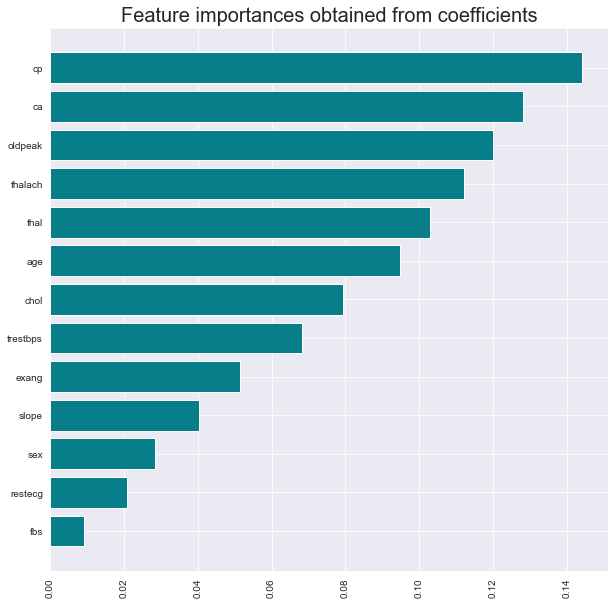

In [447]:
plt.figure(figsize = (10,10))
plt.barh(y=importances['Feature'], width=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [448]:
X_train_FE.nunique().sort_values(ascending=False)

numeric_processor__chol        152
numeric_processor__thalach      91
numeric_processor__trestbps     49
numeric_processor__age          41
numeric_processor__oldpeak      40
numeric_processor__ca            5
numeric_processor__cp            4
numeric_processor__thal          4
numeric_processor__restecg       3
numeric_processor__slope         3
numeric_processor__sex           2
numeric_processor__fbs           2
numeric_processor__exang         2
dtype: int64

## Feature Selection

### Techniques for feature selection
1. Mutual Information - to get the feature importance 
2. Multicollinearity - to check and remove any highly correlated independent features
3. VarianceThreshold - To check and remove any low varinace continuous features

## Multicollinearity

### Correlation

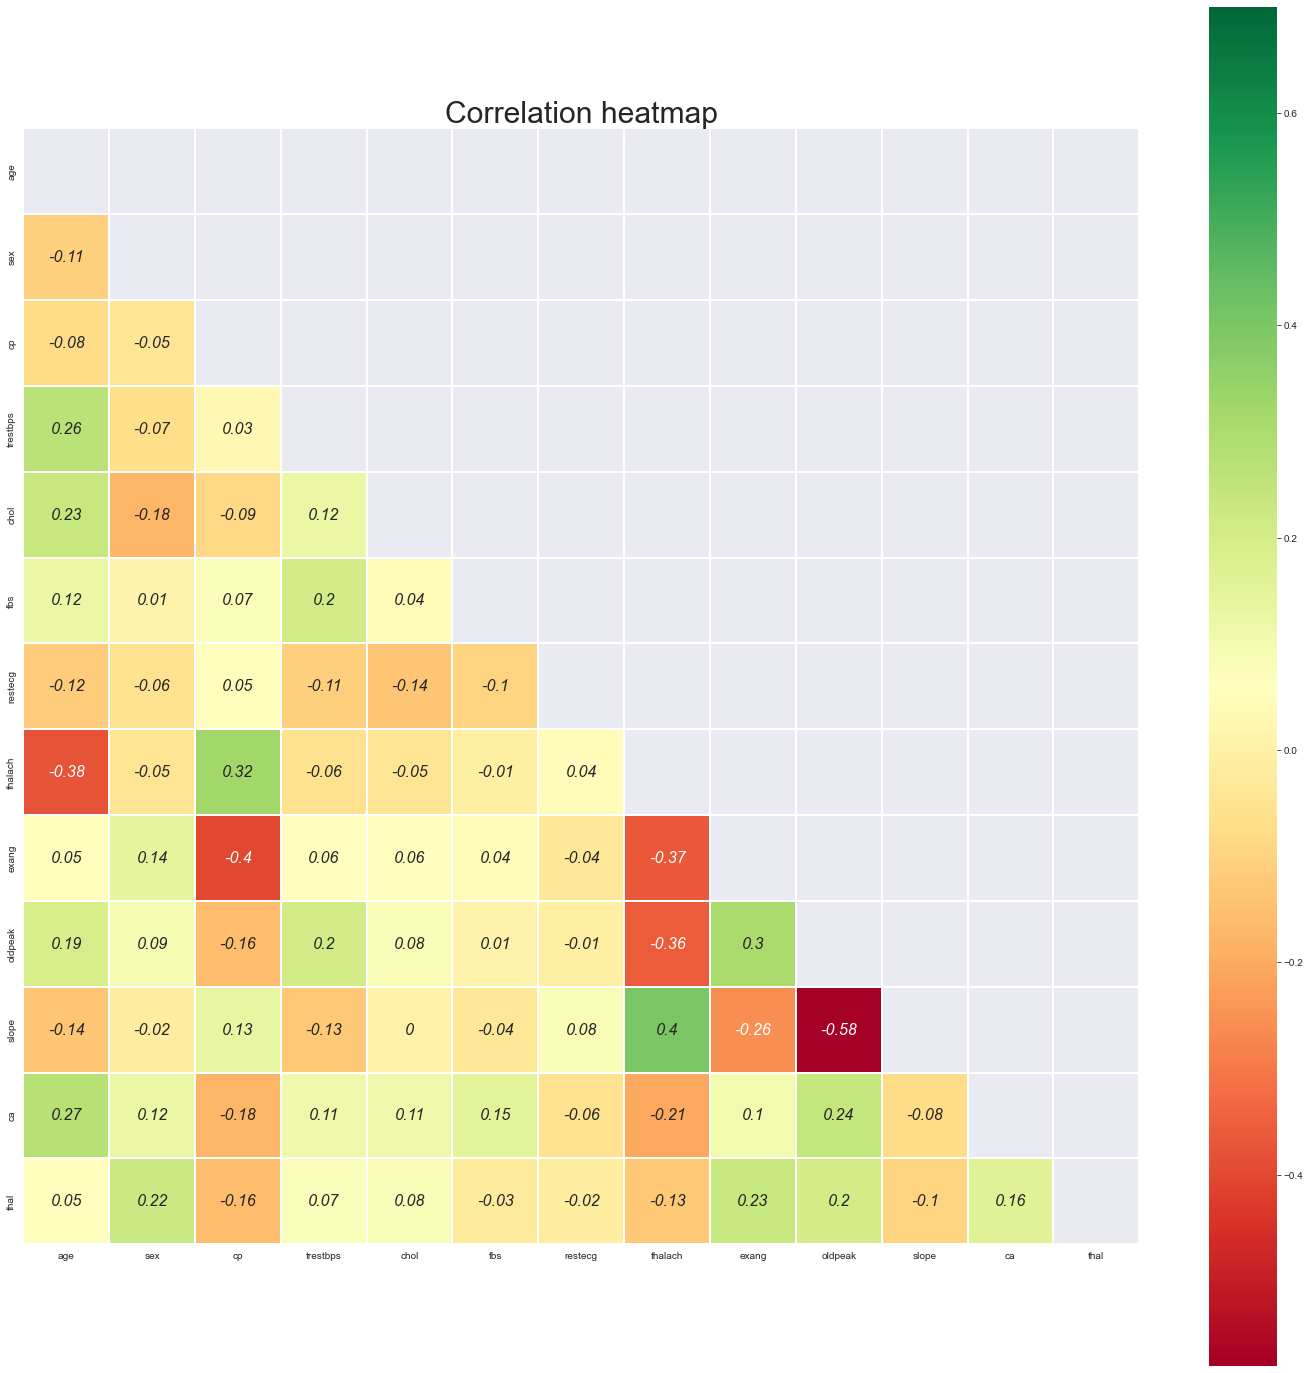

In [449]:
# Finds correlation between Independent and dependent attributes

mask = np.zeros_like(train_df[numerical_features].corr(),dtype = np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (25,25))
plt.title('Correlation heatmap', fontsize = 30)

sns.heatmap(np.round_(train_df[numerical_features].corr(),decimals=2),cmap='RdYlGn',linewidths=0.25,square=True,annot=True,
            vmax=0.7,linecolor='w',annot_kws={'size':16,'style':'oblique'},mask=mask)

plt.show()

In [450]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [451]:
corr_features = correlation(X_train_FE, 0.8)
print(len(set(corr_features)))
print(corr_features)

0
set()


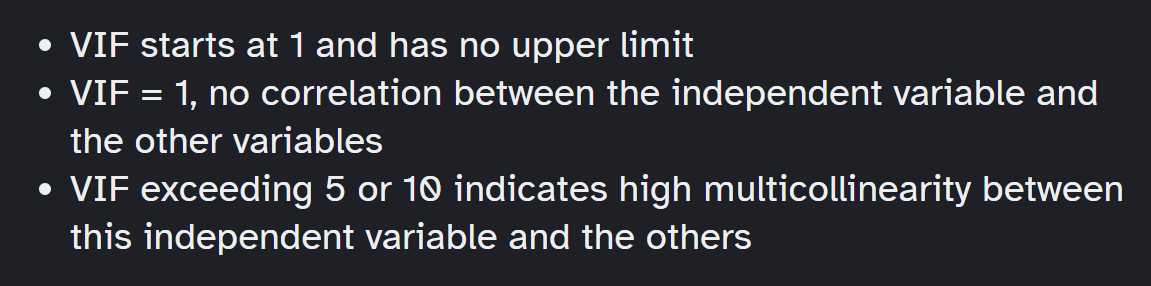

### Variance Inflation Factor (VIF)

https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

In [452]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_FE.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_FE.values, i) for i in range(len(X_train_FE.columns))]

vif_data = vif_data.sort_values(by='VIF', ascending=False)
vif_data

feature       VIF
10     numeric_processor__slope  2.174143
9    numeric_processor__oldpeak  2.075332
8      numeric_processor__exang  1.994362
11        numeric_processor__ca  1.942279
2         numeric_processor__cp  1.890037
12      numeric_processor__thal  1.757003
7    numeric_processor__thalach  1.694931
6    numeric_processor__restecg  1.613549
0        numeric_processor__age  1.455096
1        numeric_processor__sex  1.282461
5        numeric_processor__fbs  1.233526
3   numeric_processor__trestbps  1.133871
4       numeric_processor__chol  1.083035

###  From above we can see that VIF values of features are low only so we can conclude that there is no Multicollinearity

### VarianceThreshold

In [453]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [454]:
# In this technique we will find the varince of all the features and we can remove the features which have low variance 
# by setting the threshold parameter

from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold()
var_thres.fit(X_train_FE[['numeric_processor__age','numeric_processor__trestbps','numeric_processor__chol','numeric_processor__thalach','numeric_processor__oldpeak']])

VarianceThreshold()

In [455]:
variances = pd.DataFrame(data={
    'Feature': ['numeric_processor__age','numeric_processor__trestbps','numeric_processor__chol','numeric_processor__thalach','numeric_processor__oldpeak'],
    'variance': var_thres.variances_
})
variances = variances.sort_values(by='variance', ascending=True)

In [456]:
variances

Feature  variance
4   numeric_processor__oldpeak  0.215761
2      numeric_processor__chol  0.592839
3   numeric_processor__thalach  0.608316
0       numeric_processor__age  0.620913
1  numeric_processor__trestbps  0.704158

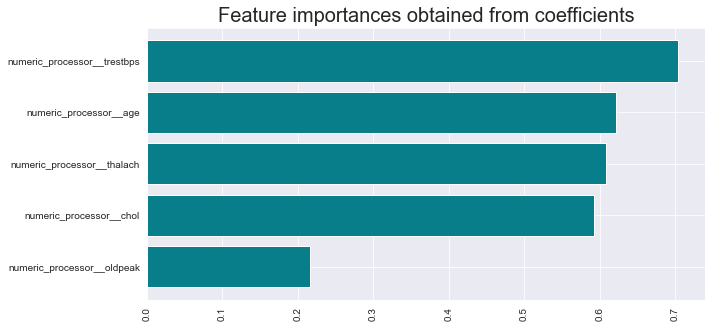

In [457]:
plt.figure(figsize = (10,5))
plt.barh(y=variances['Feature'], width=variances['variance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Mutual Information for Classification

In [458]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train_FE, y_train)
mutual_info

array([0.06493181, 0.03445804, 0.14780373, 0.05537326, 0.22990524,
       0.        , 0.01341167, 0.16590269, 0.11390623, 0.13863085,
       0.07054146, 0.15831395, 0.17853379])

In [459]:
mutual_info_df = pd.DataFrame(data={
    'Feature': X_train_FE.columns,
    'MI': mutual_info
})
mutual_info_df = mutual_info_df.sort_values(by='MI', ascending=True)

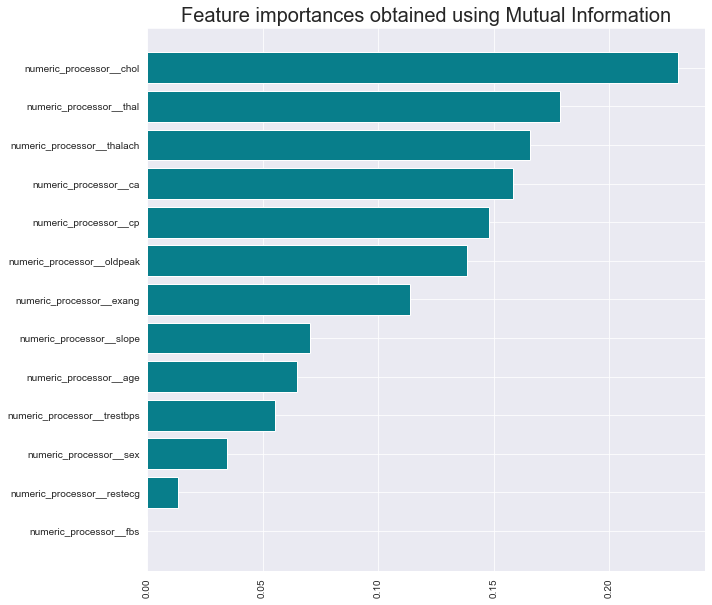

In [460]:
plt.figure(figsize = (10,10))
plt.barh(y=mutual_info_df['Feature'], width=mutual_info_df['MI'], color='#087E8B')
plt.title('Feature importances obtained using Mutual Information', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [461]:
mutual_info_df['Feature'].values[-5:]

array(['numeric_processor__cp', 'numeric_processor__ca',
       'numeric_processor__thalach', 'numeric_processor__thal',
       'numeric_processor__chol'], dtype=object)

In [462]:
X_train_FE

numeric_processor__age  numeric_processor__sex  numeric_processor__cp  \
0                 -0.283862                     0.0              -0.896231   
1                 -0.217096                     0.0              -0.896231   
2                  1.430643                     0.0              -0.896231   
3                  0.583935                    -1.0              -0.896231   
4                  0.220071                    -1.0              -0.896231   
..                      ...                     ...                    ...   
820                0.339719                     0.0               0.000000   
821                0.429279                     0.0              -0.896231   
822               -0.549095                     0.0              -0.896231   
823               -0.427336                    -1.0              -0.896231   
824               -0.147251                     0.0              -0.896231   

     numeric_processor__trestbps  numeric_processor__chol  \
0                      -0.264049                -0.465732   
1                       0.477643                -0.679410   
2                       0.677871                -1.259372   
3                       0.310486                 0.689245   
4                      -1.668781                 0.111275   
..                           ...                      ...   
820                     0.477643                -0.324735   
821                    -0.264049                 0.241686   
822                    -1.020079                 0.471720   
823                    -1.020079                 0.178667   
824                    -0.522357                -0.943939   

     numeric_processor__fbs  numeric_processor__restecg  \
0                  0.000000                         0.0   
1                 10.398675                        -1.0   
2                  0.000000                         0.0   
3                 10.398675                         0.0   
4                  0.000000                        -1.0   
..                      ...                         ...   
820                0.000000                         0.0   
821                0.000000                        -1.0   
822                0.000000                        -1.0   
823                0.000000                        -1.0   
824                0.000000                         0.0   

     numeric_processor__thalach  numeric_processor__exang  \
0                      0.559925                       0.0   
1                      0.084381                       1.0   
2                     -0.710590                       1.0   
3                     -1.241721                       0.0   
4                     -0.801807                       0.0   
..                          ...                       ...   
820                    0.465668                       1.0   
821                   -0.337059                       1.0   
822                   -0.879222                       1.0   
823                    0.217501                       0.0   
824                   -1.035545                       0.0   

     numeric_processor__oldpeak  numeric_processor__slope  \
0                      0.024241                  1.000000   
1                      0.249574                 -0.822073   
2                      0.200528                 -0.822073   
3                      0.135422                  0.000000   
4                      0.024241                  0.000000   
..                          ...                       ...   
820                   -0.880152                  1.000000   
821                    0.217453                  0.000000   
822                    0.024241                  0.000000   
823                   -0.880152                  1.000000   
824                    0.076485                  0.000000   

     numeric_processor__ca  numeric_processor__thal  
0                 1.104281                      1.0  
1                 0.000000                      1.0 

In [463]:
X_train_FE.iloc[:,[2,9]]

numeric_processor__cp  numeric_processor__oldpeak
0                -0.896231                    0.024241
1                -0.896231                    0.249574
2                -0.896231                    0.200528
3                -0.896231                    0.135422
4                -0.896231                    0.024241
..                     ...                         ...
820               0.000000                   -0.880152
821              -0.896231                    0.217453
822              -0.896231                    0.024241
823              -0.896231                   -0.880152
824              -0.896231                    0.076485

[825 rows x 2 columns]

### From below we can see that with just top 2 features 'thalach','chol' we are able to get 99% test accuracy

In [464]:
X_train_FE[mutual_info_df['Feature'].values[-2:]]

numeric_processor__thal  numeric_processor__chol
0                        1.0                -0.465732
1                        1.0                -0.679410
2                        1.0                -1.259372
3                        0.0                 0.689245
4                        0.0                 0.111275
..                       ...                      ...
820                      0.0                -0.324735
821                      1.0                 0.241686
822                      0.0                 0.471720
823                      0.0                 0.178667
824                      1.0                -0.943939

[825 rows x 2 columns]

In [465]:
rf = RandomForestClassifier()
rf.fit(X_train_FE[mutual_info_df['Feature'].values[-2:]],y_train)

RandomForestClassifier()

In [466]:
rf.feature_names_in_

array(['numeric_processor__thal', 'numeric_processor__chol'], dtype=object)

In [467]:
y_train_pred = rf.predict(X_train_FE[mutual_info_df['Feature'].values[-2:]])
    
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       405
           1       0.90      0.94      0.92       420

    accuracy                           0.91       825
   macro avg       0.91      0.91      0.91       825
weighted avg       0.91      0.91      0.91       825



In [468]:
y_test_pred = rf.predict(X_test_FE[mutual_info_df['Feature'].values[-2:]])
    
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        47
           1       0.89      0.92      0.91        53

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



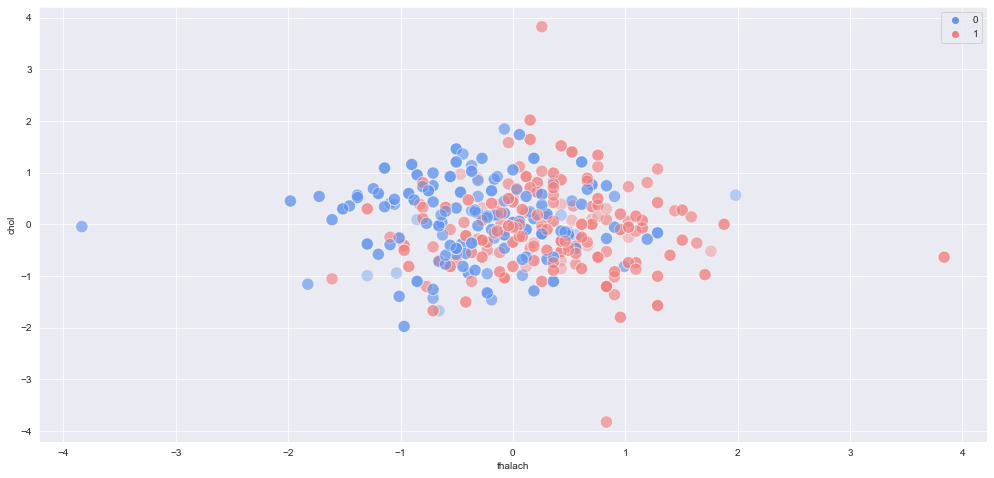

In [469]:
plt.figure(figsize = (17,8))
sns.scatterplot(data=X_train_FE, x='numeric_processor__thalach',y='numeric_processor__chol',hue=y_train.values,palette=['cornflowerblue','lightcoral'],alpha=0.4,s=150)
plt.xlabel('thalach')
plt.ylabel('chol')
plt.show()

### From below we can see that the top 2 features from Feature Importance are giving around 80% accuracy 
### So we can rely on Mutual Information Technique to get the top k best features

In [470]:
X_train_FE.iloc[:,[2,9]]

numeric_processor__cp  numeric_processor__oldpeak
0                -0.896231                    0.024241
1                -0.896231                    0.249574
2                -0.896231                    0.200528
3                -0.896231                    0.135422
4                -0.896231                    0.024241
..                     ...                         ...
820               0.000000                   -0.880152
821              -0.896231                    0.217453
822              -0.896231                    0.024241
823              -0.896231                   -0.880152
824              -0.896231                    0.076485

[825 rows x 2 columns]

In [471]:
rf = RandomForestClassifier()
rf.fit(X_train_FE[['numeric_processor__cp','numeric_processor__oldpeak']],y_train)

RandomForestClassifier()

In [472]:
rf.feature_names_in_

array(['numeric_processor__cp', 'numeric_processor__oldpeak'],
      dtype=object)

In [473]:
y_train_pred = rf.predict(X_train_FE[['numeric_processor__cp','numeric_processor__oldpeak']])
    
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       405
           1       0.85      0.82      0.84       420

    accuracy                           0.84       825
   macro avg       0.84      0.84      0.84       825
weighted avg       0.84      0.84      0.84       825



In [474]:
y_test_pred = rf.predict(X_test_FE[['numeric_processor__cp','numeric_processor__oldpeak']])
    
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79        47
           1       0.82      0.79      0.81        53

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100



## PCA

In [475]:
# We are not doing PCA here becoz we only have few features 

## Building the final Model

In [476]:
X_train

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     62    0   0       138   294    1        1      106      0      1.9   
4     58    0   0       100   248    0        0      122      0      1.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
820   59    1   1       140   221    0        1      164      1      0.0   
821   60    1   0       125   258    0        0      141      1      2.8   
822   47    1   0       110   275    0        0      118      1      1.0   
823   50    0   0       110   254    0        0      159      0      0.0   
824   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  
0        2   2     3  
1        0   0     3  
2        0   0     3  
3        1   3     2  
4        1   0     2  
..     ...  ..   ...  
820      2   0     2  
821      1   1     3  
822      1   1     2  
823      2   0     2  
824      1   1     3  

[825 rows x 13 columns]

In [477]:
y_train

0      0
1      0
2      0
3      0
4      1
      ..
820    1
821    0
822    0
823    1
824    0
Name: target, Length: 825, dtype: int64

In [478]:
final_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_processor',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('quantiletransformer',
                                                                   QuantileTransformer(output_distribution='normal'))]),
                                                  ['age', 'sex', 'cp',
                                                   'trestbps', 'chol', 'fbs',
                                                   'restecg', 'thalach',
                                                   'exang', 'oldpeak', 'slope',
                                                   'ca', 'thal']),
                                                 ('categorical_processor',
                                                  Pipeline(steps=[('imputation_consatnt',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 max_categories=15,
                                                                                 min_frequency=0.01,
                                                                                 sparse_output=False))]),
                                                  Index([], dtype='object'))])),
                ('scaler', RobustScaler())])

In [479]:
model=Pipeline([("final_pipe",final_pipe),
                ("clf",RandomForestClassifier())])

In [480]:
model.fit(X_train,y_train)

Pipeline(steps=[('final_pipe',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('numeric_processor',
                                                                   Pipeline(steps=[('imputation_mean',
                                                                                    SimpleImputer(add_indicator=True,
                                                                                                  strategy='median')),
                                                                                   ('quantiletransformer',
                                                                                    QuantileTransformer(output_distribution='normal'))]),
                                                                   ['age',
                                                                    'sex', 'cp',
                                                                    'trestbps',
                                                                    'chol',
                                                                    'fbs',
                                                                    'restecg',
                                                                    'thalach',
                                                                    'exang',
                                                                    '...
                                                                    'slope',
                                                                    'ca',
                                                                    'thal']),
                                                                  ('categorical_processor',
                                                                   Pipeline(steps=[('imputation_consatnt',
                                                                                    SimpleImputer(fill_value='missing',
                                                                                                  strategy='constant')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  max_categories=15,
                                                                                                  min_frequency=0.01,
                                                                                                  sparse_output=False))]),
                                                                   Index([], dtype='object'))])),
                                 ('scaler', RobustScaler())])),
                ('clf', RandomForestClassifier())])

In [481]:
y_train_pred = model.predict(X_train_balanced)
train_score = accuracy_score(y_train_balanced,y_train_pred)
    
precision = precision_score(y_train_balanced,y_train_pred,average='macro')
recall = recall_score(y_train_balanced,y_train_pred,average='macro')
f1 = f1_score(y_train_balanced,y_train_pred,average='macro')
    
print(classification_report(y_train_balanced,y_train_pred))
    
y_val_pred = model.predict(X_val)

print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       420

    accuracy                           1.00       825
   macro avg       1.00      1.00      1.00       825
weighted avg       1.00      1.00      1.00       825

test accuracy :  1.0


In [ ]:
y_test_pred = model.predict(X_test)

print(classification_report(y_test,y_test_pred))

### Save Trained Model Using joblib

In [482]:
import joblib

In [483]:
joblib.dump(model, '../Models/heart_model')

['../Models/heart_model']

### Load Saved Model

In [484]:
model = joblib.load('../Models/heart_model')

In [485]:
X_test.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [486]:
X_test.head(2)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   59    1   2       150   212    1        1      157      0      1.6      2   
1   67    1   2       152   212    0        0      150      0      0.8      1   

   ca  thal  
0   0     2  
1   0     3

In [487]:
y_test[:2]

0    1
1    0
Name: target, dtype: int64

In [488]:
test = pd.DataFrame(columns=X_test.columns)
test.loc[0] = [59,1,2,150,212,1,1,157,0,1.6,2,0,2]
test

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  59.0  1.0  2.0     150.0  212.0  1.0      1.0    157.0    0.0      1.6   

   slope   ca  thal  
0    2.0  0.0   2.0

In [489]:
model

Pipeline(steps=[('final_pipe',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('numeric_processor',
                                                                   Pipeline(steps=[('imputation_mean',
                                                                                    SimpleImputer(add_indicator=True,
                                                                                                  strategy='median')),
                                                                                   ('quantiletransformer',
                                                                                    QuantileTransformer(output_distribution='normal'))]),
                                                                   ['age',
                                                                    'sex', 'cp',
                                                                    'trestbps',
                                                                    'chol',
                                                                    'fbs',
                                                                    'restecg',
                                                                    'thalach',
                                                                    'exang',
                                                                    '...
                                                                    'slope',
                                                                    'ca',
                                                                    'thal']),
                                                                  ('categorical_processor',
                                                                   Pipeline(steps=[('imputation_consatnt',
                                                                                    SimpleImputer(fill_value='missing',
                                                                                                  strategy='constant')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  max_categories=15,
                                                                                                  min_frequency=0.01,
                                                                                                  sparse_output=False))]),
                                                                   Index([], dtype='object'))])),
                                 ('scaler', RobustScaler())])),
                ('clf', RandomForestClassifier())])

In [490]:
model.predict(test)

array([1], dtype=int64)

In [491]:
model.predict(X_test.head(5))

array([1, 0, 1, 0, 1], dtype=int64)

In [492]:
y_test[:5]

0    1
1    0
2    1
3    0
4    1
Name: target, dtype: int64

In [ ]:
# The below is the sample code to deploy this model using Gradio. you can tweek the below code for this project needs and deploy it.

In [ ]:
X_train.columns

In [ ]:
1. num_preg - Number of times pregnant
2. glucose_conc - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. diastolic_bp - Diastolic blood pressure (mm Hg)
4. thickness - Triceps skin fold thickness (mm)
5. insulin - 2-Hour serum insulin (mu U/ml)
6. bmi - Body mass index (weight in kg/(height in m)^2)
7. diab_pred - Diabetes pedigree function
8. age - Age (years)
9. skin - 
10. target - class

In [ ]:
train_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].describe().T

## Gradio deployment

In [ ]:
import gradio as gr
import random
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset


matplotlib.use("Agg")
df = pd.read_csv('train_df.csv')
X_train = df.drop('target',axis=1)
y_train = df['target']



def predict(*args):
    df = pd.DataFrame([args], columns=X_train.columns)
    result = pipe_xgb.predict(final_pipe.transform(df))
    output = 'diabetic' if result[0]==1 else 'no diabetic' 
    return output



with gr.Blocks() as demo:
    gr.Markdown("""
    **Indian Loan Default Prediction **:  This demo uses an Random Forest classifier predicts loan default based on demographic factors.
    """)
    with gr.Row():
        with gr.Column():
            Pregnancies = gr.Slider(label="No.of Pregnensis", minimum=0, maximum=20, step=1, randomize=True)
            Glucose = gr.Slider(label="Glucose", minimum=0, maximum=400, step=1, randomize=True)
            BloodPressure = gr.Slider(label="blood pressure (mm Hg)", minimum=0, maximum=200, step=1, randomize=True)
            SkinThickness = gr.Slider(label="Triceps skin fold thickness (mm)", minimum=0, maximum=100, step=1, randomize=True)
            Insulin = gr.Slider(label="2-Hour serum insulin (mu U/ml)", minimum=0, maximum=1000, step=1, randomize=True)
            BMI = gr.Slider(label="Body mass index", minimum=0, maximum=100, step=0.5, randomize=True)
            DiabetesPedigreeFunction = gr.Slider(label="Diabetes pedigree function", minimum=0, maximum=10, step=0.5, randomize=True)
            Age = gr.Slider(label="Age", minimum=0, maximum=150, step=1, randomize=True)
            
            
        with gr.Column():
            label = gr.Label()
            with gr.Row():
                predict_btn = gr.Button(value="Predict")
            predict_btn.click(
                predict,
                inputs=[
                    Pregnancies,
                    Glucose,
                    BloodPressure,
                    SkinThickness,
                    Insulin,
                    BMI,
                    DiabetesPedigreeFunction,
                    Age,
                ],
                outputs=[label],
            )

demo.launch()

In [ ]:
demo.close()

In [ ]:
X_train

In [ ]:
zeros_count = {}

for col in X_train.columns:
    if col == 'target':
        continue
    count = (X_train[col] == 0).sum()
    zeros_count[col]=count
df_zeros = pd.DataFrame.from_dict(zeros_count,orient='index',columns=['zeros'])
df_zeros['Percent'] = (df_zeros['zeros']/len(X_train))*100
df_zeros.sort_values(by=['zeros'],ascending=False)

In [ ]:
X_train[['Glucose','BloodPressure','SkinThickness','BMI','Age']] = X_train[['Glucose','BloodPressure','SkinThickness','BMI','Age']].replace({0:np.nan})

In [ ]:
zeros_count = {}

for col in X_train.columns:
    if col == 'target':
        continue
    count = (X_train[col] == 0).sum()
    zeros_count[col]=count
df_zeros = pd.DataFrame.from_dict(zeros_count,orient='index',columns=['zeros'])
df_zeros['Percent'] = (df_zeros['zeros']/len(X_train))*100
df_zeros.sort_values(by=['zeros'],ascending=False)

In [ ]:
X_train.isna().sum()

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
smote = SMOTE(sampling_strategy='minority',random_state=5,n_jobs=-1)
X_res, y_res = smote.fit_resample(X_train, y_train)